
## Delta GPTs - (Train on 100, 200, 300 and predict the next 20)

* Delta: SI differences
* compare 100 to 200 to 300
* Written to run on GPU
* Long train so best run on GPU


In [1]:

##!pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops


In [2]:

import pandas as pd
import numpy as np


In [3]:

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [4]:

## import xgboost as xgb
## from xgboost import XGBClassifier, XGBRegressor, DMatrix, train as train_xgb


In [5]:


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import numpy as np
import torch
import pandas as pd
import sklearn
import random



In [6]:

from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

## coefficient of determination 
from sklearn.metrics import r2_score



## Univariate permutation example


In [7]:

## from einops import rearrange
from math import sqrt, log


In [8]:
'''
patch_size = 10
stride     = 4

x_enc = torch.rand( 8, 40, 24)
print( x_enc.shape )

B, L, M = x_enc.shape
print(B)
print(L)
print(M)

x_enc = rearrange(x_enc, 'b l m -> b m l')
print( x_enc.shape )

x_enc = x_enc.unfold(dimension=-1, size=patch_size, step=stride)
print( x_enc.shape )

x_enc = rearrange(x_enc, 'b m n p -> (b m) n p')
x_enc.shape
'''

"\npatch_size = 10\nstride     = 4\n\nx_enc = torch.rand( 8, 40, 24)\nprint( x_enc.shape )\n\nB, L, M = x_enc.shape\nprint(B)\nprint(L)\nprint(M)\n\nx_enc = rearrange(x_enc, 'b l m -> b m l')\nprint( x_enc.shape )\n\nx_enc = x_enc.unfold(dimension=-1, size=patch_size, step=stride)\nprint( x_enc.shape )\n\nx_enc = rearrange(x_enc, 'b m n p -> (b m) n p')\nx_enc.shape\n"


## Moving Avg example


In [9]:

'''

class moving_avg(nn.Module):

    def __init__(self, x):
        
        super().__init__()
        
        self.kernel_size = x.shape[2]
        self.stride      = 1
        self.avg = nn.AvgPool1d(kernel_size=self.kernel_size, stride=self.stride)

    def forward(self, x):
        

        x = self.avg( x )         ## x.permute(0, 2, 1))
        
        ## x = x.permute(0, 2, 1)
        
        return x

'''


'\n\nclass moving_avg(nn.Module):\n\n    def __init__(self, x):\n        \n        super().__init__()\n        \n        self.kernel_size = x.shape[2]\n        self.stride      = 1\n        self.avg = nn.AvgPool1d(kernel_size=self.kernel_size, stride=self.stride)\n\n    def forward(self, x):\n        \n\n        x = self.avg( x )         ## x.permute(0, 2, 1))\n        \n        ## x = x.permute(0, 2, 1)\n        \n        return x\n\n'

In [10]:

'''

x_enc = torch.rand( 8, 40, 5)

print( x_enc.shape )

obj_mov_avg = moving_avg( x_enc  )

res = obj_mov_avg( x_enc )

print( x_enc[1, 2, :])

ans = x_enc - res

print( ans[1, 2, :])

print( ans.shape )

'''



'\n\nx_enc = torch.rand( 8, 40, 5)\n\nprint( x_enc.shape )\n\nobj_mov_avg = moving_avg( x_enc  )\n\nres = obj_mov_avg( x_enc )\n\nprint( x_enc[1, 2, :])\n\nans = x_enc - res\n\nprint( ans[1, 2, :])\n\nprint( ans.shape )\n\n'


## Read the data


In [11]:

for_RNN_data_CIVS = pd.read_csv('input/RNN_time_DELAYS_2000_PerCast_rcalix.csv')


In [12]:

for_RNN_data_CIVS


Unnamed: 0     SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0              1  0.719500                4.242439          2161.425209   
1              2  0.710486                4.174343          2168.238915   
2              3  0.666106                4.126144          2167.779119   
3              4  0.675145                4.120736          2166.974740   
4              5  0.776831                4.120331          2166.384674   
...          ...       ...                     ...                  ...   
1378        1379  0.762500                4.204430          2169.361647   
1379        1380  0.646000                4.208539          2169.079601   
1380        1381  0.654667                4.212648          2168.797556   
1381        1382  0.591667                4.217784          2168.444999   
1382        1383  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  ...  SE_Uptake_f3  NW_Uptake_f3  \
0              0.354        0.16  ...    182.533770    148.126483   
1              0.313        0.83  ...    183.725050    148.161842   
2              0.360        0.10  ...    195.812061    147.562523   
3              0.319        0.34  ...    188.028883    147.807509   
4              0.335        0.28  ...    200.141261    149.014319   
...              ...         ...  ...           ...           ...   
1378           0.343        0.30  ...    185.900341    148.103530   
1379           0.324        0.30  ...    182.408576    148.106012   
1380           0.325        0.16  ...    181.684649    148.108493   
1381           0.335        0.26  ...    195.202191    148.111595   
1382           0.328        1.08  ...    220.149599    148.115317   

      SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       192.512412     37.369999    36.439999         9.86   
1       192.366046     35.540001    35.970001         9.03   
2       198.423474     34.849998    36.590000         9.13   
3       179.116839     34.009998    35.900002         8.82   
4       186.052137     34.380001    35.970001         8.73   
...            ...           ...          ...          ...   
1378    199.914193     35.900002    37.259998        10.04   
1379    193.501805     35.900002    37.259998        10.04   
1380    194.328694     35.580002    36.500000         9.30   
1381    215.606202     35.130001    37.470001        10.01   
1382    250.937261     35.570000    36.970001         9.47   

      SNORT_VALVE_POSITION_f3  TOP_PRESS_f3  HOT_BLAST_PRESSURE_f3  \
0                   98.334297     18.532928              36.602600   
1                   98.334297     18.397217              36.882963   
2                   98.334297     18.393974              36.568884   
3                   98.334297     18.370316              36.839147   
4                   98.334297     18.395860              36.658018   
...                       ...           ...                    ...   
1378                98.334297     18.209401              36.727897  

In [13]:

cols_list_DF = for_RNN_data_CIVS.columns.values.tolist()
cols_list_DF


['Unnamed: 0',
 'SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Slag_SiO2_f2',
 'Slag_CaO_f2',
 'Slag_MgO_f2',
 'SNORT_VALVE_POSITION_f3',
 'TOP_PRESS_f3',
 'HOT_BLAST_PRESSURE_f3',
 'cokerate_f4']

In [14]:

l_new = ['SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Slag_SiO2_f2',
 'Slag_CaO_f2',
 'Slag_MgO_f2',
 'SNORT_VALVE_POSITION_f3',
 'TOP_PRESS_f3',
 'HOT_BLAST_PRESSURE_f3',
 'cokerate_f4']


In [15]:

for_RNN_data_CIVS = for_RNN_data_CIVS[l_new]


In [16]:

for_RNN_data_CIVS 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.719500                4.242439          2161.425209   
1     0.710486                4.174343          2168.238915   
2     0.666106                4.126144          2167.779119   
3     0.675145                4.120736          2166.974740   
4     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1378  0.762500                4.204430          2169.361647   
1379  0.646000                4.208539          2169.079601   
1380  0.654667                4.212648          2168.797556   
1381  0.591667                4.217784          2168.444999   
1382  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  ...  SE_Uptake_f3  \
0              0.354        0.16            21.080431  ...    182.533770   
1              0.313        0.83            20.996415  ...    183.725050   
2              0.360        0.10            20.749627  ...    195.812061   
3              0.319        0.34            20.609259  ...    188.028883   
4              0.335        0.28            20.617383  ...    200.141261   
...              ...         ...                  ...  ...           ...   
1378           0.343        0.30            21.039583  ...    185.900341   
1379           0.324        0.30            21.043999  ...    182.408576   
1380           0.325        0.16            21.048415  ...    181.684649   
1381           0.335        0.26            21.053935  ...    195.202191   
1382           0.328        1.08            21.060559  ...    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523    198.423474     34.849998    36.590000         9.13   
3       147.807509    179.116839     34.009998    35.900002         8.82   
4       149.014319    186.052137     34.380001    35.970001         8.73   
...            ...           ...           ...          ...          ...   
1378    148.103530    199.914193     35.900002    37.259998        10.04   
1379    148.106012    193.501805     35.900002    37.259998        10.04   
1380    148.108493    194.328694     35.580002    36.500000         9.30   
1381    148.111595    215.606202     35.130001    37.470001        10.01   
1382    148.115317    250.937261     35.570000    36.970001         9.47   

      SNORT_VALVE_POSITION_f3  TOP_PRESS_f3  HOT_BLAST_PRESSURE_f3  \
0                   98.334297     18.532928              36.602600   
1                   98.334297     18.397217              36.882963   
2                   98.334297     18.393974              36.568884   
3                   98.334297     18.370316              36.839147   
4                   98.334297     18.395860              36.658018   
...                       ...    


## Plots


In [17]:

plt.rcParams["figure.figsize"] = [15, 5]


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

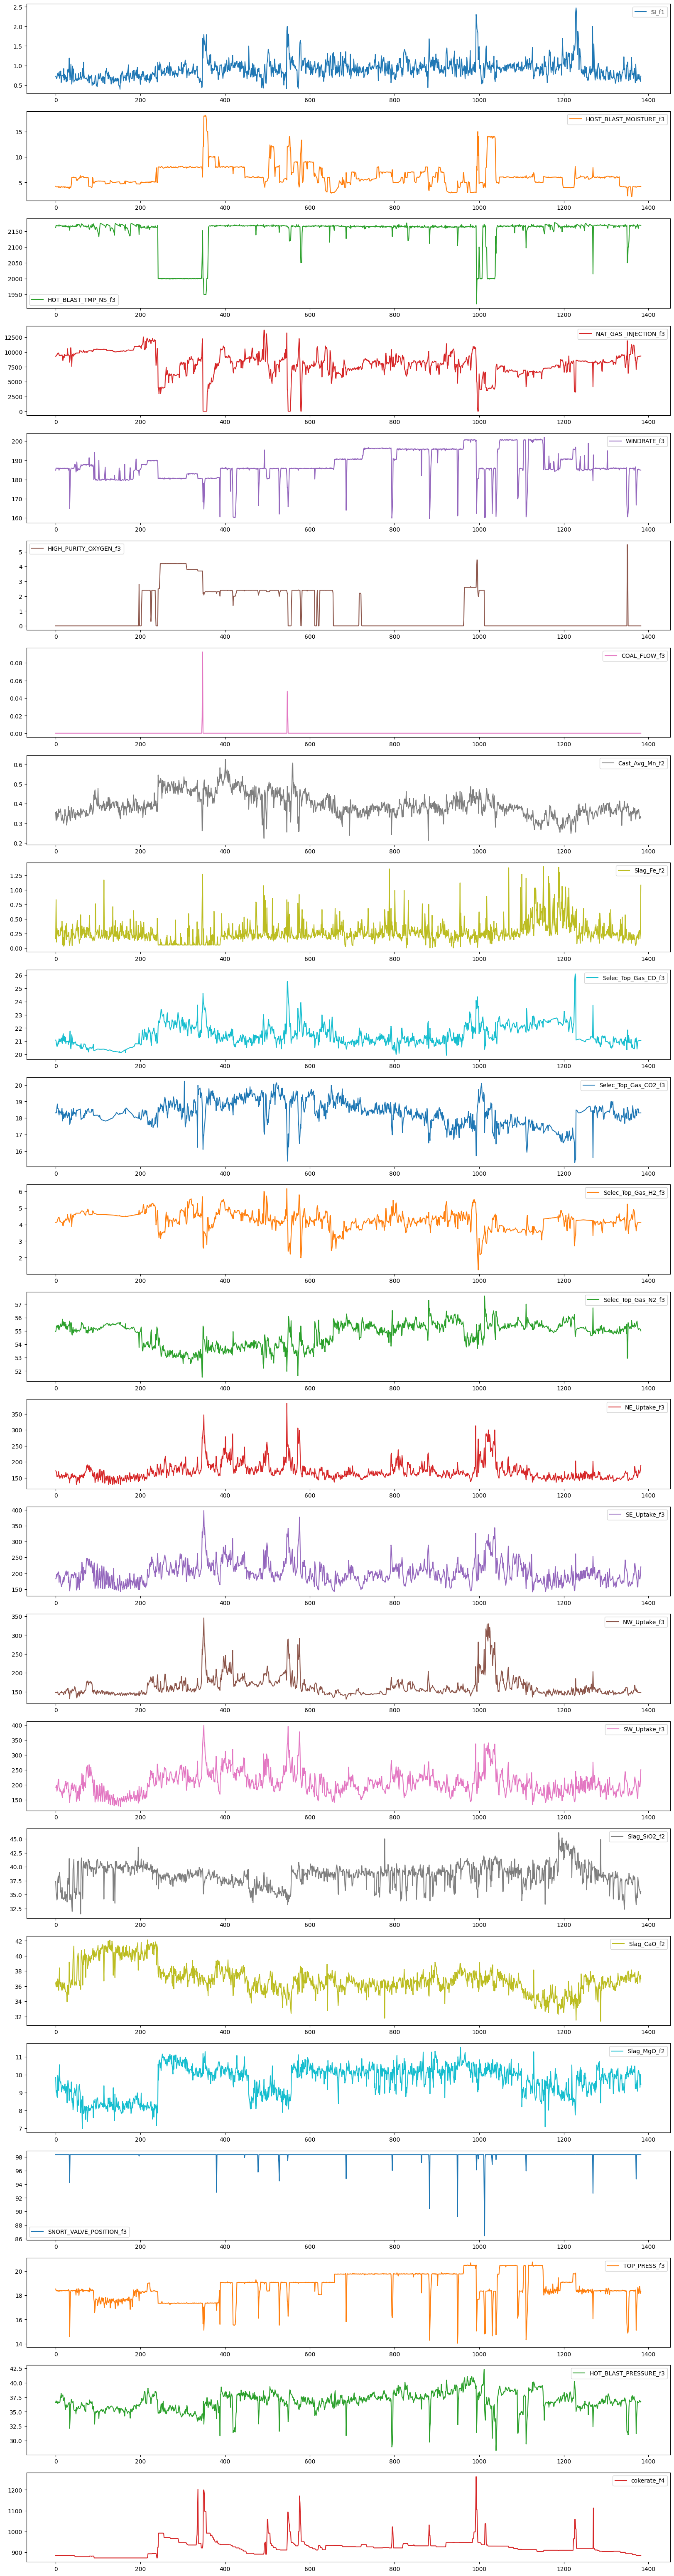

In [18]:

for_RNN_data_CIVS.plot( kind='line', subplots=True, figsize=(20,80),
        sharex=False, sharey=False, legend=True )


In [19]:

print(for_RNN_data_CIVS.shape)


(1383, 24)



## Parameters


In [20]:

pd.options.display.max_columns = None



## Standardize (Scaling)


In [21]:

def standardize_x_scales( data_gpt_pd ):


    data_gpt = torch.tensor(data_gpt_pd.values).float()
        
    epsilon = 0.0001

    print( data_gpt.shape)        
    
    x_means      = data_gpt .mean(0,  keepdim=True)
    x_deviations = data_gpt .std( 0,  keepdim=True) + epsilon

    ## x_train_tr_scaled = (x_train_tr - x_means) / x_deviations
    ## y_test_tr_scaled  = (y_test_tr  - y_means) / y_deviations
    
    return data_gpt, x_means, x_deviations


In [22]:

## x_means      = simple_x_train.mean(0, keepdim=True ) 
## x_deviations = simple_x_train.std( 0, keepdim=True) + epsilon



## Shift and create batches


In [23]:

def get_batch( data_gpt ):
    
    ix = torch.randint(   len(data_gpt) - block_size, (batch_size,)   )

    ## ix = [ int( tensor1.item() ) for tensor1 in ix ]
    ## print(ix.shape)
    ## print(ix)
    ## print(ix[1])
    ## print(  type(ix[1])  )
    ## print( len(data_gpt) - block_size )
    ## print(  block_size )
    ## print(  (batch_size,)  )
    
    x  = torch.stack(    [  data_gpt[   i   : i+block_size    ]   for i in ix ]    ) 
    y  = torch.stack(    [  data_gpt[   i+1 : i+1+block_size  ]   for i in ix ]    )
    
    x, y = x.to(device), y.to(device)

    return x, y


In [24]:

'''

train_CIVS_tr, x_means, x_standard_devs = standardize_x_scales( train_CIVS )

train_CIVS_tr_scaled = ( train_CIVS_tr - x_means ) / x_standard_devs

bt_train_x, bt_train_y = get_batch( train_CIVS_tr_scaled )

bt_train_x.shape

bt_train_y.shape

x_means

'''


'\n\ntrain_CIVS_tr, x_means, x_standard_devs = standardize_x_scales( train_CIVS )\n\ntrain_CIVS_tr_scaled = ( train_CIVS_tr - x_means ) / x_standard_devs\n\nbt_train_x, bt_train_y = get_batch( train_CIVS_tr_scaled )\n\nbt_train_x.shape\n\nbt_train_y.shape\n\nx_means\n\n'


## Estimate loss - No Training


In [25]:

@torch.no_grad()    ## for efficient processing
def estimate_loss( model, criterion ):
    
    out = {}
    model.eval()   ## set to no training
    
    for split in ['train', 'test']:
        losses = torch.zeros(eval_iters)
        for k in range( eval_iters ):
            X, Y = get_batch( split )
            logits  = model(X, Y)
            B, T, E  = logits.shape
            pred     = logits.view( B*T, E)
            y_train  = Y.view(B*T, E)
            loss =  criterion( pred, y_train )
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()  ## back to training

    return out



## NN Architectures


In [26]:

class Head(nn.Module):

    def __init__(self, head_size):
        super().__init__()
        
        self.key   = nn.Linear(n_embd, head_size, bias=False)  ## [512, 64]
        self.query = nn.Linear(n_embd, head_size, bias=False)  ## [512, 64]
        self.value = nn.Linear(n_embd, head_size, bias=False)  ## [512, 64]

        tril_def = torch.tril( torch.ones(block_size, block_size) )  ## [40, 40]
        
        self.register_buffer(
                  'tril', 
                  tril_def
               )
        
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        
        B, T, E = x.shape   ## [batch_size, 40, 512]
        
        k = self.key(   x )            ## k = (B, T, 64)
        q = self.query( x )            ## q = (B, T, 64)

        E2 = 64     ## I think this is 64 and not 512
        ## (B, T, E) @ (B, E, T)  -> (B, T, T)
        wei = q @ k.transpose(-2, -1) * E2 ** -0.5        
        
        wei = wei.masked_fill(
                      self.tril[:T, :T] == 0, 
                      float('-inf')
        )   
        
        ## (B, T, T)
        wei = F.softmax( wei, dim= -1 )         ## (B, T, T)
        wei = self.dropout(   wei   )
        
        ## perform weighted aggregation of values
        
        v   = self.value(  x  )   ## x = (B, 40, E)
        out = wei @ v             ## (B, T, T) @ (B, T, 64) -> (B, T, 64)
        
        return out
        


In [27]:

class FeedForward(nn.Module):

    def __init__(self, n_embd):         ## 512
        
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),      ## [512, 4*512]
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),      ## [4*512, 512]
            nn.Dropout(dropout),
        )
        
    def forward(self, x):
        return self.net(x)


In [28]:

class MultiHeadAttention(nn.Module):

    def __init__(self, num_heads, head_size):    ## (8, 64)
        super().__init__()
        self.heads = nn.ModuleList(  [ Head(head_size) for _ in range(num_heads) ] )
        self.proj  = nn.Linear(n_embd, n_embd)   ## 512, 512
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        out = torch.cat(   [ h(x) for h in self.heads ], dim = -1   )
        out = self.proj(  out   )
        out = self.dropout(   out   )
        return out


In [29]:

class Block(nn.Module):
    
    def __init__(self, n_embd, n_head):     ## (512, 8)
        super().__init__()
        head_size = n_embd // n_head        ## 64
        self.sa   = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedForward( n_embd)    ## 512
        self.ln1  = nn.LayerNorm(n_embd)
        self.ln2  = nn.LayerNorm(n_embd)
        
    def forward(self, x):
        x = x + self.sa(     self.ln1(x)      )
        x = x + self.ffwd(   self.ln2(x)      )
        return x


In [30]:

class moving_avg(nn.Module):

    def __init__(self, x):
        
        super().__init__()
        
        self.kernel_size = x.shape[2]
        self.stride      = 1
        self.avg = nn.AvgPool1d(kernel_size=self.kernel_size, stride=self.stride)

    def forward(self, x):
        

        x = self.avg( x )         ## x.permute(0, 2, 1))
        
        ## x = x.permute(0, 2, 1)
        
        return x


In [31]:

class Time_Series_GPT(nn.Module):
    
    def __init__(self, seq_length, input_size, output_size):
        
        super().__init__()
        
        self.output_size= output_size
        self.seq_length = seq_length
        self.input_size = input_size

        
        ## self.token_embedding_table = nn.Embedding(vocab_size, n_embd)   ## [65, 512]
        self.pos_emb_table         = nn.Embedding(block_size, n_embd)     ## [block, 512]
        
        self.blocks = nn.Sequential(
                *[   Block(n_embd, n_head=n_head) for _ in range(n_layer)    ]
        )
        
        self.ln_f        = nn.LayerNorm(  n_embd    )        
        self.lm_ffw_head = nn.Linear(n_embd, 25)  ## [512, 65] # FFW Layer

        self.map_24_512 = nn.Linear(25, 512)  ## [24, 512] # rc remove
        self.map_act    = nn.ReLU()

        self.map_permute1 = nn.Linear( 512, 512 )
        self.map_permute2 = nn.Linear( 512, 512  )
        self.act_permute1 = nn.ReLU()
        

    def forward(self,  idx, targets):

        ## print( idx.shape      )
        ## print( targets.shape  )

        ######################

        ## obj_mov_avg = moving_avg(  idx  )
        ## res         = obj_mov_avg( idx )
        ## idx = idx - res

        #####################

        B = idx.shape[0]       ## 8
        T = idx.shape[1]       ## 20
        
        ## B, T = idx.shape     ## (Batch, 40)
        ## ids and targets are both (B, T) tensors of integers
        ## tok_emb = self.token_embedding_table(idx)  
        
        idx = self.map_24_512( idx )      ## [8, 40, 24] -> [8, 40, 512]
        idx = self.map_act(    idx )

        tok_emb = idx       ## (8, 15, 512)
        pos_emb = self.pos_emb_table( torch.arange(T, device=device) )  

        ## print("blue")
        ## print(tok_emb.shape)
        ## print(pos_emb.shape)
        
        x = tok_emb + pos_emb    ## [B, T, E] or [64, 40, 512], now [8, 20, 24]

        ## self.map_24_512 = nn.Linear(24, 512)  ## [24, 512] # rc remove
        
        x = self.blocks(  x  )   ## (B, T, E)   
        x = self.ln_f(    x  )   ## (B, T, E)   ## norm
        logits = self.lm_ffw_head(x)         ## [B, 40, 65] 
        
        return logits
        
        
    def generate(self, idx, max_new_tokens):    ## idx is (B, T)
        for _ in range(max_new_tokens):
            ## crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:, :]
            print(idx_cond.shape)
            logits = self(idx_cond, 0 )    ## ## get preds
            logits = logits[:, -1, :]    ## focus on last one (B, E)
            logits = logits.unsqueeze(0)
            print(logits.shape)
            ## probs = F.softmax(logits, dim= -1)    ## (B, E) get probs
            ## idx_next = torch.multinomial(probs, num_samples=1)     ## (B, 1) selected
            idx = torch.cat(  (idx, logits), dim=1  )   ## (B, T+1) append sample to running sequence
            print(idx.shape)
        return idx
            


In [32]:

def train_model_GPT( train_CIVS_2 ):
 
    
    model  = Time_Series_GPT(block_size, 25, 25)
    model  = model.to( device )
    
    optimizer       = torch.optim.Adam(     model.parameters(), lr=learning_rate   )
    ## optimizer    = torch.optim.RMSprop(  model.parameters(), lr=learning_rate   )

    ## criterion       = nn.MSELoss()
    criterion       = nn.L1Loss()
    ## criterion_kl    = nn.KLDivLoss(reduction="batchmean")
    
    history = {'loss': [], 'test_loss': []}

    ## train_CIVS_tr, x_means, x_standard_devs = standardize_x_scales( train_CIVS )
    
    train_CIVS_tr, x_means, x_standard_devs = standardize_x_scales( train_CIVS_2 )

    train_CIVS_tr_scaled = ( train_CIVS_tr - x_means ) / x_standard_devs
        
    model.train()
    
    for batch_i, epoch in enumerate( range(max_iters) ):

        ## xb, yb = get_batch('train')
        xb, yb    = get_batch( train_CIVS_tr_scaled )

        ## rc

        logits   = model( xb, yb )

        B, T, E  = logits.shape
        
        pred           = logits.view( B*T, E)
        y_train        = yb.view(B*T, E)

        ## loss_cost = 0.0
        ## loss =  ( 1.0-loss_cost ) * criterion( pred, y_train ) + ( loss_cost ) * criterion( pred[:, 0], y_train[:, 0]  ) 

        #######################################################
        ## ind1 = random.randrange(0, y_train.shape[0] - 3)
        ## ind2 = ind1 + 3
        ## loss =  criterion( pred[ind1:ind2, 0], y_train[ind1:ind2, 0] )
        #######################################################

        loss =  criterion( pred, y_train )      ## seems better
        
        ## loss = criterion( pred[:, 0], y_train[:, 0]  ) 
        
        optimizer.zero_grad(set_to_none=True)           ## zero out
        loss.backward()
        optimizer.step()

        history['loss'].append(  loss.item()  )

        if batch_i % 500 == 0:
            print(batch_i, "train loss = ", loss.item() )

    
    return model, history, x_means, x_standard_devs



## Parameters


In [33]:

torch.manual_seed(256)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

block_size        = 15   ## 20     ## 4          ## 40      ## N tokens in sequence
batch_size        = 32 
max_iters         = 3000   ## 5000
eval_interval     = 500     
learning_rate     = 0.0001
eval_iters        = 300
vocab_size        = 88  ## 65

## every id for a given token is embedded to vector of this size

n_embd            = 512   ## 24        ## 512       ## 24 for time series, silicon is 0           
n_head            = 8         ## 8 attention heads
n_layer           = 6         ## 6 eoncoder layers
dropout           = 0.2



## Utility Functions


In [34]:

def GPT_get_batch_test( test_data ):
    
    ## x_time_series = torch.tensor(test_data.values).float()

    x_time_series = test_data

    print( x_time_series.shape )

    x  = torch.stack(   [   x_time_series[ 0 : -1    ]    ]    ) 
    y  = torch.stack(   [   x_time_series[ 1 :       ]    ]   )
    
    x, y = x.to(device), y.to(device)

    return x, y


In [35]:

def GPT_generate_inference(model, x_test, which_feature, string_feature, train_CIVS_2_a ):

    xb_test, yb_test = GPT_get_batch_test( x_test )
    
    print(xb_test.shape)
    print(yb_test.shape)

    input_test_x = xb_test[ :,  : 5 ]
    print("input to m.generate")
    print(input_test_x.shape)


    pred_20_seq = model.generate( input_test_x, 14 )

    print("shape of model generated output: ")
    print(pred_20_seq.shape)

    
    y_pred_gpt     = pred_20_seq.detach().cpu().numpy() 
    y_real_gpt     =     yb_test.detach().cpu().numpy() 

    print(index_to_slice)
    find_index = index_to_slice + 395
    SI_data = SI_lookup_for_RNN_data_CIVS.to_numpy()[find_index:find_index+19, 0]
    print(SI_data.shape)
    print(x_test.shape)
    
    
    print(y_pred_gpt.shape)
    print(y_real_gpt.shape)

    
    y_real_gpt = y_real_gpt.squeeze(0)
    y_pred_gpt = y_pred_gpt.squeeze(0)

    print( "unscaling" )

    print(y_pred_gpt.shape)
    print(y_real_gpt.shape)

    l_real = y_real_gpt[ :, 0]
    l_pred = y_pred_gpt[ :, 0]

    l_SI_data_real = SI_data

    si_mean         = x_means[0, 0].numpy()
    si_standard_dev = x_standard_devs[0, 0].numpy()

    #################################################

    l_real_all_features = y_real_gpt[ :, :]
    l_pred_all_features = y_pred_gpt[ :, :]

    si_mean_all_features         = x_means[0, :].numpy()
    si_standard_dev_all_features = x_standard_devs[0, :].numpy()

    l_pred_all_features = l_pred_all_features   * si_standard_dev_all_features   + si_mean_all_features
    l_real_all_features = l_real_all_features   * si_standard_dev_all_features   + si_mean_all_features

    #################################################

    print("these: ")
    print( x_means.shape )
    print( l_pred.shape )
    print( si_standard_dev.shape )
    print( si_mean.shape )
    print( si_standard_dev )
    print( si_mean)
    print( l_pred )
    print(  )
    

    ## y_descaled = y_scaled * self.y_deviations + self.y_means
    l_pred        = l_pred   * si_standard_dev   + si_mean
    l_real        = l_real   * si_standard_dev   + si_mean

    print( l_pred )
    
    print("unscale si end")


    eval_criterion = nn.MSELoss()

    mse_eval_bins = eval_criterion(
                          torch.FloatTensor( l_pred ), 
                          torch.FloatTensor( l_real )
    )

    print( l_pred  )
    print( l_real )

    print( l_pred.shape  )
    print( l_real.shape  )

    
    print( string_feature )
    print(f'Test MSE Loss - SI only: {mse_eval_bins.item():.4f}')
    print(l_real)
    print(l_pred)
    print(l_SI_data_real)
    print( "Testing R**2 - SI only: ", r2_score(  l_real,  l_pred     )  )
    print( "Testing R**2 - All 25 features: ", r2_score(  l_real_all_features,  l_pred_all_features     )  )


    #######################################

    x = [ i for i in range(len(l_real)) ] 
    print(len(x))

    l_SI_data_pred = []
    www3 = SI_data = SI_lookup_for_RNN_data_CIVS.to_numpy()[find_index - 1, 0]
    the_curr_val = www3 ##l_SI_data_real[0]  ### www3
    for i in range( len(l_pred) ):
        the_curr_val = the_curr_val + l_pred[i]
        l_SI_data_pred.append( the_curr_val )

    ## l_SI_data_real = np.roll(l_SI_data_real, -1)

    plt.scatter(x, l_real, label = "real", color='red') 
    plt.plot(   x, l_real, label = "real", color='red') 
    plt.plot(   x, l_SI_data_real, label = "real", color='red') 
 
    ##print( l_pred[1:].shape )
    ##print( l_pred[0].shape )
    ## l_pred  = np.concatenate( ( l_pred[1:, ], l_pred[0] ) )
    
    l_pred = np.roll(l_pred, -1)

    

    ## l_SI_data_pred = np.roll(l_SI_data_pred, 0)
    
    plt.scatter(x, l_pred, label = "pred", color='blue') 
    plt.plot(   x, l_pred, label = "pred", color='blue') 
    plt.plot(   x, l_SI_data_pred, label = "pred", color='blue') 
    
    plt.legend() 
    plt.show()

    ##########################################

    train_plot = torch.tensor(train_CIVS_2_a.values).float().numpy()
    print( train_plot.shape )
    train_real_plot = train_plot[:, 0]
    ## l_real  = np.concatenate( ( train_real_plot[1: ], train_real_plot[:1] ) )
    l_real  = np.concatenate( ( train_real_plot, l_real ) )
    l_pred  = np.concatenate( ( train_real_plot, l_pred ) )
    ######################################

    x = [ i for i in range(len(l_real)) ] 
    print(len(x))

    x_delta = [ i for i in range(len(l_SI_data_real)) ] 
    print(len(x_delta))

    fig, ax = plt.subplots(2, 1) 
    ax[0].set_title(f'GPT Generate')
    ##ax[0].plot(history_GPT['loss'],     'k--',   label='loss'      )
    ##ax[0].plot(history_GPT['test_loss'], 'k',    label='test_loss'  )
    ax[0].scatter(x, l_real, label = "real", color='red') 
    ax[0].plot(   x, l_real, label = "real", color='red') 
    ax[0].scatter(x, l_pred, label = "pred", color='blue') 
    ax[0].plot(   x, l_pred, label = "pred", color='blue') 
    ax[0].legend()
    
    ax[1].set_title(f"GPT")
    ax[1].scatter(x_delta, l_SI_data_real, label = "real", color='red') 
    ax[1].plot(   x_delta, l_SI_data_real, label = "real", color='red') 
    ax[1].scatter(x_delta, l_SI_data_pred, label = "pred", color='blue') 
    ax[1].plot(   x_delta, l_SI_data_pred, label = "pred", color='blue') 
    fig.tight_layout()
    ax[1].legend(); plt.show()


In [36]:

def function_train_rc(  train_data  ):
    train_CIVS_2 = train_data
    si_GPT, history_GPT, x_means, x_standard_devs = train_model_GPT( train_CIVS_2 )

    fig, ax = plt.subplots(2, 1) 
    ax[0].set_title(f'GPT  Train  Loss  per epoch')
    ax[0].plot(history_GPT['loss'],     'k--',   label='loss'      )
    ax[0].plot(history_GPT['test_loss'], 'k',    label='test_loss'  )
    ax[0].legend()
    ax[1].set_title(f"GPT")

    fig.tight_layout()
    ax[1].legend(); plt.show()

    return si_GPT, history_GPT, x_means, x_standard_devs 

    

In [37]:

def function_test_rc( train_data, test_CIVS, si_GPT, x_means, x_standard_devs):
    train_CIVS_2 = train_data
    
    print(  test_CIVS.shape )
    print( train_data.shape )
    ## print( train_data[ -5: ] )

    frames           = [ train_data[ -5: ], test_CIVS ]
    test_CIVS_concat = pd.concat( frames )
    print( test_CIVS_concat.shape )

    test_CIVS_tr = torch.tensor(test_CIVS_concat.values).float()
    test_CIVS_tr_scaled = ( test_CIVS_tr - x_means ) / x_standard_devs
    print(  test_CIVS_tr_scaled.shape )

    batch_x_test = test_CIVS_tr_scaled
    print( batch_x_test.shape )
    GPT_generate_inference(   si_GPT,  batch_x_test, 0 , "SI", train_CIVS_2 )


In [38]:

'''
SI_data = SI_lookup_for_RNN_data_CIVS.to_numpy()[1040:1054, 0]
print(SI_data.shape)
SI_data
'''


'\nSI_data = SI_lookup_for_RNN_data_CIVS.to_numpy()[1040:1054, 0]\nprint(SI_data.shape)\nSI_data\n'


## The Data


In [39]:

for_RNN_data_CIVS


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.719500                4.242439          2161.425209   
1     0.710486                4.174343          2168.238915   
2     0.666106                4.126144          2167.779119   
3     0.675145                4.120736          2166.974740   
4     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1378  0.762500                4.204430          2169.361647   
1379  0.646000                4.208539          2169.079601   
1380  0.654667                4.212648          2168.797556   
1381  0.591667                4.217784          2168.444999   
1382  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0              0.354        0.16            21.080431             18.313322   
1              0.313        0.83            20.996415             18.311768   
2              0.360        0.10            20.749627             18.341701   
3              0.319        0.34            20.609259             18.644476   
4              0.335        0.28            20.617383             18.845791   
...              ...         ...                  ...                   ...   
1378           0.343        0.30            21.039583             18.308225   
1379           0.324        0.30            21.043999             18.308776   
1380           0.325        0.16            21.048415             18.309327   
1381           0.335        0.26            21.053935             18.310016   
1382           0.328        1.08            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
0                4.131228            54.940123    171.769513    182.533770   
1                4.133911            55.072779    170.595469    183.725050   
2                4.137632            55.375043    167.017421    195.812061   
3                4.142824            55.341884    154.214917    188.028883   
4                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1378             4.129485            55.162782    167.619915    185.900341   
1379             4.129674            55.162767    164.706552    182.408576   
1380             4.129862            55.140373    166.903493    181.684649   
1381             4.130097            55.098014    175.524144    195.202191   
1382             4.130380            55.003376    189.407795    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523    198.423474     34.849998    36.590000         9.13   
3       147.807509    179.116839     34.009998    35.900002         8.82   
4       149.0


## Delta of SI


In [40]:

delta_for_RNN_data_CIVS      = for_RNN_data_CIVS.copy()
SI_lookup_for_RNN_data_CIVS  = for_RNN_data_CIVS.copy()


In [41]:

delta_for_RNN_data_CIVS 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.719500                4.242439          2161.425209   
1     0.710486                4.174343          2168.238915   
2     0.666106                4.126144          2167.779119   
3     0.675145                4.120736          2166.974740   
4     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1378  0.762500                4.204430          2169.361647   
1379  0.646000                4.208539          2169.079601   
1380  0.654667                4.212648          2168.797556   
1381  0.591667                4.217784          2168.444999   
1382  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0              0.354        0.16            21.080431             18.313322   
1              0.313        0.83            20.996415             18.311768   
2              0.360        0.10            20.749627             18.341701   
3              0.319        0.34            20.609259             18.644476   
4              0.335        0.28            20.617383             18.845791   
...              ...         ...                  ...                   ...   
1378           0.343        0.30            21.039583             18.308225   
1379           0.324        0.30            21.043999             18.308776   
1380           0.325        0.16            21.048415             18.309327   
1381           0.335        0.26            21.053935             18.310016   
1382           0.328        1.08            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
0                4.131228            54.940123    171.769513    182.533770   
1                4.133911            55.072779    170.595469    183.725050   
2                4.137632            55.375043    167.017421    195.812061   
3                4.142824            55.341884    154.214917    188.028883   
4                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1378             4.129485            55.162782    167.619915    185.900341   
1379             4.129674            55.162767    164.706552    182.408576   
1380             4.129862            55.140373    166.903493    181.684649   
1381             4.130097            55.098014    175.524144    195.202191   
1382             4.130380            55.003376    189.407795    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523    198.423474     34.849998    36.590000         9.13   
3       147.807509    179.116839     34.009998    35.900002         8.82   
4       149.0

In [42]:

delta_for_RNN_data_CIVS .insert(loc = 0,
                                column = 'delta_SI',
                                value = 0 )



In [43]:

for_RNN_data_CIVS


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.719500                4.242439          2161.425209   
1     0.710486                4.174343          2168.238915   
2     0.666106                4.126144          2167.779119   
3     0.675145                4.120736          2166.974740   
4     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1378  0.762500                4.204430          2169.361647   
1379  0.646000                4.208539          2169.079601   
1380  0.654667                4.212648          2168.797556   
1381  0.591667                4.217784          2168.444999   
1382  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0              0.354        0.16            21.080431             18.313322   
1              0.313        0.83            20.996415             18.311768   
2              0.360        0.10            20.749627             18.341701   
3              0.319        0.34            20.609259             18.644476   
4              0.335        0.28            20.617383             18.845791   
...              ...         ...                  ...                   ...   
1378           0.343        0.30            21.039583             18.308225   
1379           0.324        0.30            21.043999             18.308776   
1380           0.325        0.16            21.048415             18.309327   
1381           0.335        0.26            21.053935             18.310016   
1382           0.328        1.08            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
0                4.131228            54.940123    171.769513    182.533770   
1                4.133911            55.072779    170.595469    183.725050   
2                4.137632            55.375043    167.017421    195.812061   
3                4.142824            55.341884    154.214917    188.028883   
4                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1378             4.129485            55.162782    167.619915    185.900341   
1379             4.129674            55.162767    164.706552    182.408576   
1380             4.129862            55.140373    166.903493    181.684649   
1381             4.130097            55.098014    175.524144    195.202191   
1382             4.130380            55.003376    189.407795    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523    198.423474     34.849998    36.590000         9.13   
3       147.807509    179.116839     34.009998    35.900002         8.82   
4       149.0

In [44]:

delta_for_RNN_data_CIVS


delta_SI     SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0            0  0.719500                4.242439          2161.425209   
1            0  0.710486                4.174343          2168.238915   
2            0  0.666106                4.126144          2167.779119   
3            0  0.675145                4.120736          2166.974740   
4            0  0.776831                4.120331          2166.384674   
...        ...       ...                     ...                  ...   
1378         0  0.762500                4.204430          2169.361647   
1379         0  0.646000                4.208539          2169.079601   
1380         0  0.654667                4.212648          2168.797556   
1381         0  0.591667                4.217784          2168.444999   
1382         0  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0              0.354        0.16            21.080431             18.313322   
1              0.313        0.83            20.996415             18.311768   
2              0.360        0.10            20.749627             18.341701   
3              0.319        0.34            20.609259             18.644476   
4              0.335        0.28            20.617383             18.845791   
...              ...         ...                  ...                   ...   
1378           0.343        0.30            21.039583             18.308225   
1379           0.324        0.30            21.043999             18.308776   
1380           0.325        0.16            21.048415             18.309327   
1381           0.335        0.26            21.053935             18.310016   
1382           0.328        1.08            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
0                4.131228            54.940123    171.769513    182.533770   
1                4.133911            55.072779    170.595469    183.725050   
2                4.137632            55.375043    167.017421    195.812061   
3                4.142824            55.341884    154.214917    188.028883   
4                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1378             4.129485            55.162782    167.619915    185.900341   
1379             4.129674            55.162767    164.706552    182.408576   
1380             4.129862            55.140373    166.903493    181.684649   
1381             4.130097            55.098014    175.524144    195.202191   
1382             4.130380            55.003376    189.407795    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523    198.423474     34.84

In [45]:

## merge_date_key = ''
## i_6000 = 0
## merge_date_key = list_dates_6000f[ i_6000 ]


    
for index, row in delta_for_RNN_data_CIVS.iterrows():

    if index > 1:
        ## if row["MM_Timestamp_f1"] <= merge_date_key and row['Timestamp_f1'] == 'abc':
        delta_for_RNN_data_CIVS.at[index,'delta_SI']= delta_for_RNN_data_CIVS.at[index,'SI_f1'] - delta_for_RNN_data_CIVS.at[index-1,'SI_f1'] 
        ## print(delta_for_RNN_data_CIVS.at[index,'SI_f1'])

        
## merge_date_key = list_dates_6000f[ i_6000 ] 
## MinByMin_137MB_data_CIVS.at[index, 'Timestamp_f1'] = merge_date_key
        
## if index  % 50000 == 0:
## print(index )
 


In [46]:

delta_for_RNN_data_CIVS


delta_SI     SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.000000  0.719500                4.242439          2161.425209   
1     0.000000  0.710486                4.174343          2168.238915   
2    -0.044380  0.666106                4.126144          2167.779119   
3     0.009040  0.675145                4.120736          2166.974740   
4     0.101686  0.776831                4.120331          2166.384674   
...        ...       ...                     ...                  ...   
1378  0.109500  0.762500                4.204430          2169.361647   
1379 -0.116500  0.646000                4.208539          2169.079601   
1380  0.008667  0.654667                4.212648          2168.797556   
1381 -0.063000  0.591667                4.217784          2168.444999   
1382  0.133000  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0              0.354        0.16            21.080431             18.313322   
1              0.313        0.83            20.996415             18.311768   
2              0.360        0.10            20.749627             18.341701   
3              0.319        0.34            20.609259             18.644476   
4              0.335        0.28            20.617383             18.845791   
...              ...         ...                  ...                   ...   
1378           0.343        0.30            21.039583             18.308225   
1379           0.324        0.30            21.043999             18.308776   
1380           0.325        0.16            21.048415             18.309327   
1381           0.335        0.26            21.053935             18.310016   
1382           0.328        1.08            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
0                4.131228            54.940123    171.769513    182.533770   
1                4.133911            55.072779    170.595469    183.725050   
2                4.137632            55.375043    167.017421    195.812061   
3                4.142824            55.341884    154.214917    188.028883   
4                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1378             4.129485            55.162782    167.619915    185.900341   
1379             4.129674            55.162767    164.706552    182.408576   
1380             4.129862            55.140373    166.903493    181.684649   
1381             4.130097            55.098014    175.524144    195.202191   
1382             4.130380            55.003376    189.407795    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523    198.423474     34.84

In [47]:

l_delta = ['delta_SI',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Slag_SiO2_f2',
 'Slag_CaO_f2',
 'Slag_MgO_f2',
 'SNORT_VALVE_POSITION_f3',
 'TOP_PRESS_f3',
 'HOT_BLAST_PRESSURE_f3',
 'cokerate_f4']


In [48]:

delta_for_RNN_data_CIVS = delta_for_RNN_data_CIVS[ l_delta]


In [49]:

delta_for_RNN_data_CIVS


delta_SI  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.000000                4.242439          2161.425209   
1     0.000000                4.174343          2168.238915   
2    -0.044380                4.126144          2167.779119   
3     0.009040                4.120736          2166.974740   
4     0.101686                4.120331          2166.384674   
...        ...                     ...                  ...   
1378  0.109500                4.204430          2169.361647   
1379 -0.116500                4.208539          2169.079601   
1380  0.008667                4.212648          2168.797556   
1381 -0.063000                4.217784          2168.444999   
1382  0.133000                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0              0.354        0.16            21.080431             18.313322   
1              0.313        0.83            20.996415             18.311768   
2              0.360        0.10            20.749627             18.341701   
3              0.319        0.34            20.609259             18.644476   
4              0.335        0.28            20.617383             18.845791   
...              ...         ...                  ...                   ...   
1378           0.343        0.30            21.039583             18.308225   
1379           0.324        0.30            21.043999             18.308776   
1380           0.325        0.16            21.048415             18.309327   
1381           0.335        0.26            21.053935             18.310016   
1382           0.328        1.08            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
0                4.131228            54.940123    171.769513    182.533770   
1                4.133911            55.072779    170.595469    183.725050   
2                4.137632            55.375043    167.017421    195.812061   
3                4.142824            55.341884    154.214917    188.028883   
4                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1378             4.129485            55.162782    167.619915    185.900341   
1379             4.129674            55.162767    164.706552    182.408576   
1380             4.129862            55.140373    166.903493    181.684649   
1381             4.130097            55.098014    175.524144    195.202191   
1382             4.130380            55.003376    189.407795    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523    198.423474     34.849998    36.590000         9.13   
3       147.807509    179.116839     34.009998    35.900002         8.82   
4       14

In [50]:

for_RNN_data_CIVS = delta_for_RNN_data_CIVS



## Add Moving average to data


In [51]:


delta_for_RNN_data_CIVS .insert(loc = 1,
                                column = 'mov_avg_SI',
                                value = 0 )



In [52]:

delta_for_RNN_data_CIVS


delta_SI  mov_avg_SI  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.000000           0                4.242439          2161.425209   
1     0.000000           0                4.174343          2168.238915   
2    -0.044380           0                4.126144          2167.779119   
3     0.009040           0                4.120736          2166.974740   
4     0.101686           0                4.120331          2166.384674   
...        ...         ...                     ...                  ...   
1378  0.109500           0                4.204430          2169.361647   
1379 -0.116500           0                4.208539          2169.079601   
1380  0.008667           0                4.212648          2168.797556   
1381 -0.063000           0                4.217784          2168.444999   
1382  0.133000           0                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0              0.354        0.16            21.080431             18.313322   
1              0.313        0.83            20.996415             18.311768   
2              0.360        0.10            20.749627             18.341701   
3              0.319        0.34            20.609259             18.644476   
4              0.335        0.28            20.617383             18.845791   
...              ...         ...                  ...                   ...   
1378           0.343        0.30            21.039583             18.308225   
1379           0.324        0.30            21.043999             18.308776   
1380           0.325        0.16            21.048415             18.309327   
1381           0.335        0.26            21.053935             18.310016   
1382           0.328        1.08            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
0                4.131228            54.940123    171.769513    182.533770   
1                4.133911            55.072779    170.595469    183.725050   
2                4.137632            55.375043    167.017421    195.812061   
3                4.142824            55.341884    154.214917    188.028883   
4                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1378             4.129485            55.162782    167.619915    185.900341   
1379             4.129674            55.162767    164.706552    182.408576   
1380             4.129862            55.140373    166.903493    181.684649   
1381             4.130097            55.098014    175.524144    195.202191   
1382             4.130380            55.003376    189.407795    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523

In [53]:

delta_for_RNN_data_CIVS.shape[0]


1383

In [54]:


## for index, row in delta_for_RNN_data_CIVS.iterrows():

range_to_mean = 10

for i in range( 1, delta_for_RNN_data_CIVS.shape[0] ):
    index = delta_for_RNN_data_CIVS.shape[0] - i
    if index <= 10:
        ## range_to_mean = index -1
        break
    list_to_mean = []
    for j in range( range_to_mean ):
        list_to_mean.append(   delta_for_RNN_data_CIVS.at[ index-j , 'delta_SI' ]    )
    the_mean = np.array( list_to_mean )
    delta_for_RNN_data_CIVS.at[index,'mov_avg_SI']= np.mean(the_mean) 



In [55]:

delta_for_RNN_data_CIVS


delta_SI  mov_avg_SI  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.000000    0.000000                4.242439          2161.425209   
1     0.000000    0.000000                4.174343          2168.238915   
2    -0.044380    0.000000                4.126144          2167.779119   
3     0.009040    0.000000                4.120736          2166.974740   
4     0.101686    0.000000                4.120331          2166.384674   
...        ...         ...                     ...                  ...   
1378  0.109500    0.004444                4.204430          2169.361647   
1379 -0.116500    0.008900                4.208539          2169.079601   
1380  0.008667   -0.037618                4.212648          2168.797556   
1381 -0.063000   -0.014340                4.217784          2168.444999   
1382  0.133000    0.011422                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0              0.354        0.16            21.080431             18.313322   
1              0.313        0.83            20.996415             18.311768   
2              0.360        0.10            20.749627             18.341701   
3              0.319        0.34            20.609259             18.644476   
4              0.335        0.28            20.617383             18.845791   
...              ...         ...                  ...                   ...   
1378           0.343        0.30            21.039583             18.308225   
1379           0.324        0.30            21.043999             18.308776   
1380           0.325        0.16            21.048415             18.309327   
1381           0.335        0.26            21.053935             18.310016   
1382           0.328        1.08            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
0                4.131228            54.940123    171.769513    182.533770   
1                4.133911            55.072779    170.595469    183.725050   
2                4.137632            55.375043    167.017421    195.812061   
3                4.142824            55.341884    154.214917    188.028883   
4                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1378             4.129485            55.162782    167.619915    185.900341   
1379             4.129674            55.162767    164.706552    182.408576   
1380             4.129862            55.140373    166.903493    181.684649   
1381             4.130097            55.098014    175.524144    195.202191   
1382             4.130380            55.003376    189.407795    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523

In [56]:

for_RNN_data_CIVS = delta_for_RNN_data_CIVS


In [57]:

for_RNN_data_CIVS


delta_SI  mov_avg_SI  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.000000    0.000000                4.242439          2161.425209   
1     0.000000    0.000000                4.174343          2168.238915   
2    -0.044380    0.000000                4.126144          2167.779119   
3     0.009040    0.000000                4.120736          2166.974740   
4     0.101686    0.000000                4.120331          2166.384674   
...        ...         ...                     ...                  ...   
1378  0.109500    0.004444                4.204430          2169.361647   
1379 -0.116500    0.008900                4.208539          2169.079601   
1380  0.008667   -0.037618                4.212648          2168.797556   
1381 -0.063000   -0.014340                4.217784          2168.444999   
1382  0.133000    0.011422                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0              0.354        0.16            21.080431             18.313322   
1              0.313        0.83            20.996415             18.311768   
2              0.360        0.10            20.749627             18.341701   
3              0.319        0.34            20.609259             18.644476   
4              0.335        0.28            20.617383             18.845791   
...              ...         ...                  ...                   ...   
1378           0.343        0.30            21.039583             18.308225   
1379           0.324        0.30            21.043999             18.308776   
1380           0.325        0.16            21.048415             18.309327   
1381           0.335        0.26            21.053935             18.310016   
1382           0.328        1.08            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
0                4.131228            54.940123    171.769513    182.533770   
1                4.133911            55.072779    170.595469    183.725050   
2                4.137632            55.375043    167.017421    195.812061   
3                4.142824            55.341884    154.214917    188.028883   
4                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1378             4.129485            55.162782    167.619915    185.900341   
1379             4.129674            55.162767    164.706552    182.408576   
1380             4.129862            55.140373    166.903493    181.684649   
1381             4.130097            55.098014    175.524144    195.202191   
1382             4.130380            55.003376    189.407795    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523


## Pick slice randomly


In [58]:

training_chunk = 400


In [59]:

length_n  = int( for_RNN_data_CIVS.shape[0] )

length_n


1383


## Run 1


In [60]:

the_range = training_chunk + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice


95

In [61]:

print( for_RNN_data_CIVS.shape[0] )
print( index_to_slice )
print( index_to_slice + the_range )


1383
95
510


In [62]:

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]


In [63]:

sliced_chunk_CIVS


delta_SI  mov_avg_SI  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
95  -0.066042   -0.007938                5.204047          2160.986131   
96  -0.196625   -0.001373                5.213847          2162.899368   
97   0.029000   -0.005838                5.236245          2161.662852   
98  -0.052667   -0.007267                5.261444          2154.609089   
99   0.085667   -0.000925                5.268443          2151.140204   
..        ...         ...                     ...                  ...   
505 -0.319767    0.023996                9.867538          2165.939099   
506 -0.001412    0.042116               12.379981          2166.271603   
507  0.122968    0.055955               12.003287          2166.487159   
508  0.001276    0.042924                9.694305          2166.640136   
509 -0.381017   -0.032170               12.236647          2166.311689   

     NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
95            10489.031807   179.775286               0.000000           0.0   
96            10524.216685   179.718172               0.000000           0.0   
97            10470.324807   179.996938               0.000000           0.0   
98            10473.051005   179.613677               0.000000           0.0   
99            10511.984363   179.588433               0.000000           0.0   
..                     ...          ...                    ...           ...   
505            6241.485038   180.644095               2.300852           0.0   
506            5496.664046   185.772329               2.395927           0.0   
507            6845.297703   185.826263               2.401692           0.0   
508            7096.285781   185.537518               2.395825           0.0   
509            5325.868892   185.656126               2.401193           0.0   

     Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
95            0.433        0.28            20.330954             18.168978   
96            0.424        0.27            20.341087             18.171938   
97            0.401        0.23            20.364248             18.163165   
98            0.388        0.29            20.390303             18.171989   
99            0.388        0.31            20.397530             18.175237   
..              ...         ...                  ...                   ...   
505           0.491        0.20            22.247157             18.551586   
506           0.475        0.18            22.186464             19.067691   
507           0.502        0.17            21.849298             18.871185   
508           0.489        0.14            21.546865             18.921985   
509           0.472        0.23            22.058467             19.631967   

     Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
95              4.639813            55.164252    148.910072    169.212976   
96              4.628073            55.165120    162.302753    208.121031   
97              4.619293            55.152779    147.034627    162.536965   
98              4.616041            55.092890    165.669660    229.790629   
99              4.615138            55.033152    162.164669    215.382305   
..                   ...                  ...           ...           ...   
505             4.219132            53.615561    168.151487    215.392872   
506             4.206242            53.268495    170.188303    202.402481   
507             4.582025            53.375870    177.893672    226.142906   
508             4.355384            53.717462    181.957416    238.657042   
509             4.104295            52.863906    159.885191    187.216671   

     NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
95     147.918312    162.858656     38.669998    39.820000         8.08   
96     149.850516    198.757864     39.009998    40.150002         8.14   
97     142.878934    153.013672     40.970001    40.599998         8


## Train and test


In [64]:

n = block_size

print( n )


15


In [65]:

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]


In [66]:

print( train_CIVS.shape )
print( test_CIVS.shape )


(400, 25)
(15, 25)


In [67]:

test_CIVS 


delta_SI  mov_avg_SI  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
495 -0.291555   -0.003464                5.096723          2167.147591   
496 -0.182613   -0.001868                5.204016          2165.739615   
497 -0.015427    0.011228                5.204016          2167.816164   
498  0.131594    0.000075                5.221130          2165.905288   
499  0.369918    0.051492                5.277010          2168.470116   
500  0.061606    0.063127                5.386576          2166.679275   
501  0.123621    0.080582                5.724690          2165.995102   
502  0.185653    0.063725                5.821990          2167.611994   
503 -0.058116    0.042181                6.994524          2167.445640   
504 -0.056510    0.026817                9.957139          2166.806484   
505 -0.319767    0.023996                9.867538          2165.939099   
506 -0.001412    0.042116               12.379981          2166.271603   
507  0.122968    0.055955               12.003287          2166.487159   
508  0.001276    0.042924                9.694305          2166.640136   
509 -0.381017   -0.032170               12.236647          2166.311689   

     NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
495            8514.719966   185.723530               2.398988           0.0   
496            8406.078549   185.708891               2.400239           0.0   
497           11273.116205   185.528364               2.397536           0.0   
498           13089.737671   182.108796               2.331126           0.0   
499           11689.086673   180.306925               2.297439           0.0   
500           10691.602968   180.614940               2.302797           0.0   
501            8235.721738   180.244396               2.298426           0.0   
502            7743.410741   180.568828               2.299908           0.0   
503            7780.156605   180.463246               2.301285           0.0   
504            6527.171929   180.672670               2.300337           0.0   
505            6241.485038   180.644095               2.300852           0.0   
506            5496.664046   185.772329               2.395927           0.0   
507            6845.297703   185.826263               2.401692           0.0   
508            7096.285781   185.537518               2.395825           0.0   
509            5325.868892   185.656126               2.401193           0.0   

     Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
495           0.452        0.82            21.565732             18.748473   
496           0.389        0.27            21.649152             19.468278   
497           0.347        0.40            21.858678             19.388789   
498           0.271        0.22            21.482556             18.281161   
499           0.359        0.69            21.137634             17.831758   
500           0.471        0.18            21.540496             17.595959   
501           0.488        0.21            21.756278             17.938223   
502           0.465        0.25            22.395659             17.724922   
503           0.493        0.15            22.643966             18.000683   
504           0.510        0.18            22.134350             18.557775   
505           0.491        0.20            22.247157             18.551586   
506           0.475        0.18            22.186464             19.067691   
507           0.502        0.17            21.849298             18.871185   
508           0.489        0.14            21.546865             18.921985   
509           0.472        0.23            22.058467             19.631967   

     Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
495             4.246609            54.317926    234.337993    271.317598   
496             3.990376            53.890307    188.797183    216.112220   
497             4.585089            52.983916    217.756362

In [68]:

chunk300to400_train = train_CIVS[ 300  :  ] 
chunk200to400_train = train_CIVS[ 200  :  ]  
chunk100to400_train = train_CIVS[ 100  :  ] 
chunk000to400_train = train_CIVS[      :  ] 


In [69]:

print( chunk300to400_train.shape )
print( chunk200to400_train.shape )
print( chunk100to400_train.shape )
print( chunk000to400_train.shape )


(100, 25)
(200, 25)
(300, 25)
(400, 25)


torch.Size([100, 25])
0 train loss =  0.770929753780365
500 train loss =  0.12629109621047974
1000 train loss =  0.06530352681875229
1500 train loss =  0.050153158605098724
2000 train loss =  0.0385139063000679
2500 train loss =  0.033420637249946594


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


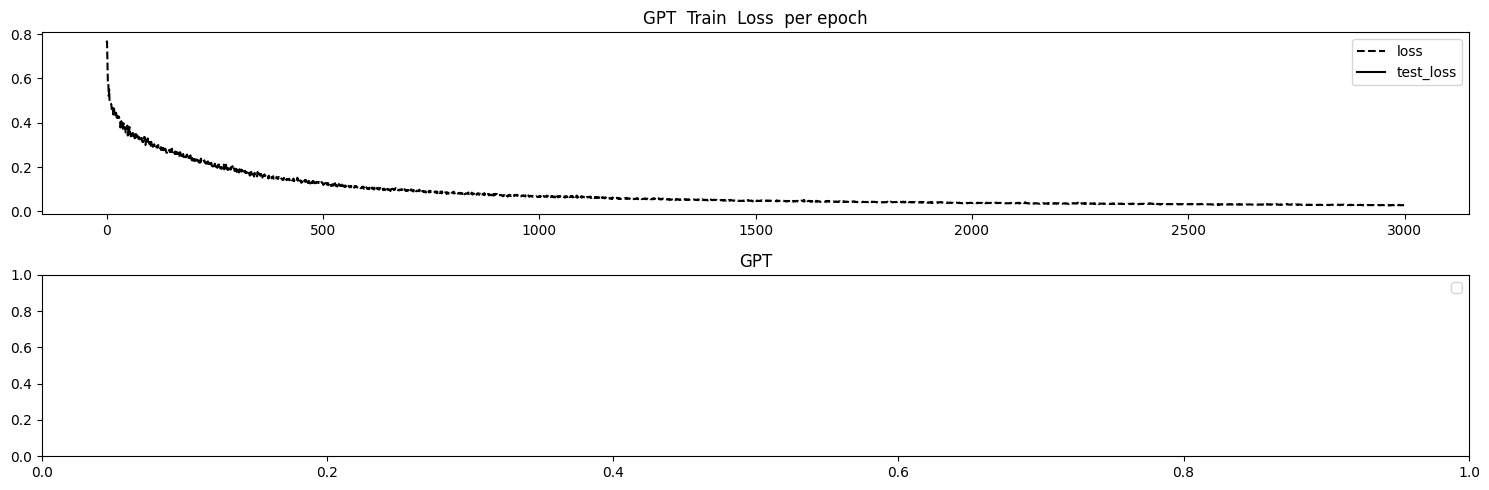

(15, 25)
(100, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

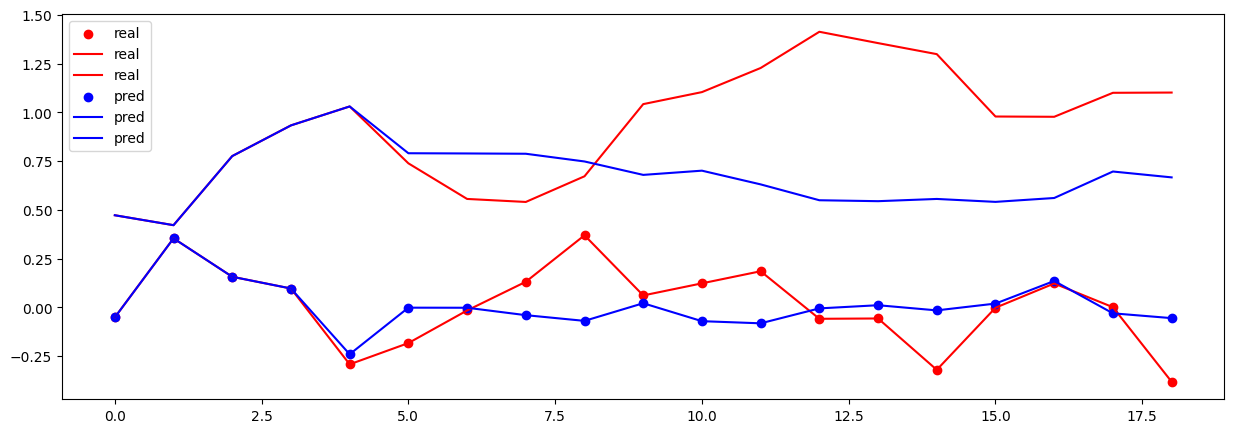

(100, 25)
119
19


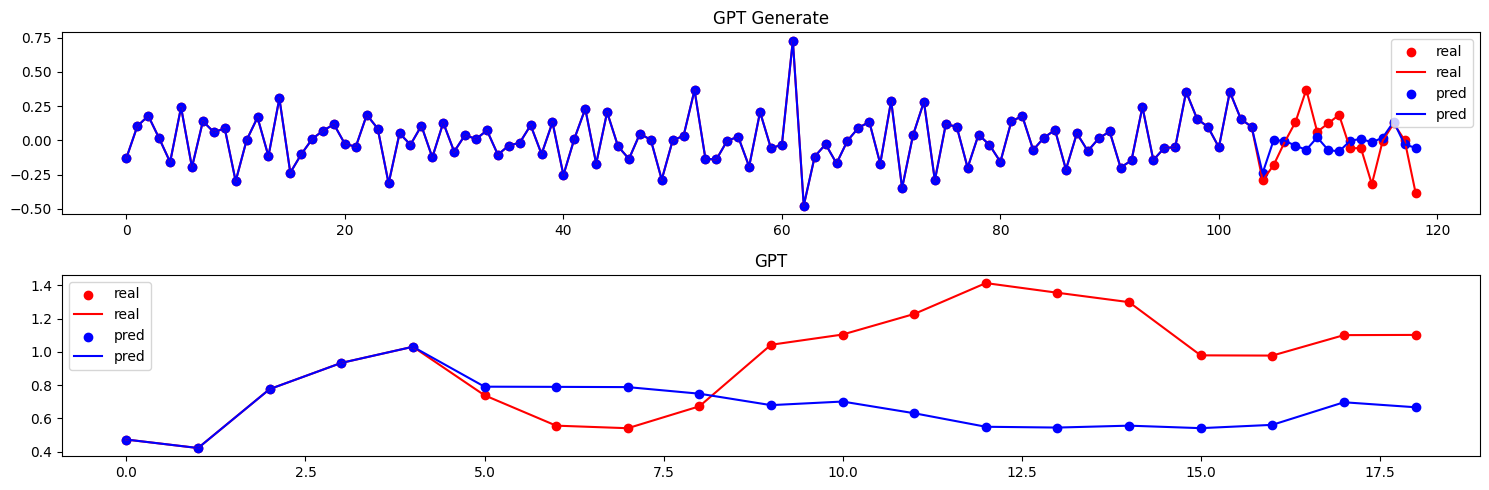

In [70]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk300to400_train )

function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([200, 25])
0 train loss =  0.8418483138084412
500 train loss =  0.18645955622196198
1000 train loss =  0.10605397075414658
1500 train loss =  0.07275093346834183
2000 train loss =  0.055025529116392136
2500 train loss =  0.04683435335755348


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


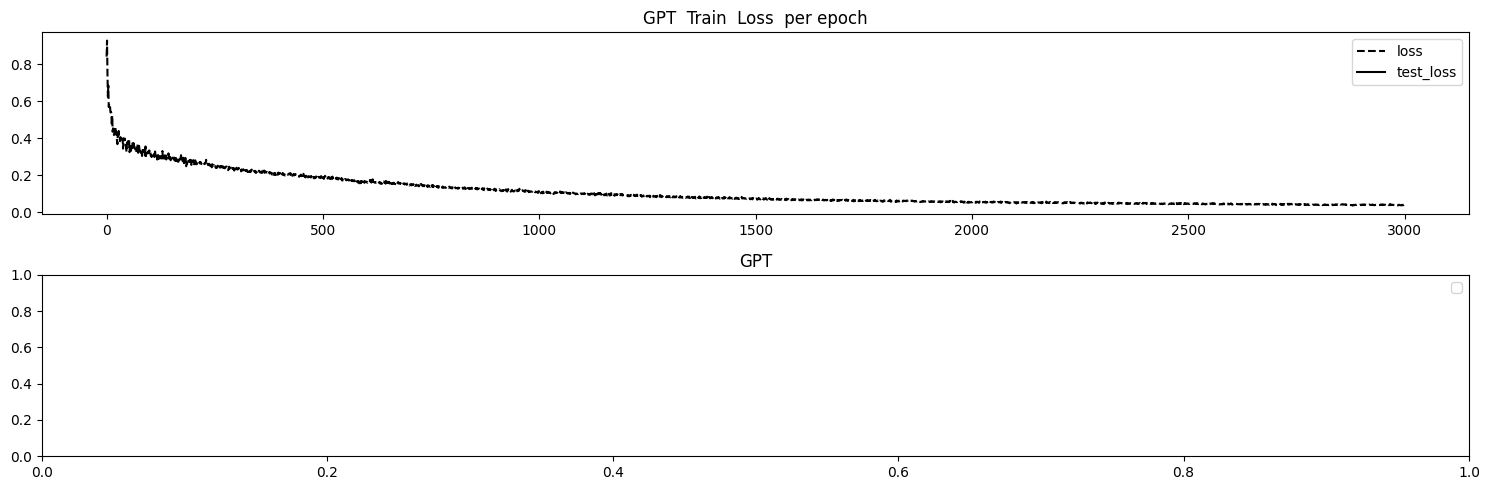

(15, 25)
(200, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

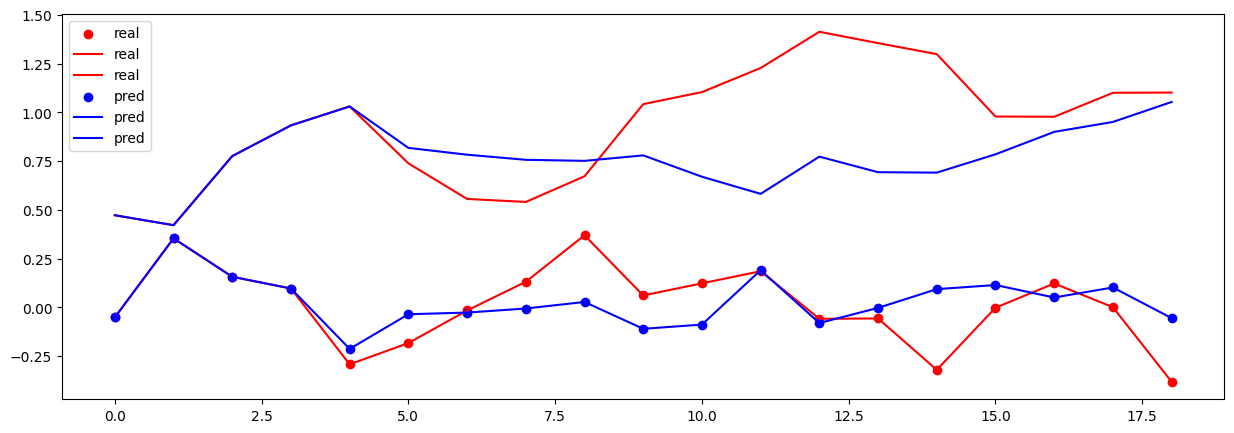

(200, 25)
219
19


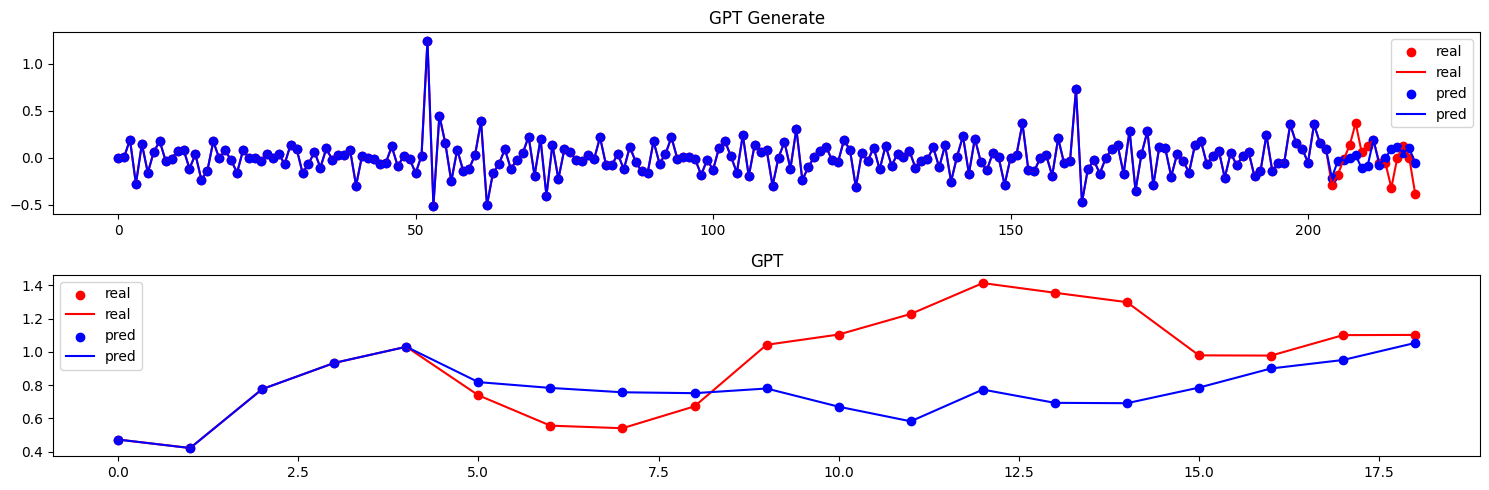

In [71]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk200to400_train )

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


(15, 25)
(200, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

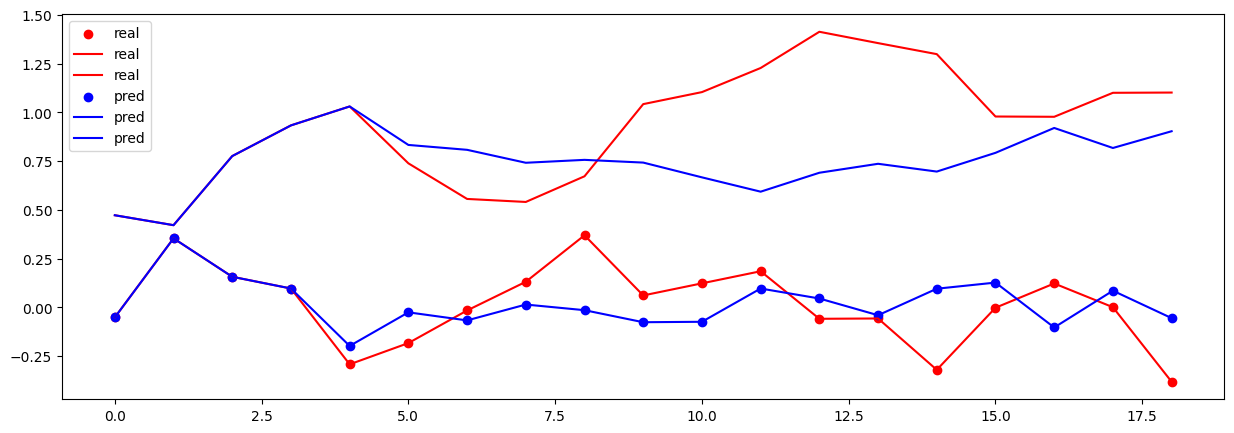

(200, 25)
219
19


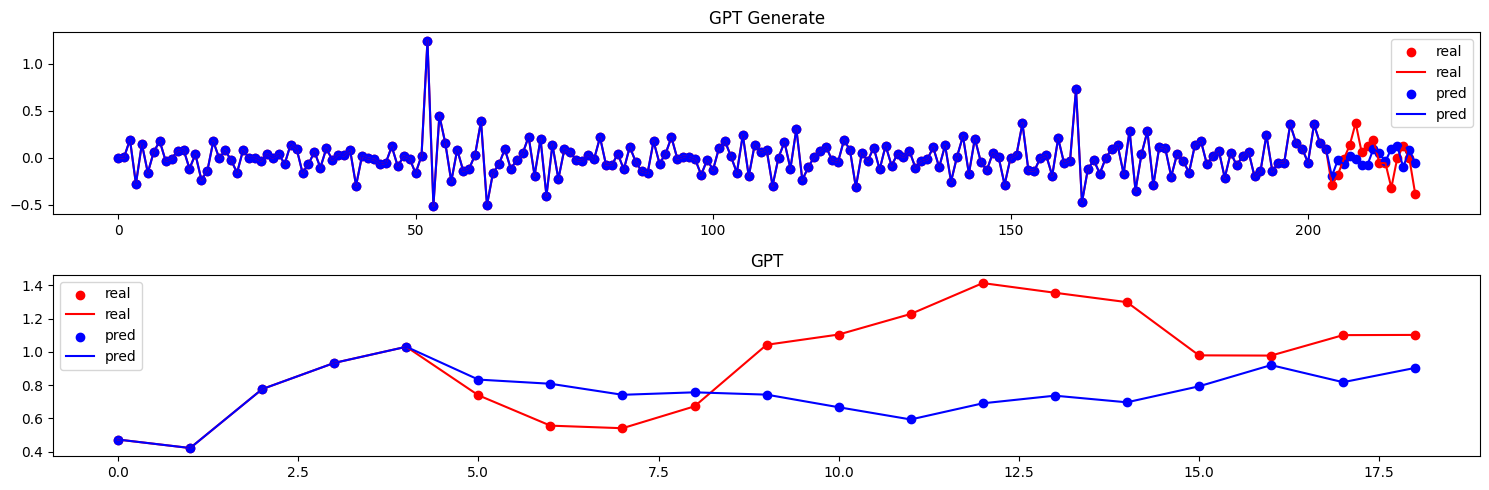

In [72]:

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([300, 25])
0 train loss =  0.7900482416152954
500 train loss =  0.21244271099567413
1000 train loss =  0.13490377366542816
1500 train loss =  0.09712441265583038
2000 train loss =  0.07166185230016708
2500 train loss =  0.060466181486845016


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


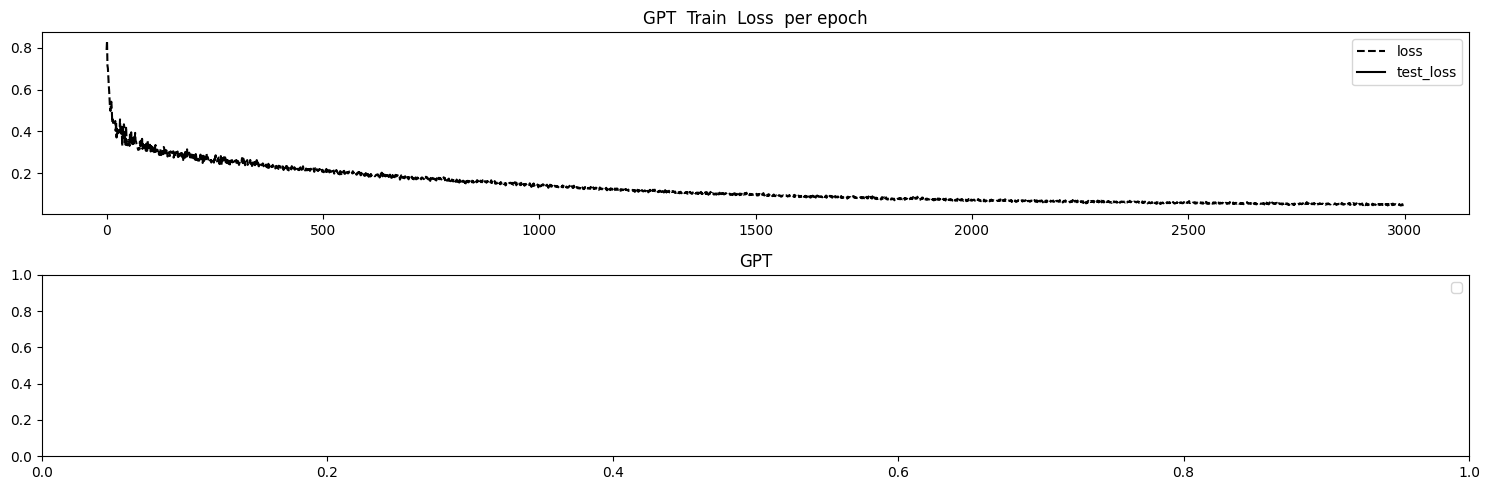

(15, 25)
(300, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

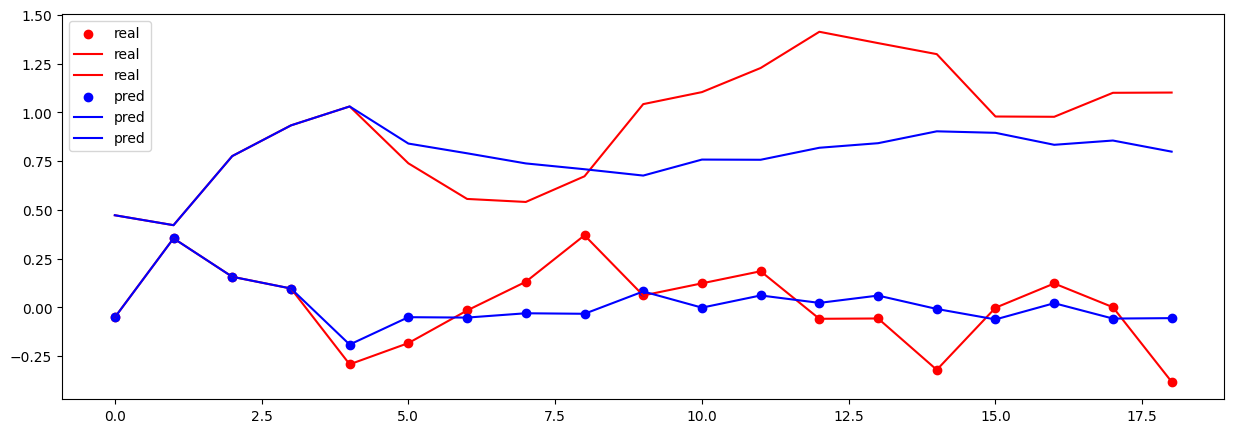

(300, 25)
319
19


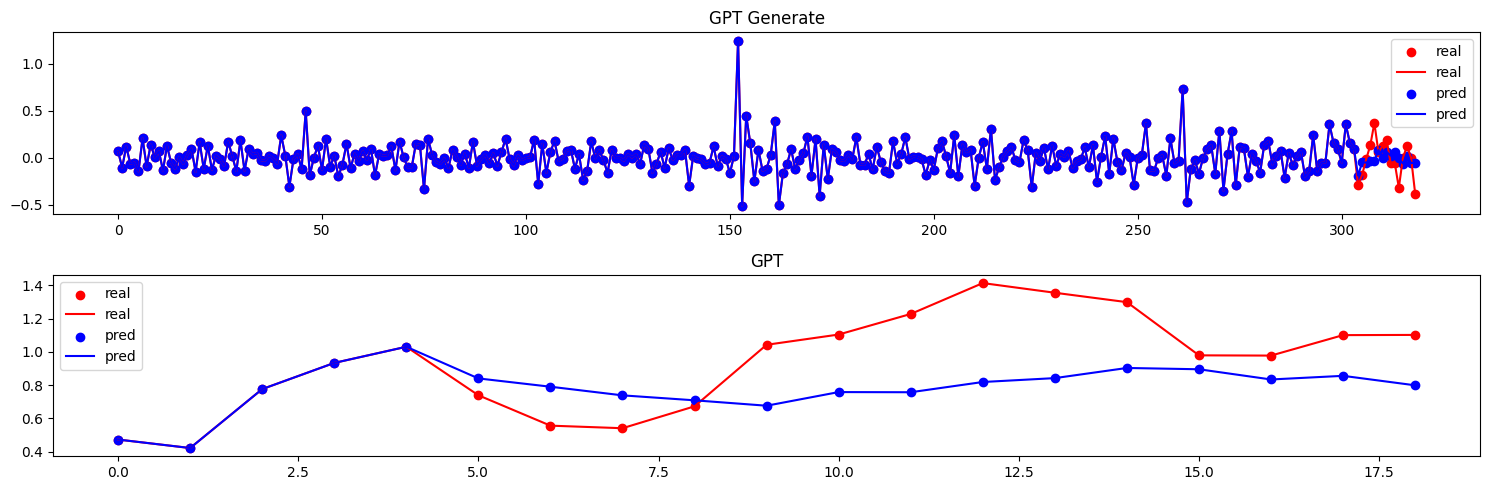

In [73]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk100to400_train  )

function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([400, 25])
0 train loss =  0.8750981092453003
500 train loss =  0.21874840557575226
1000 train loss =  0.16545705497264862
1500 train loss =  0.12141287326812744
2000 train loss =  0.08933789283037186
2500 train loss =  0.0696084275841713


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


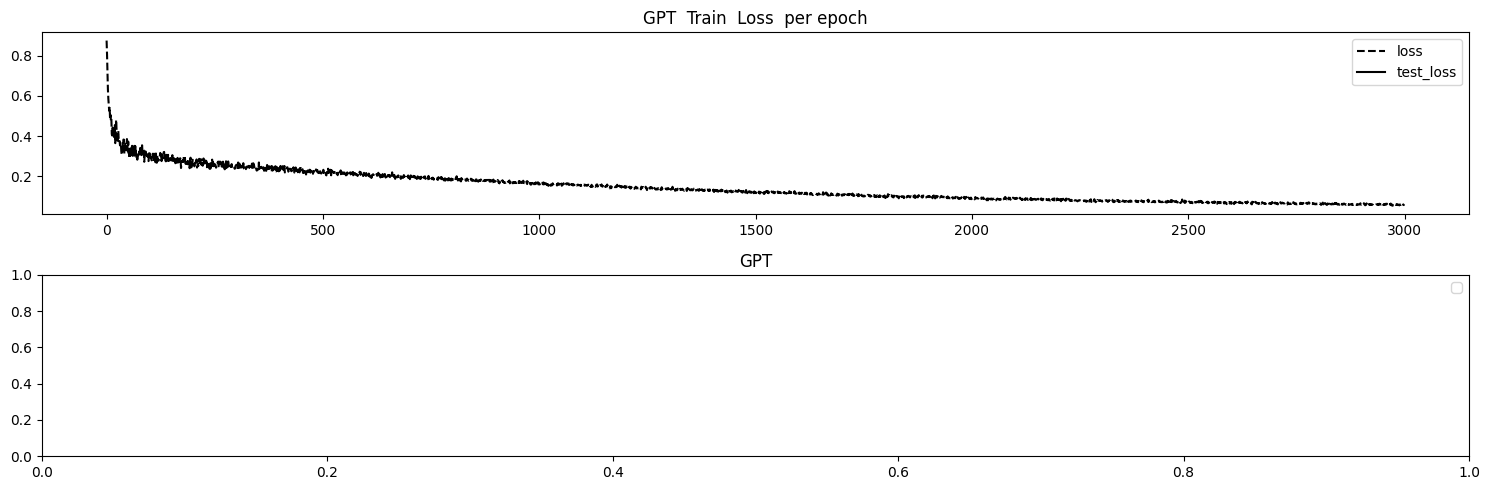

(15, 25)
(400, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

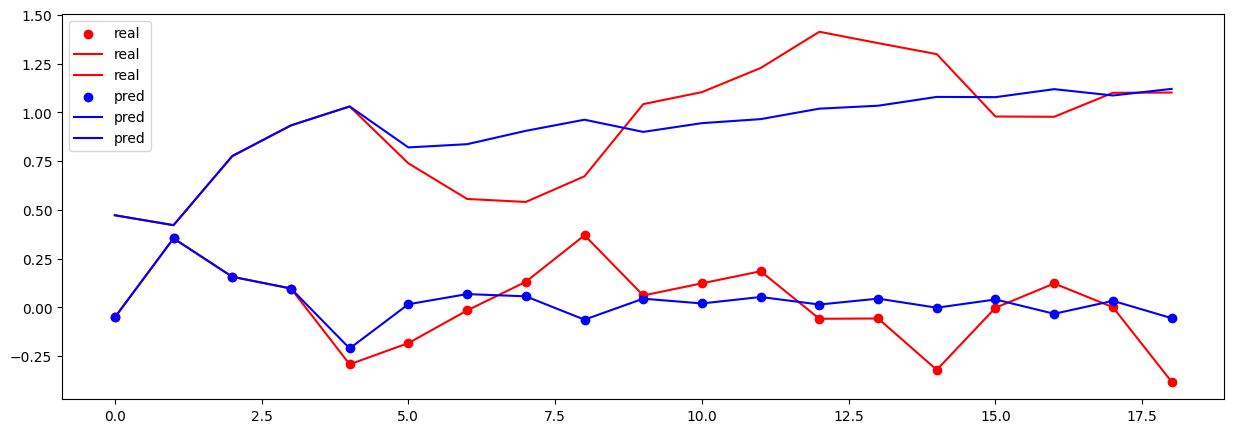

(400, 25)
419
19


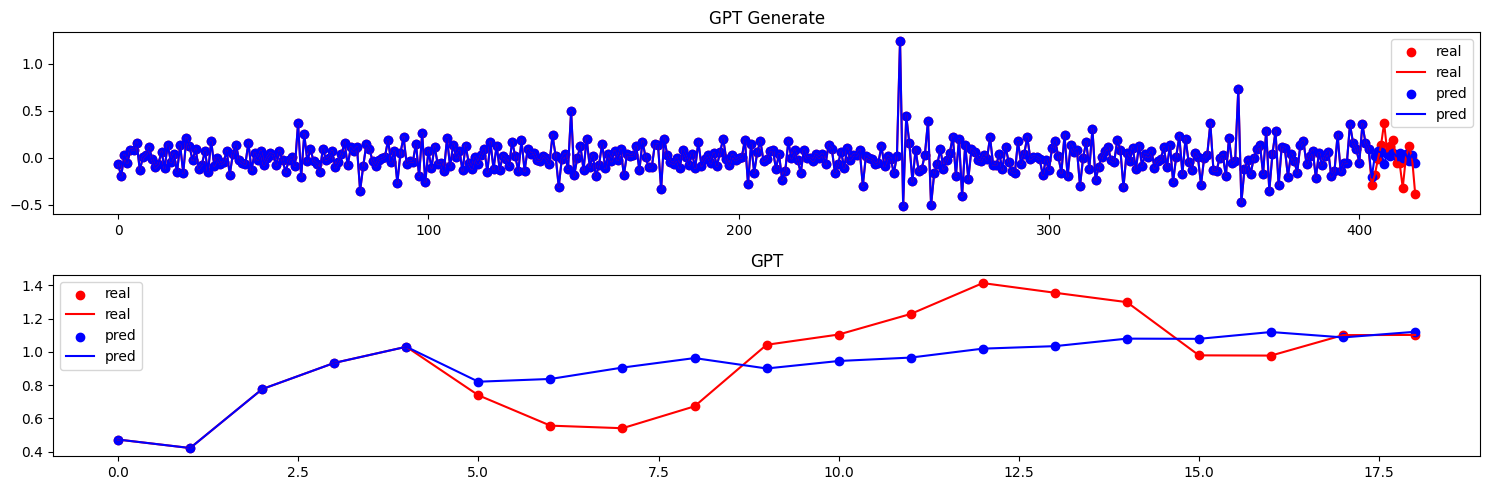

In [74]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk000to400_train )

function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



## Run 2


In [75]:

the_range = training_chunk + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice

print( for_RNN_data_CIVS.shape[0] )
print( index_to_slice )
print( index_to_slice + the_range )

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

n = block_size

print( n )

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

chunk300to400_train = train_CIVS[ 300  :  ] 
chunk200to400_train = train_CIVS[ 200  :  ]  
chunk100to400_train = train_CIVS[ 100  :  ] 
chunk000to400_train = train_CIVS[      :  ]  


print( chunk300to400_train.shape )
print( chunk200to400_train.shape )
print( chunk100to400_train.shape )
print( chunk000to400_train.shape )





1383
541
956
15
(100, 25)
(200, 25)
(300, 25)
(400, 25)


torch.Size([100, 25])
0 train loss =  0.7360509634017944
500 train loss =  0.11306339502334595
1000 train loss =  0.06596431881189346
1500 train loss =  0.04651004821062088
2000 train loss =  0.03782264515757561
2500 train loss =  0.03302928805351257


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


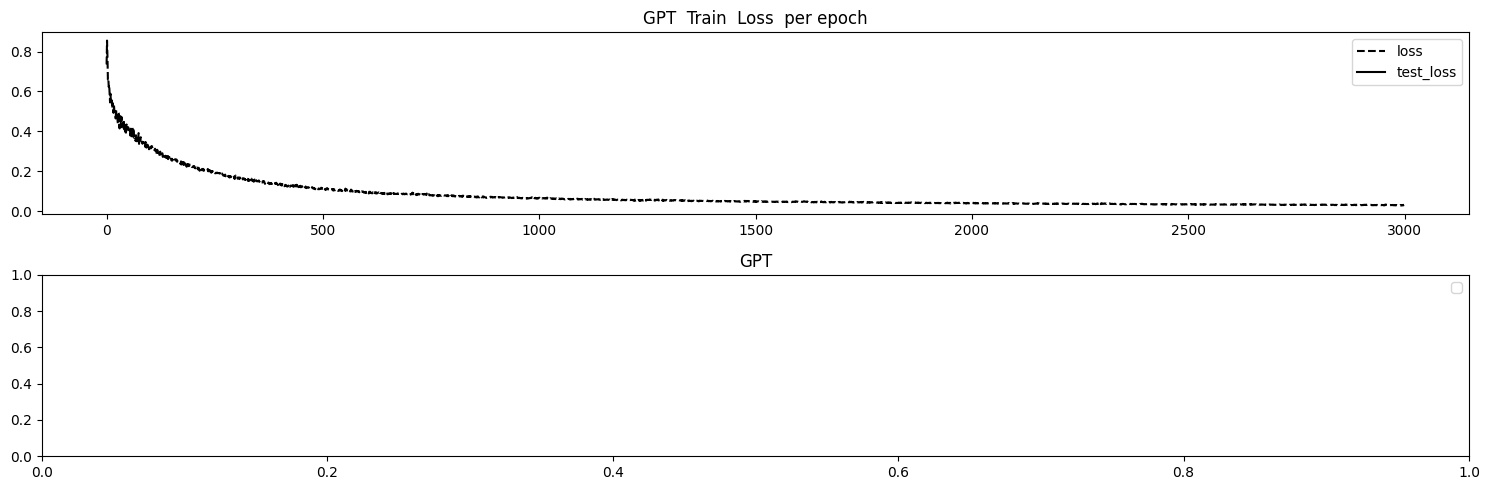

(15, 25)
(100, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

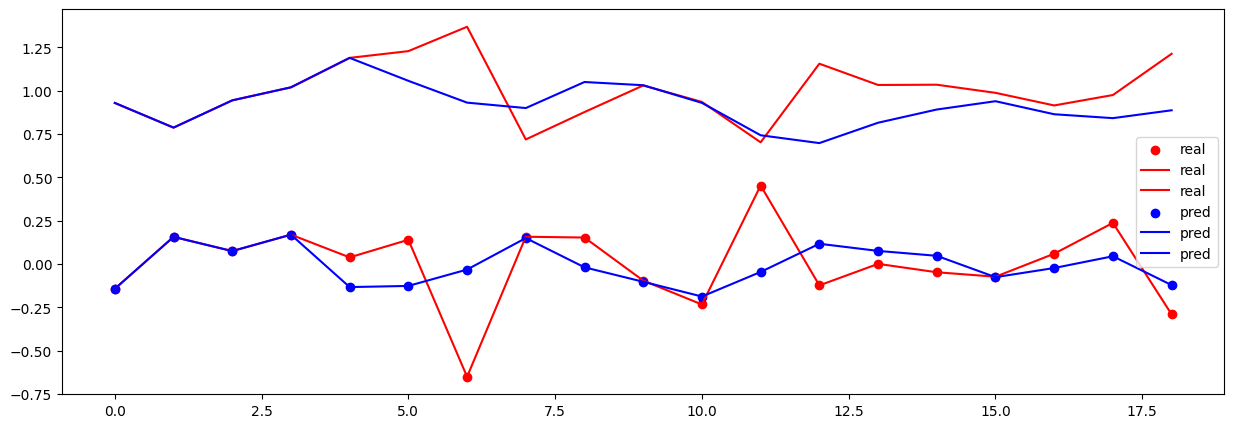

(100, 25)
119
19


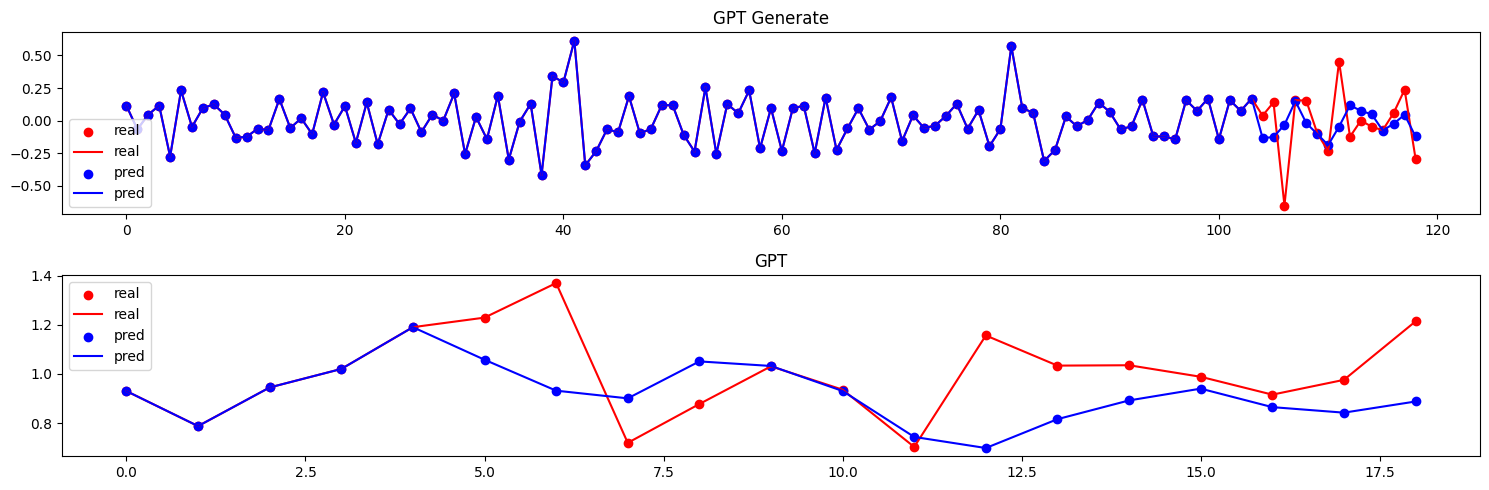

In [76]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk300to400_train )

function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([200, 25])
0 train loss =  0.839492678642273
500 train loss =  0.17018605768680573
1000 train loss =  0.0909152701497078
1500 train loss =  0.06608016788959503
2000 train loss =  0.05026448518037796
2500 train loss =  0.04366036877036095


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


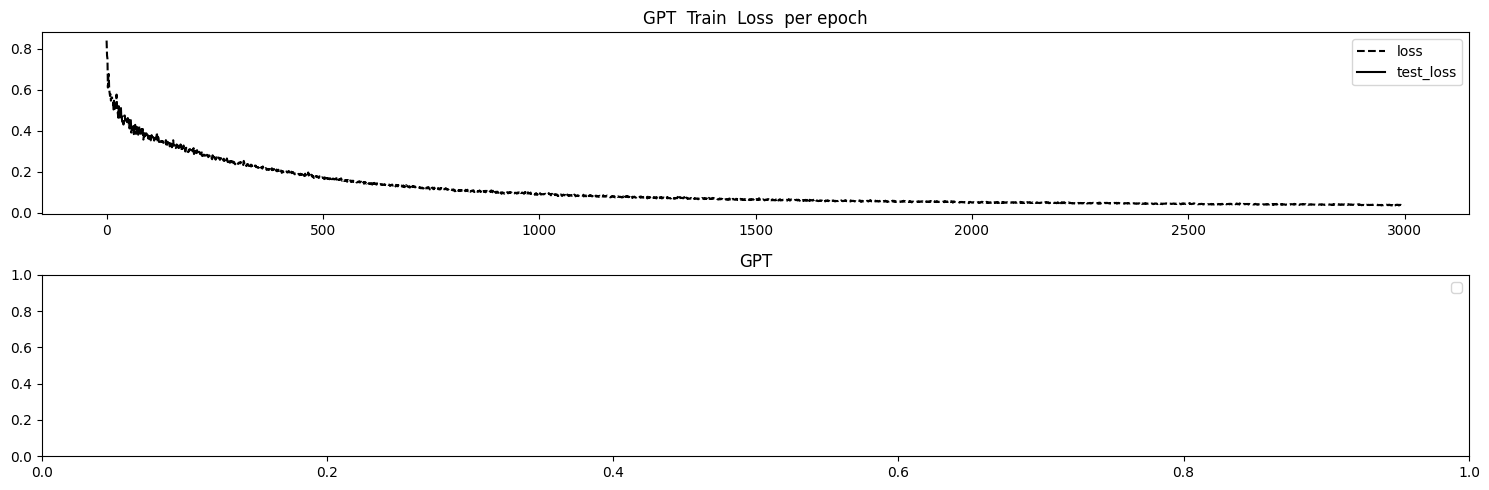

(15, 25)
(200, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

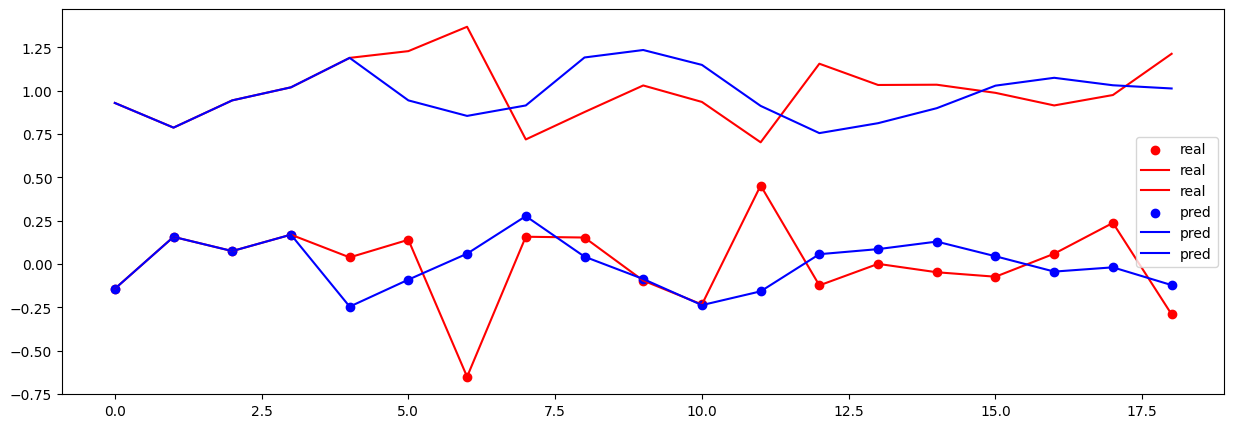

(200, 25)
219
19


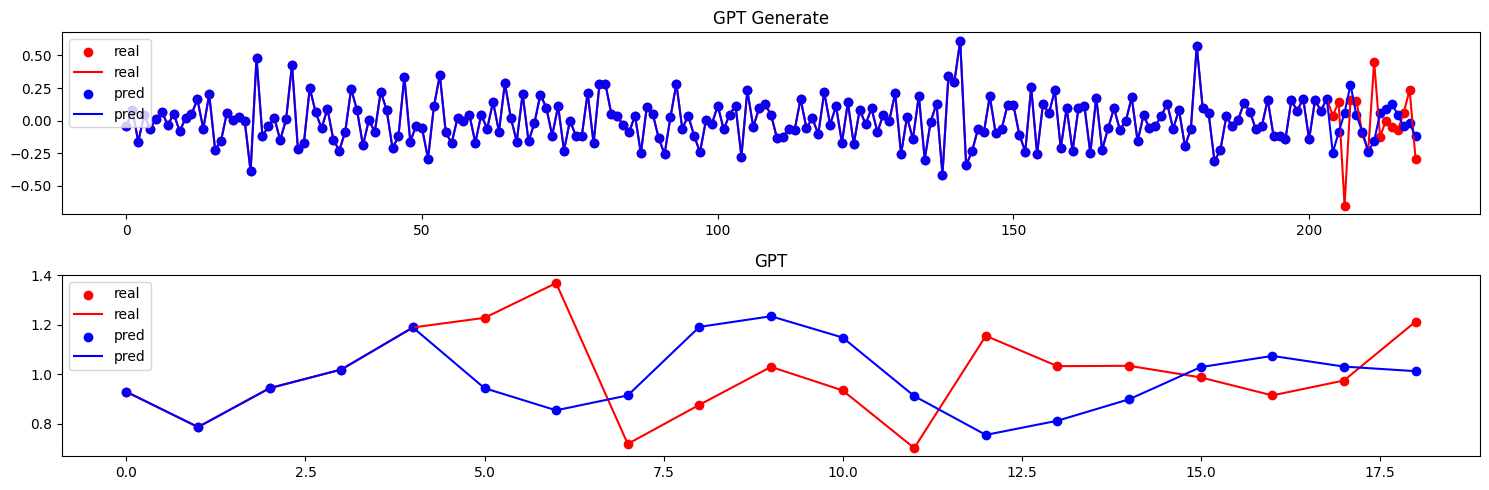

In [77]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk200to400_train )

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([300, 25])
0 train loss =  0.8033348917961121
500 train loss =  0.21678686141967773
1000 train loss =  0.12642709910869598
1500 train loss =  0.08214814960956573
2000 train loss =  0.059517934918403625
2500 train loss =  0.05015770345926285


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


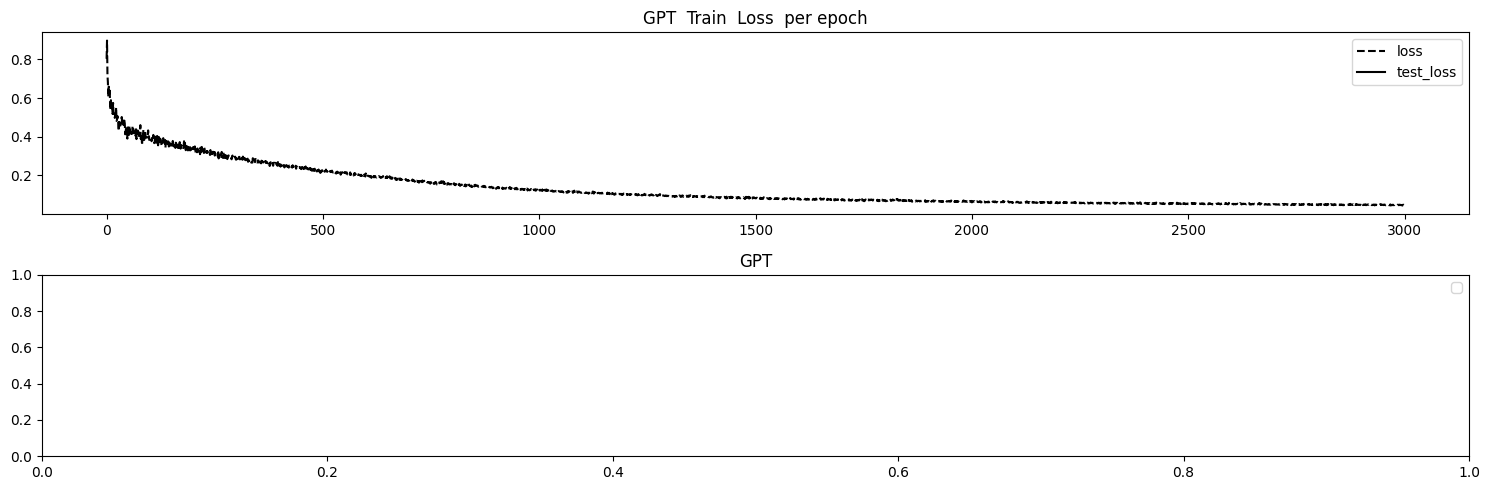

(15, 25)
(300, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

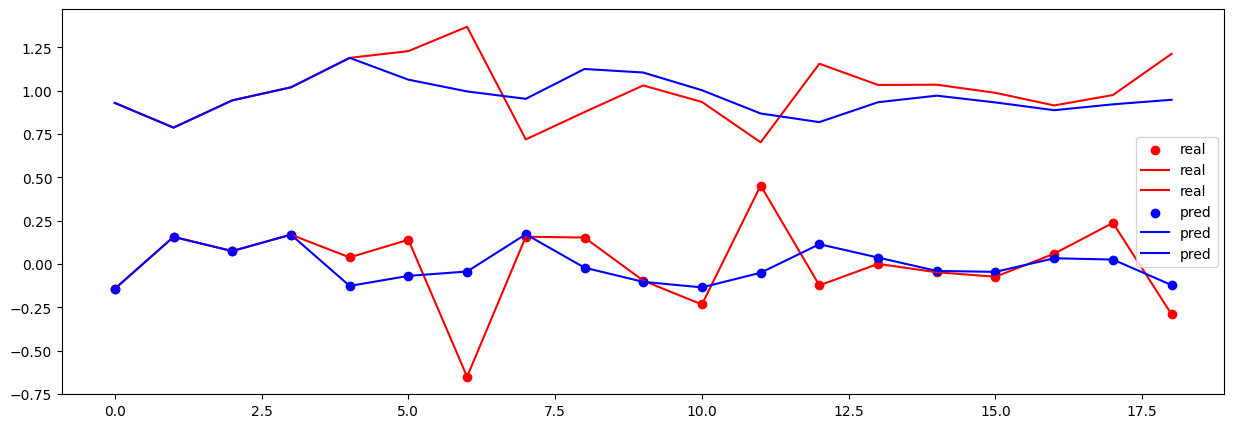

(300, 25)
319
19


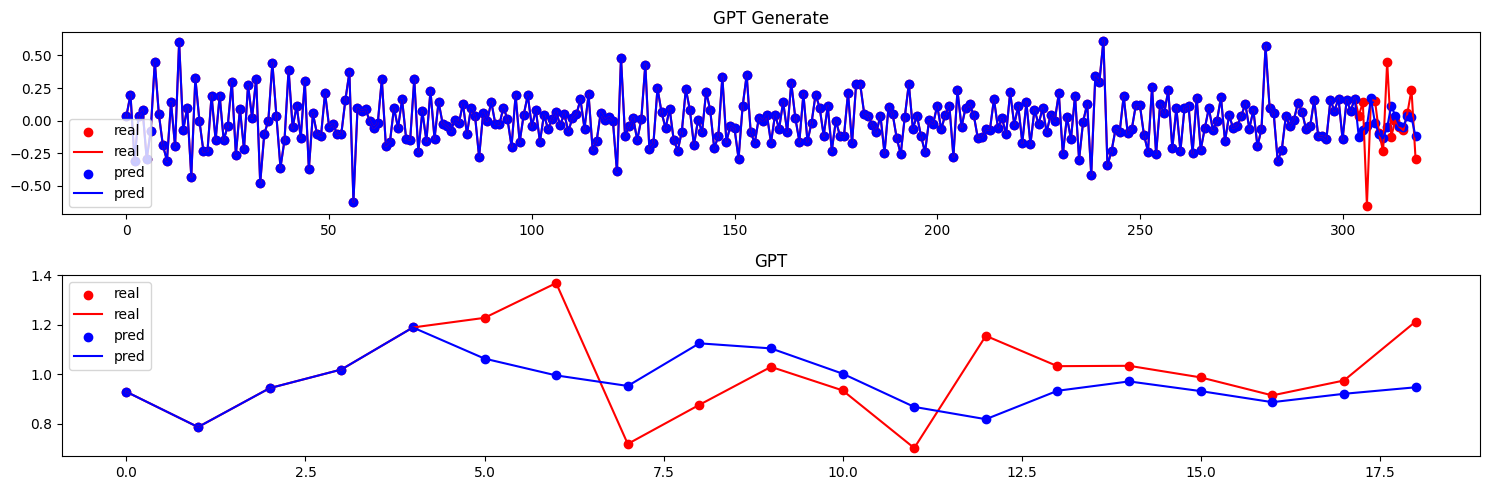

In [78]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk100to400_train  )

function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([400, 25])
0 train loss =  0.7840222716331482
500 train loss =  0.2520599961280823
1000 train loss =  0.15590636432170868
1500 train loss =  0.10851001739501953
2000 train loss =  0.07967246323823929
2500 train loss =  0.06214531511068344


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


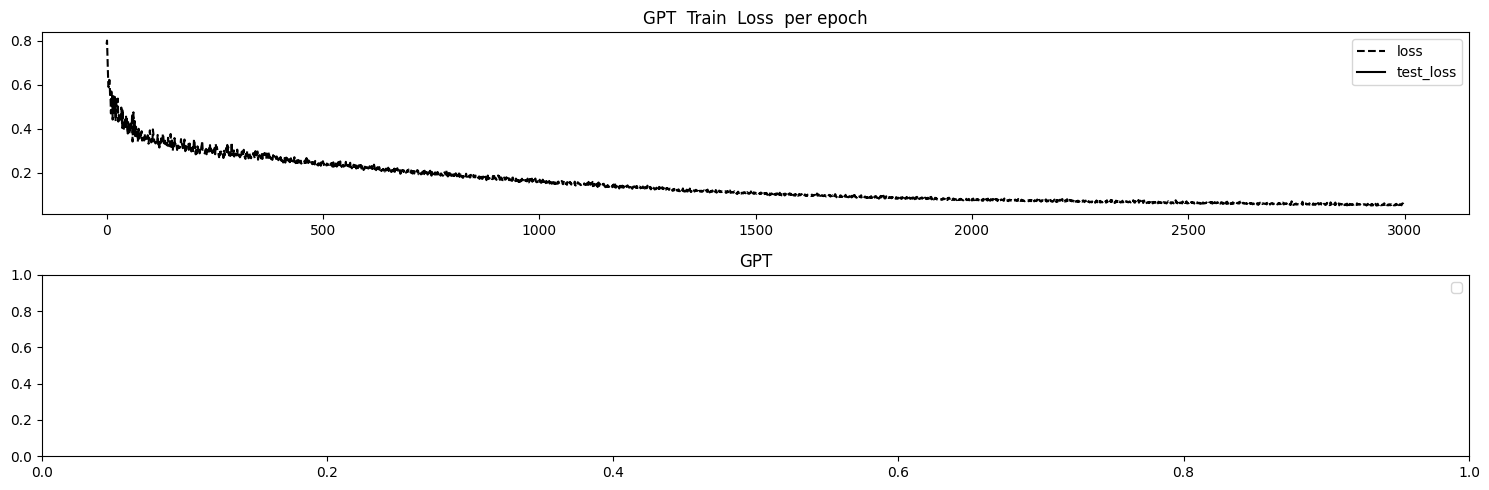

(15, 25)
(400, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

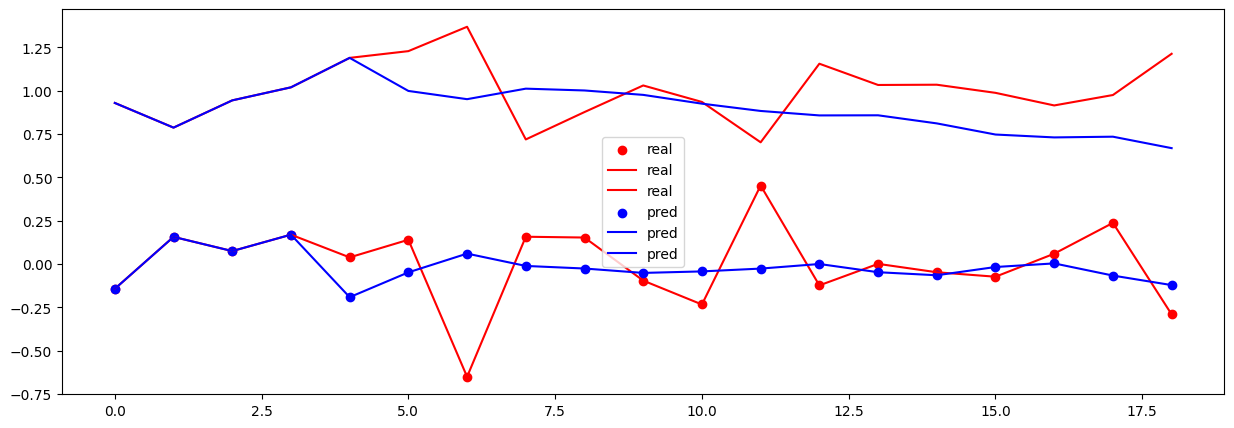

(400, 25)
419
19


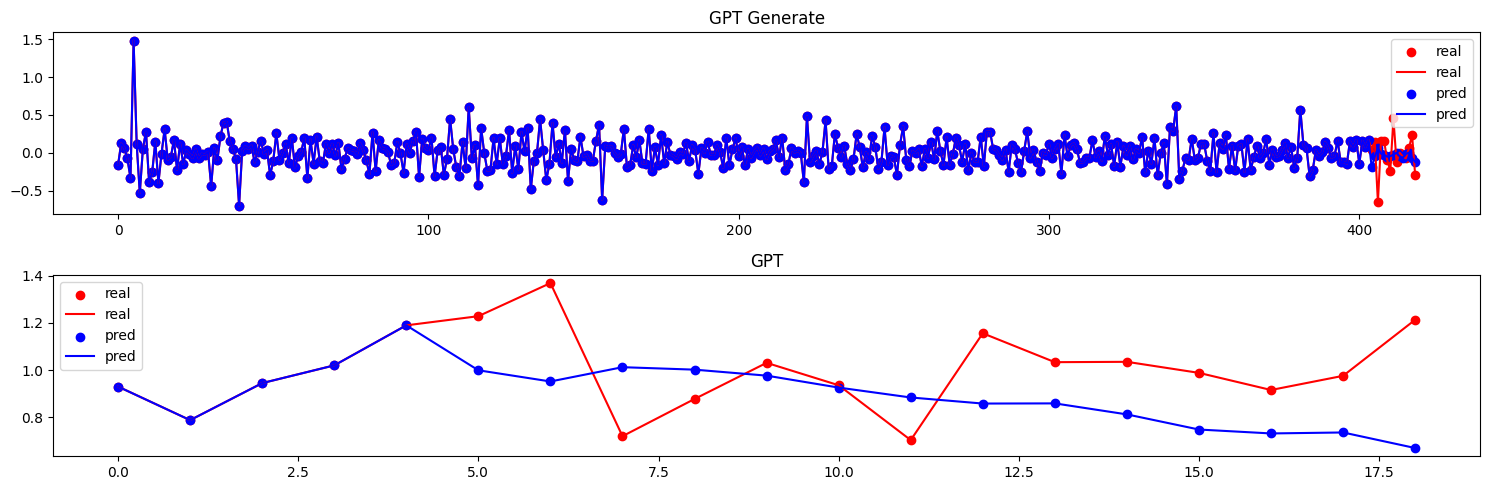

In [79]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk000to400_train )

function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



## Run 3


In [80]:

the_range = training_chunk + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice

print( for_RNN_data_CIVS.shape[0] )
print( index_to_slice )
print( index_to_slice + the_range )

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

n = block_size

print( n )

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

chunk300to400_train = train_CIVS[ 300  :  ] 
chunk200to400_train = train_CIVS[ 200  :  ]  
chunk100to400_train = train_CIVS[ 100  :  ] 
chunk000to400_train = train_CIVS[      :  ] 


print( chunk300to400_train.shape )
print( chunk200to400_train.shape )
print( chunk100to400_train.shape )
print( chunk000to400_train.shape )



1383
882
1297
15
(100, 25)
(200, 25)
(300, 25)
(400, 25)


torch.Size([100, 25])
0 train loss =  0.8094884157180786
500 train loss =  0.1227429211139679
1000 train loss =  0.06681468337774277
1500 train loss =  0.04863468557596207
2000 train loss =  0.039446551352739334
2500 train loss =  0.0330314114689827


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


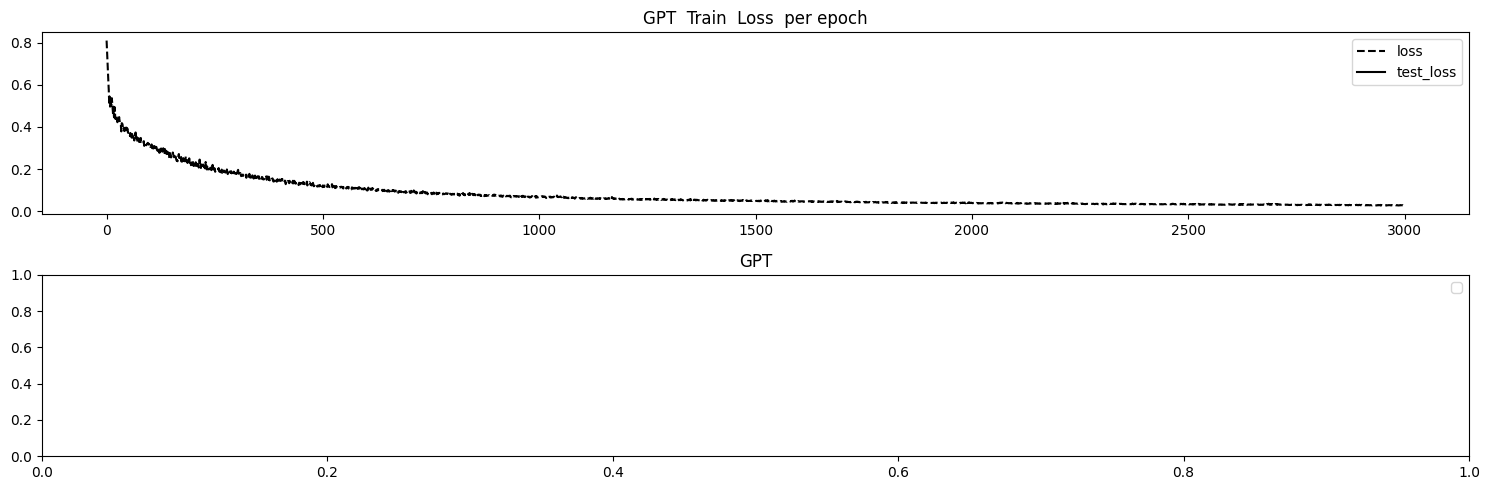

(15, 25)
(100, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

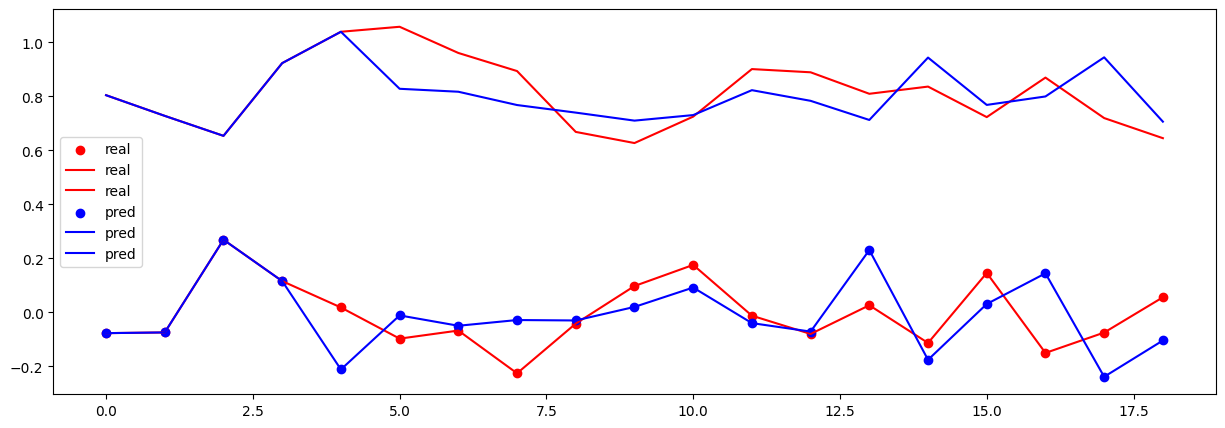

(100, 25)
119
19


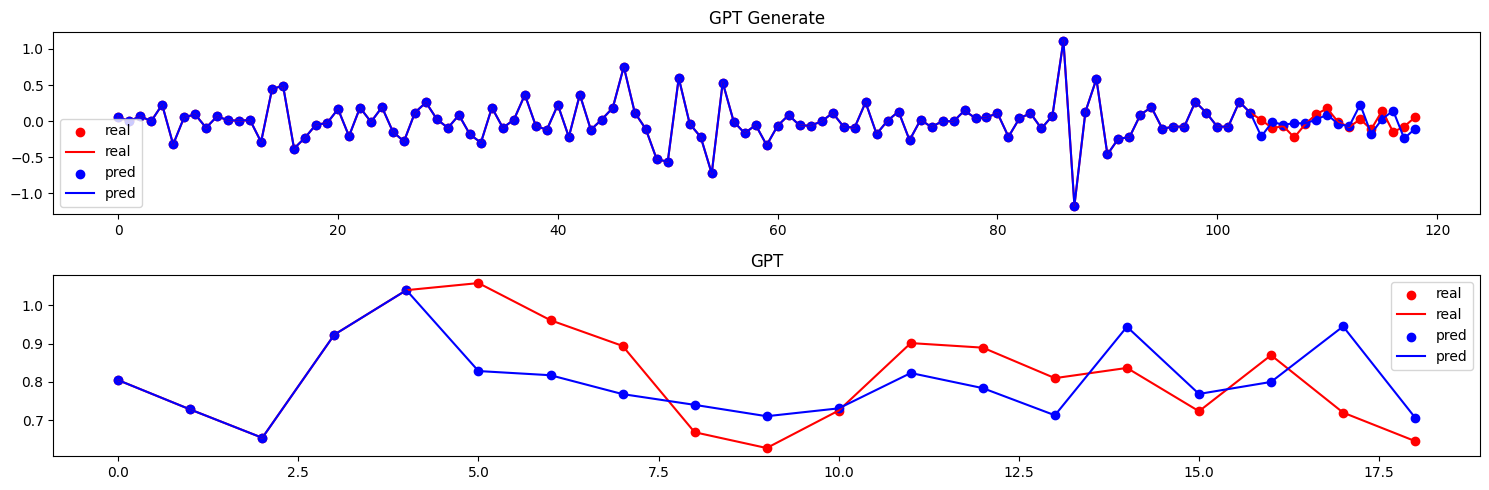

In [81]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk300to400_train )

function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([200, 25])
0 train loss =  0.7919492721557617
500 train loss =  0.19621771574020386
1000 train loss =  0.10647625476121902
1500 train loss =  0.069722481071949
2000 train loss =  0.05070456862449646
2500 train loss =  0.04257911071181297


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


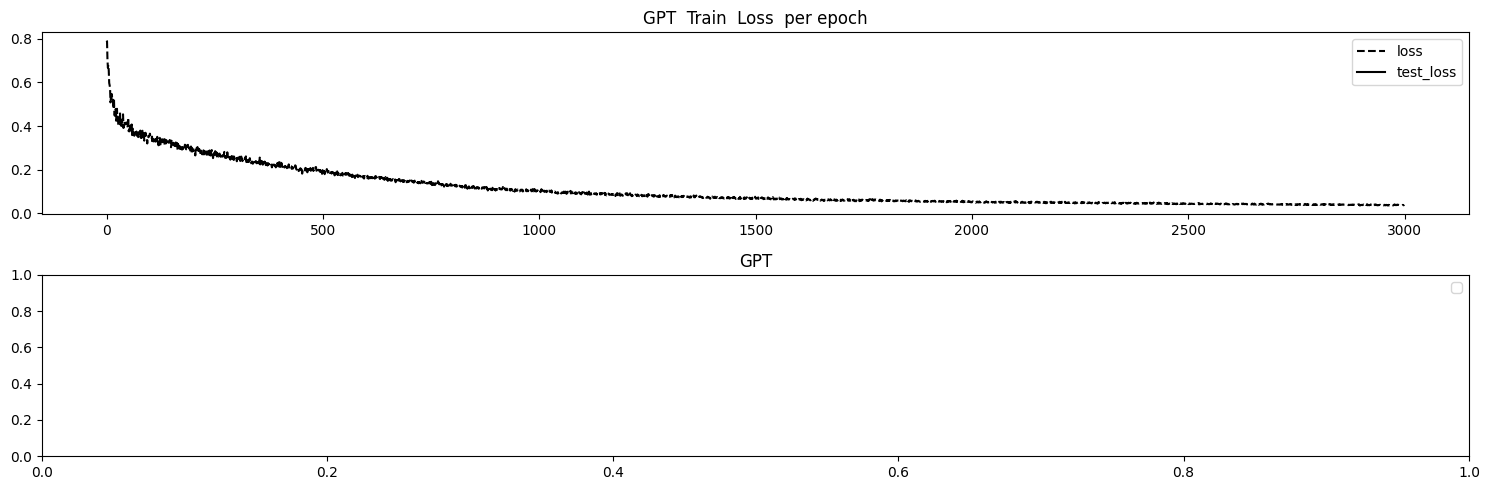

(15, 25)
(200, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

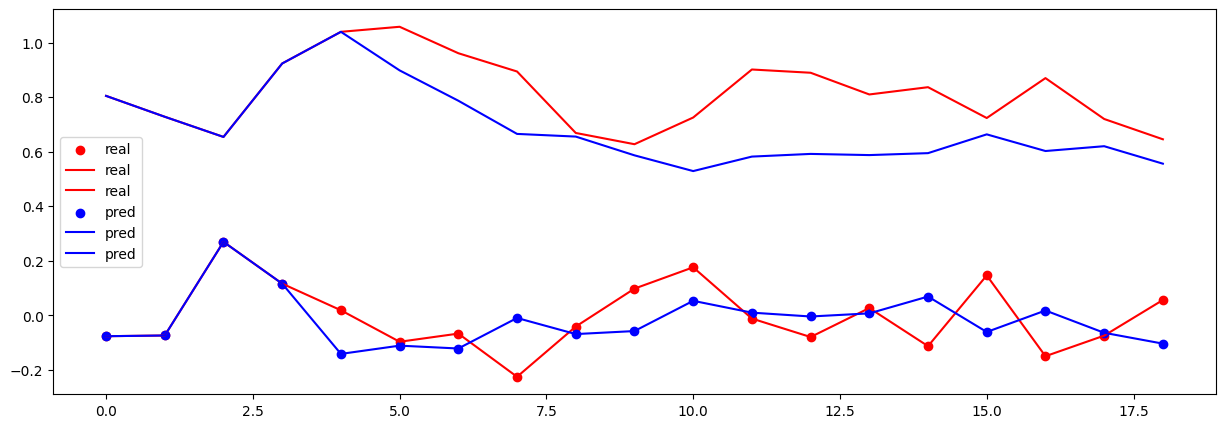

(200, 25)
219
19


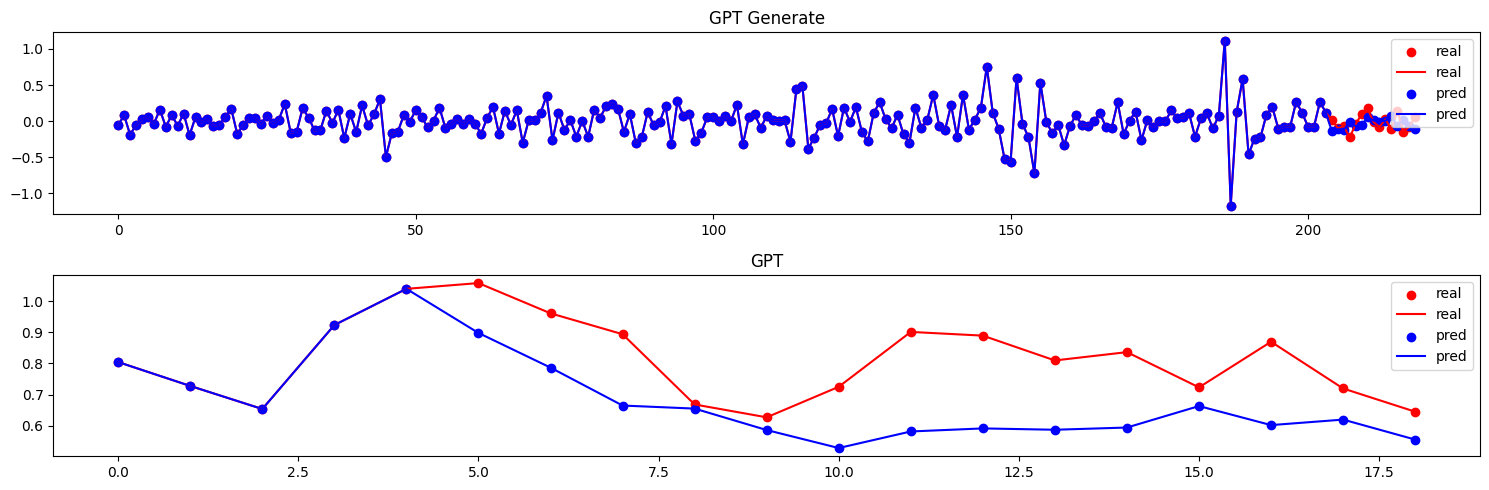

In [82]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk200to400_train )

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([300, 25])
0 train loss =  0.8068956732749939
500 train loss =  0.2108256071805954
1000 train loss =  0.13923843204975128
1500 train loss =  0.09211751073598862
2000 train loss =  0.0678156167268753
2500 train loss =  0.058870747685432434


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


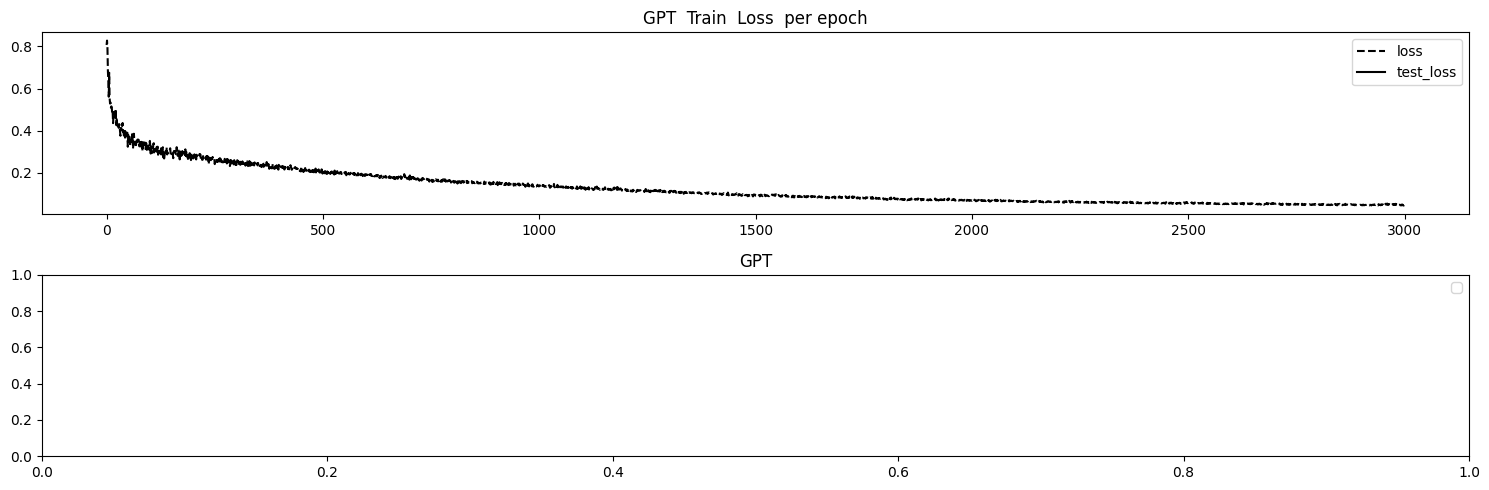

(15, 25)
(300, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

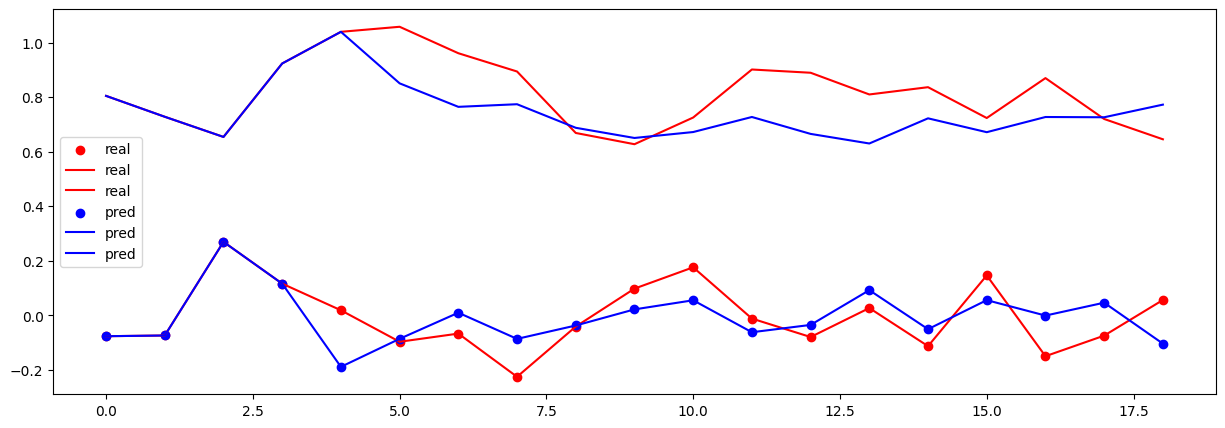

(300, 25)
319
19


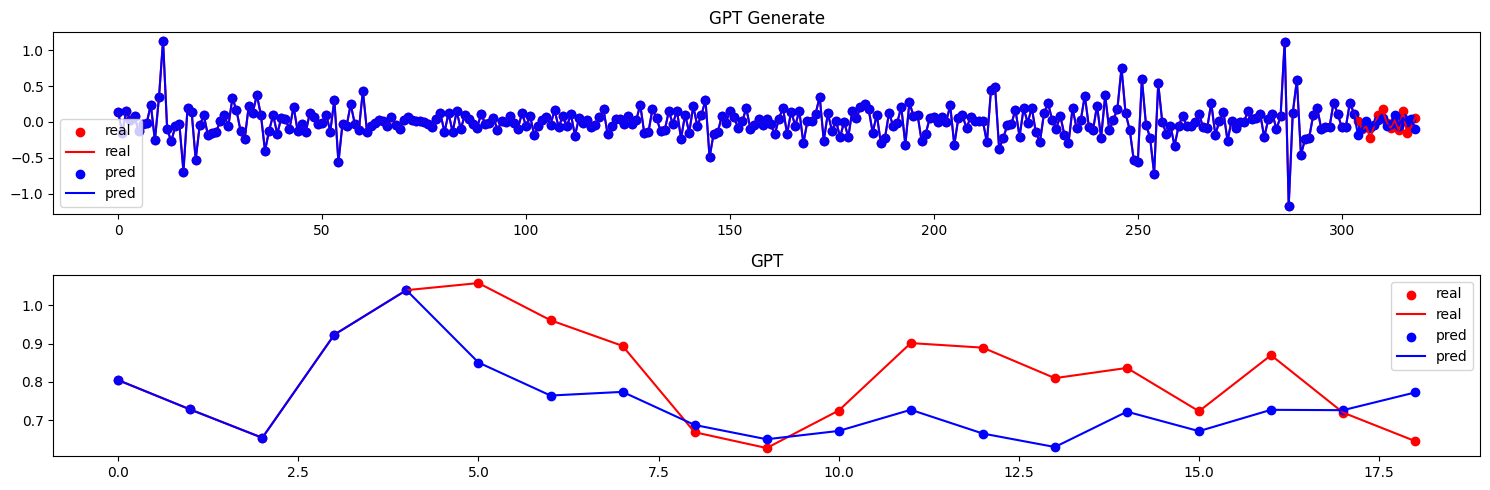

In [83]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk100to400_train  )

function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([400, 25])
0 train loss =  0.8584938049316406
500 train loss =  0.22179105877876282
1000 train loss =  0.15692035853862762
1500 train loss =  0.11286920309066772
2000 train loss =  0.08613408356904984
2500 train loss =  0.06531185656785965


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


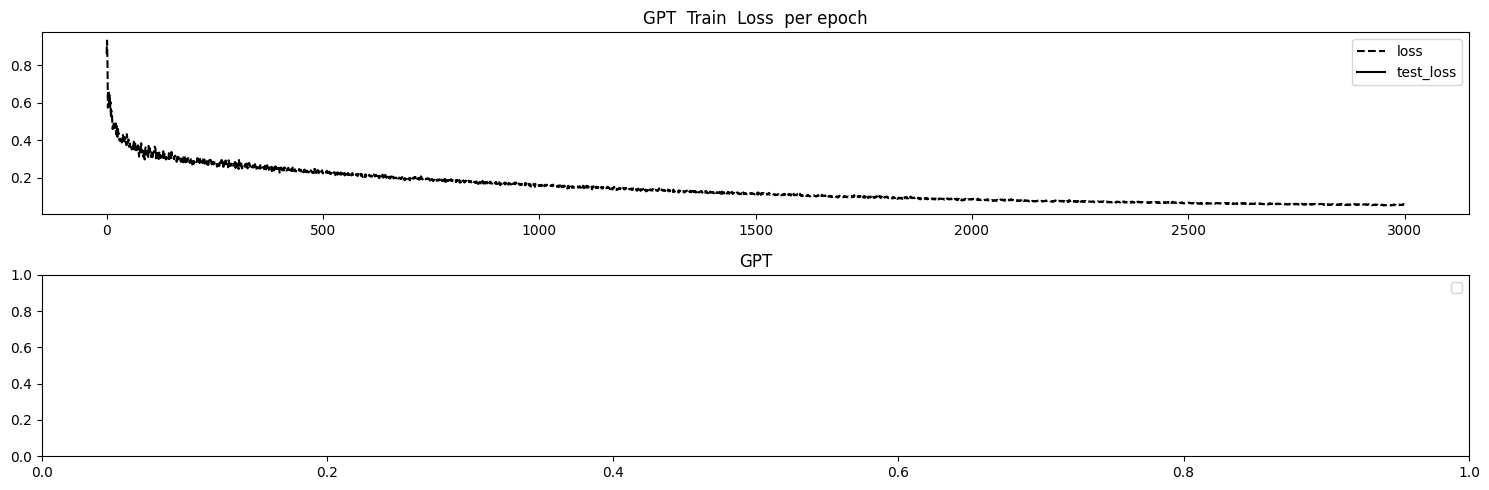

(15, 25)
(400, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

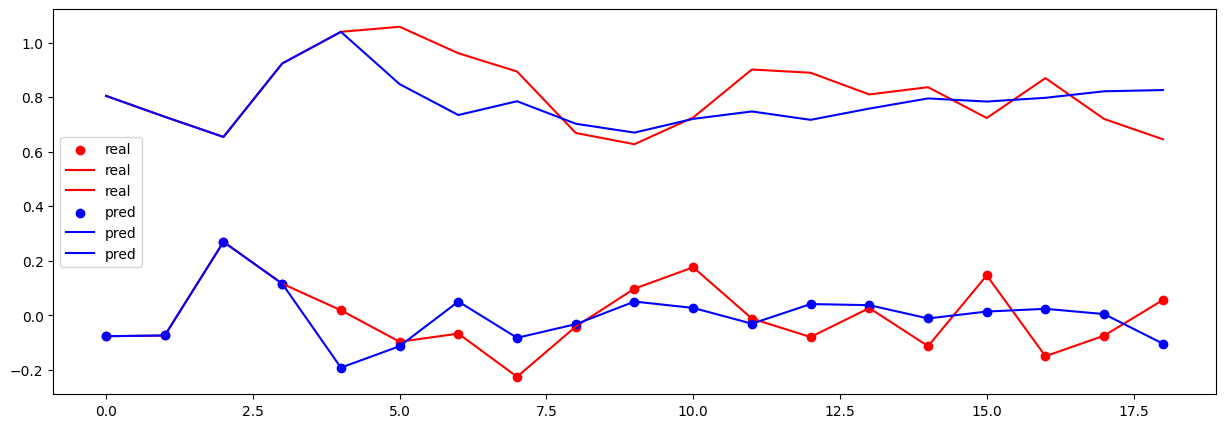

(400, 25)
419
19


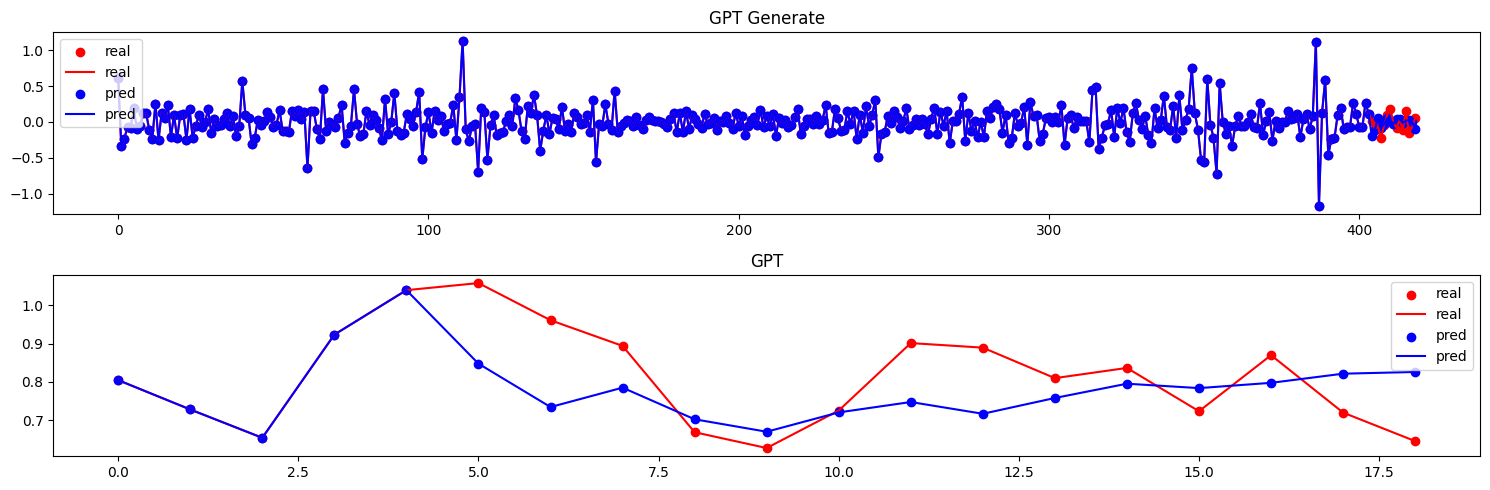

In [84]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk000to400_train )

function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



## Run 4


In [85]:

the_range = training_chunk + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice

print( for_RNN_data_CIVS.shape[0] )
print( index_to_slice )
print( index_to_slice + the_range )

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

n = block_size

print( n )

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

chunk300to400_train = train_CIVS[ 300  :  ] 
chunk200to400_train = train_CIVS[ 200  :  ]  
chunk100to400_train = train_CIVS[ 100  :  ] 
chunk000to400_train = train_CIVS[      :  ] 


print( chunk300to400_train.shape )
print( chunk200to400_train.shape )
print( chunk100to400_train.shape )
print( chunk000to400_train.shape )


1383
182
597
15
(100, 25)
(200, 25)
(300, 25)
(400, 25)


torch.Size([100, 25])
0 train loss =  0.813744068145752
500 train loss =  0.12757037580013275
1000 train loss =  0.06753606349229813
1500 train loss =  0.048808515071868896
2000 train loss =  0.03754929453134537
2500 train loss =  0.03196801245212555


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


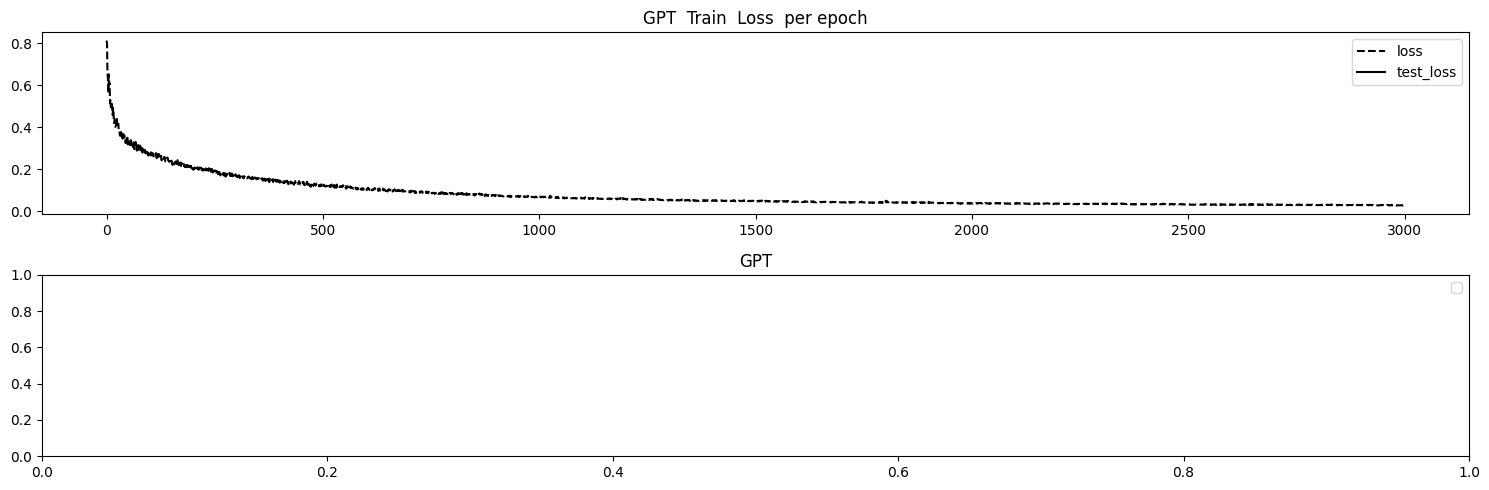

(15, 25)
(100, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

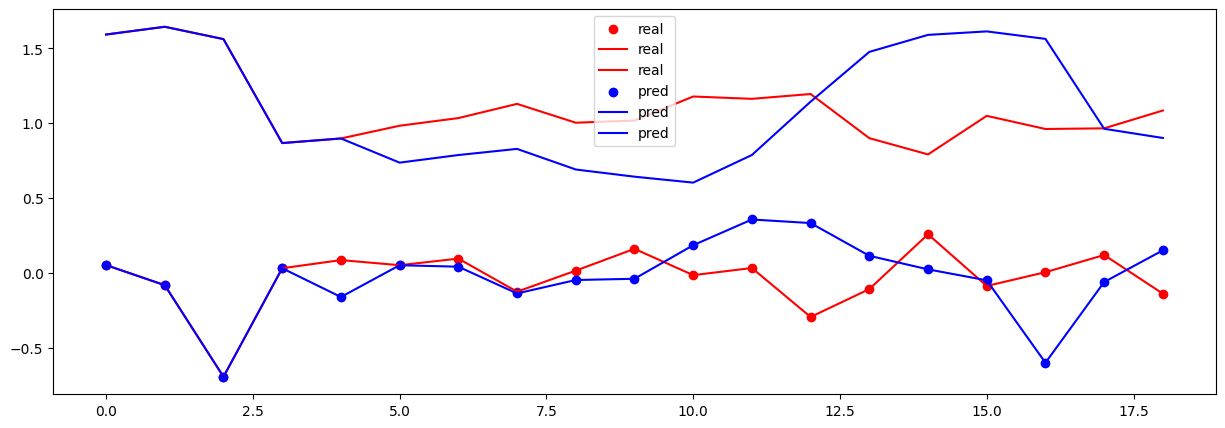

(100, 25)
119
19


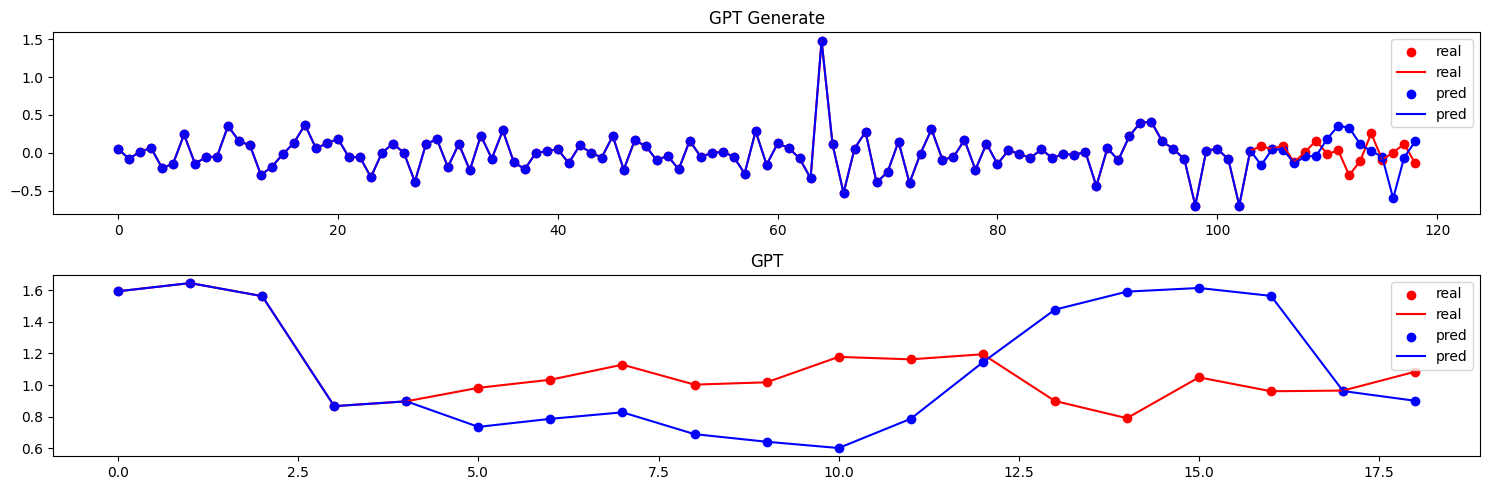

In [86]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk300to400_train )

function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([200, 25])
0 train loss =  0.8062002062797546
500 train loss =  0.1833796352148056
1000 train loss =  0.10971643030643463
1500 train loss =  0.07317883521318436
2000 train loss =  0.05194532126188278
2500 train loss =  0.0456077866256237


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


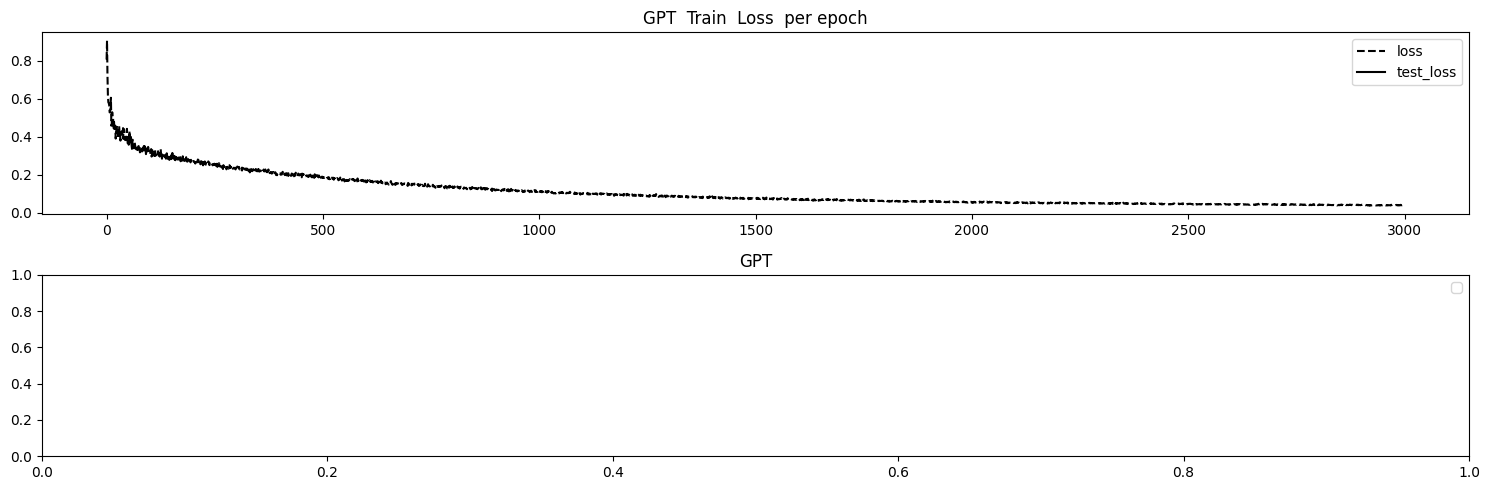

(15, 25)
(200, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

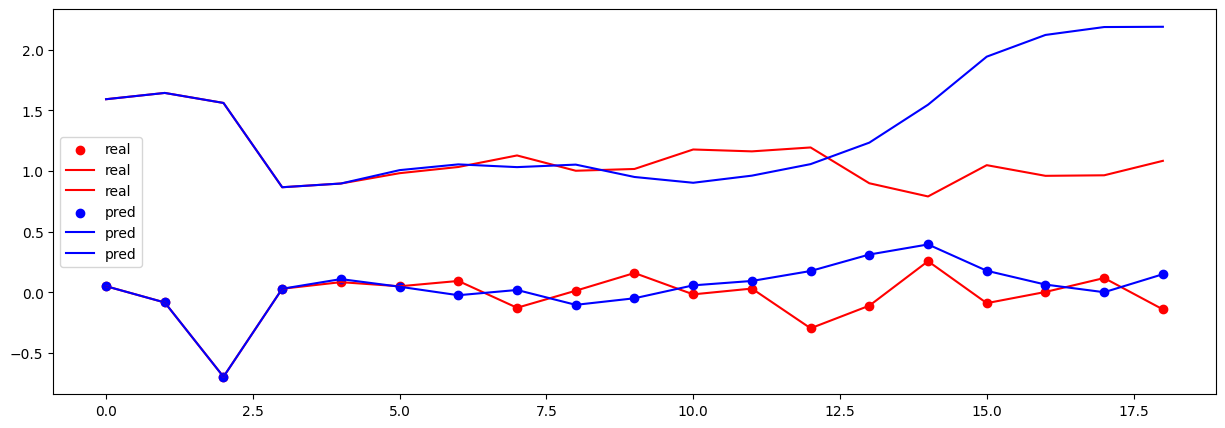

(200, 25)
219
19


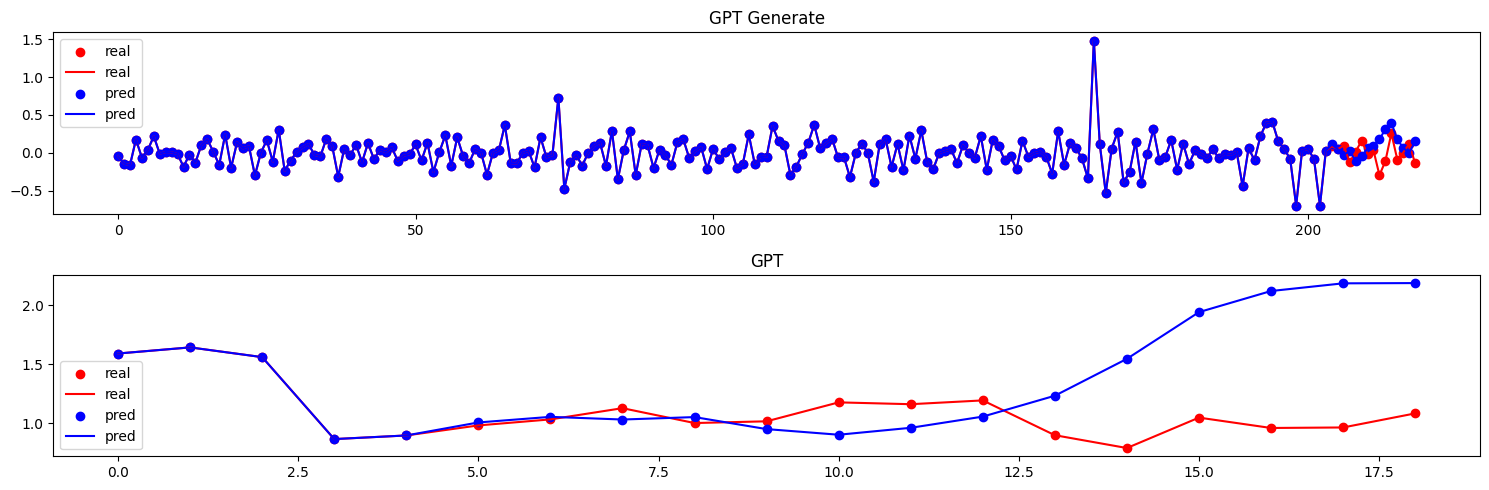

In [87]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk200to400_train )

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([300, 25])
0 train loss =  0.8173204660415649
500 train loss =  0.20882214605808258
1000 train loss =  0.13154642283916473
1500 train loss =  0.08975003659725189
2000 train loss =  0.06626088172197342
2500 train loss =  0.053527940064668655


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


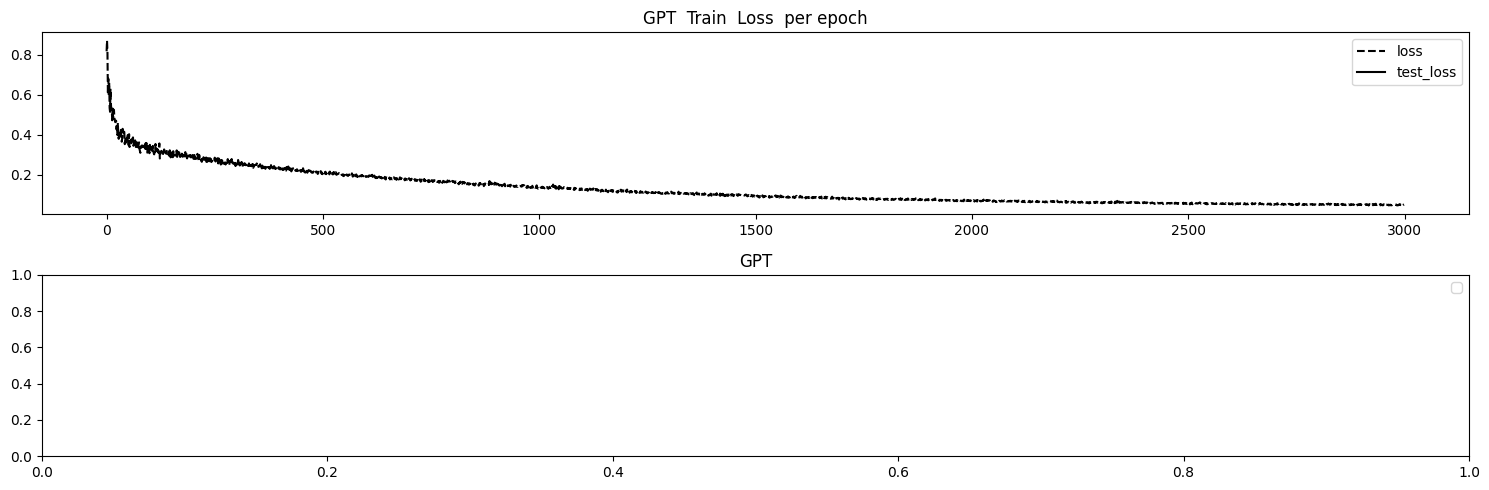

(15, 25)
(300, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

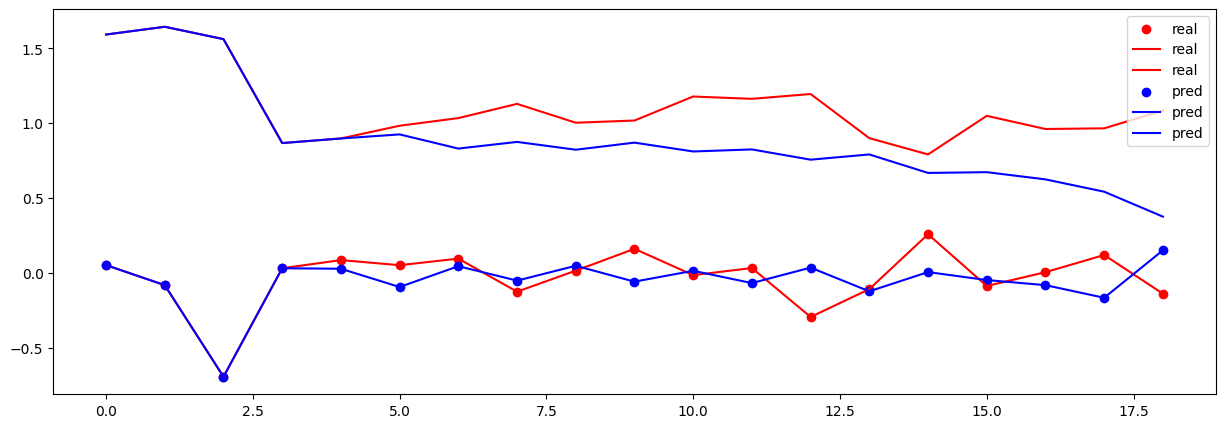

(300, 25)
319
19


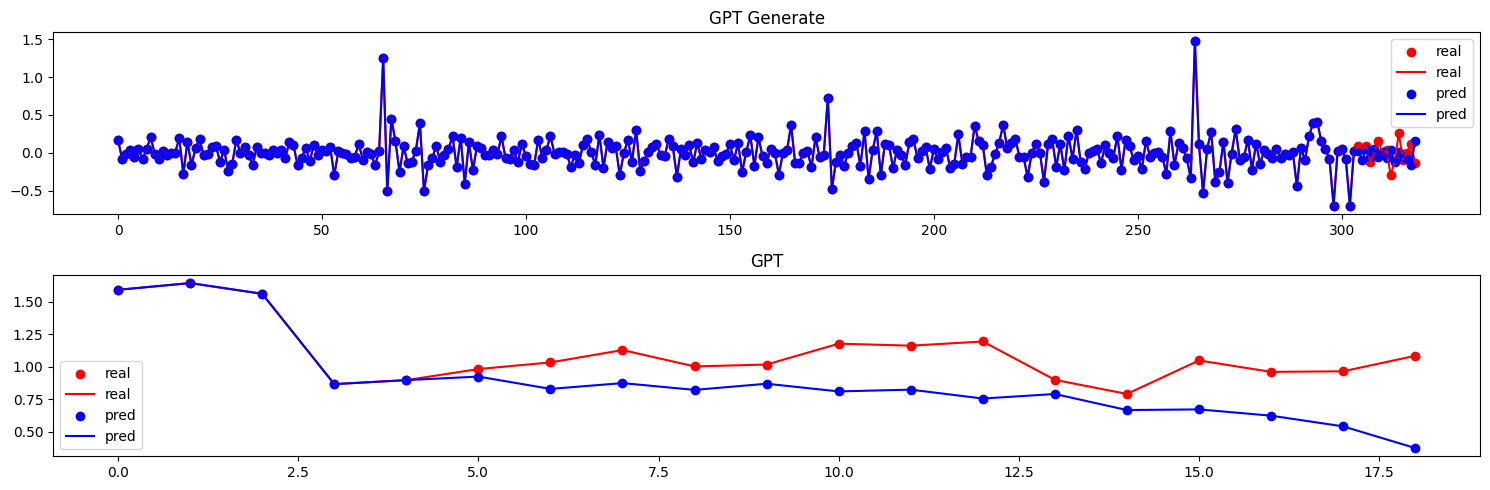

In [88]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk100to400_train  )

function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([400, 25])
0 train loss =  0.8884587287902832
500 train loss =  0.22258391976356506
1000 train loss =  0.15554702281951904
1500 train loss =  0.11908967792987823
2000 train loss =  0.0849570482969284
2500 train loss =  0.07055694609880447


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


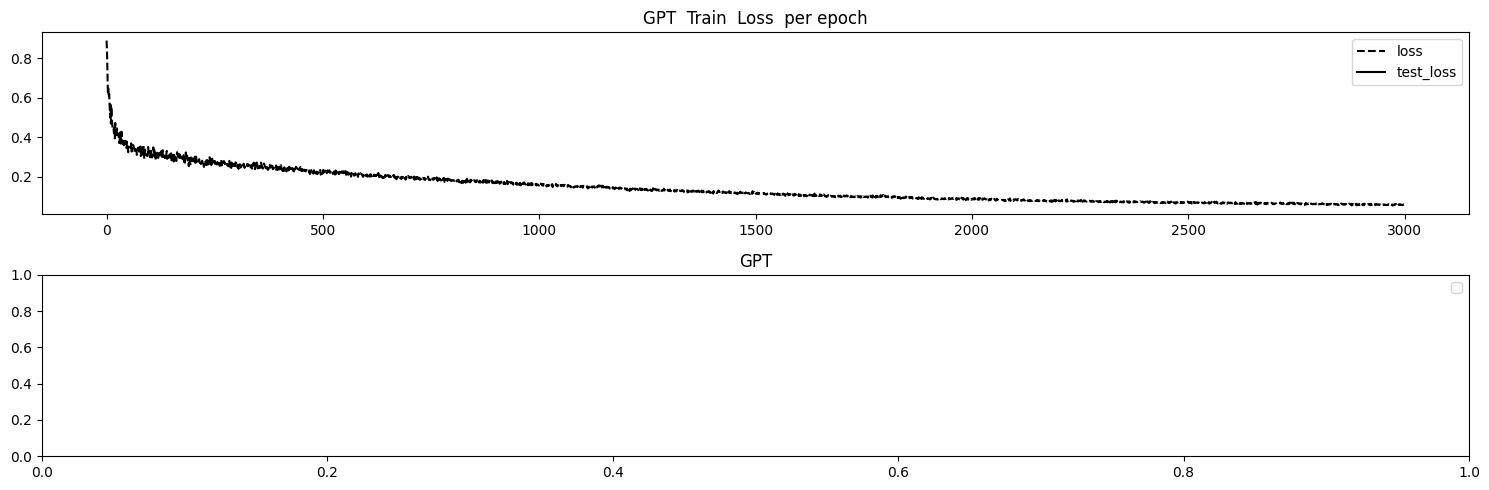

(15, 25)
(400, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

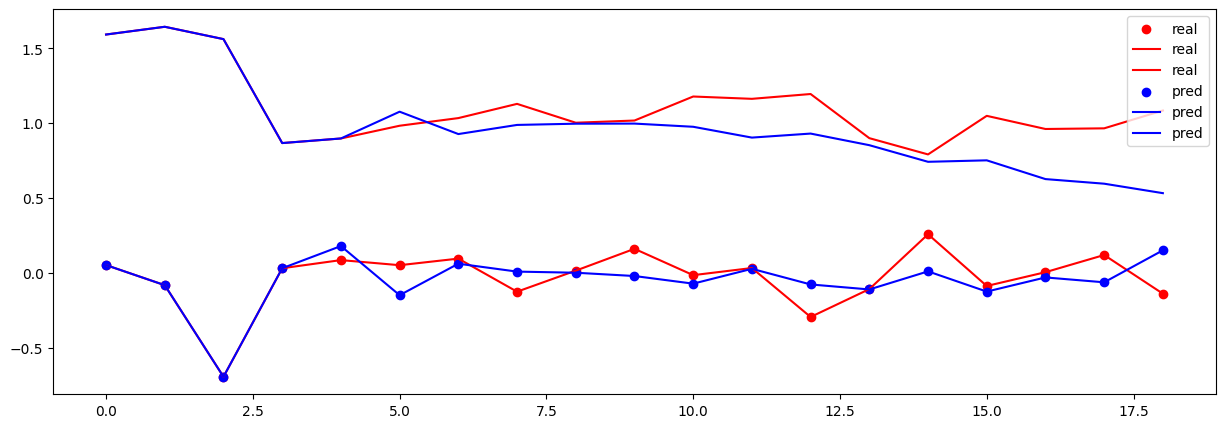

(400, 25)
419
19


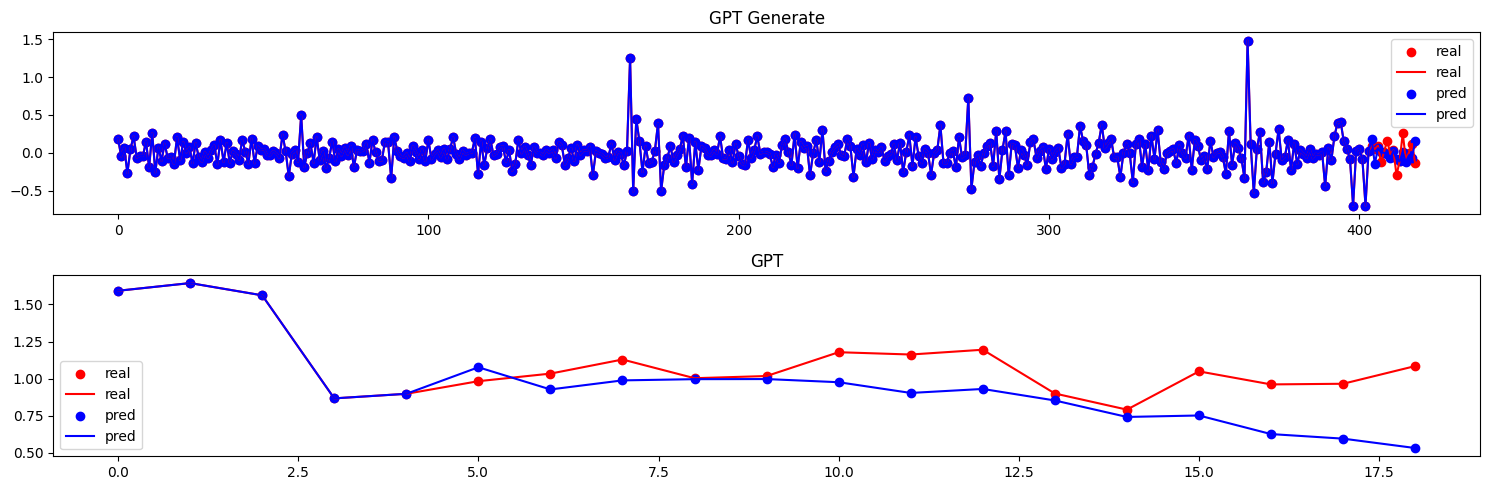

In [89]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk000to400_train )

function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



## Run 5


In [90]:

the_range = training_chunk + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice

print( for_RNN_data_CIVS.shape[0] )
print( index_to_slice )
print( index_to_slice + the_range )

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

n = block_size

print( n )

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

chunk300to400_train = train_CIVS[ 300  :  ] 
chunk200to400_train = train_CIVS[ 200  :  ]  
chunk100to400_train = train_CIVS[ 100  :  ] 
chunk000to400_train = train_CIVS[      :  ] 


print( chunk300to400_train.shape )
print( chunk200to400_train.shape )
print( chunk100to400_train.shape )
print( chunk000to400_train.shape )


1383
230
645
15
(100, 25)
(200, 25)
(300, 25)
(400, 25)


torch.Size([100, 25])
0 train loss =  0.8764940500259399
500 train loss =  0.12117195874452591
1000 train loss =  0.06729532033205032
1500 train loss =  0.049539294093847275
2000 train loss =  0.03620364889502525
2500 train loss =  0.03133541718125343


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


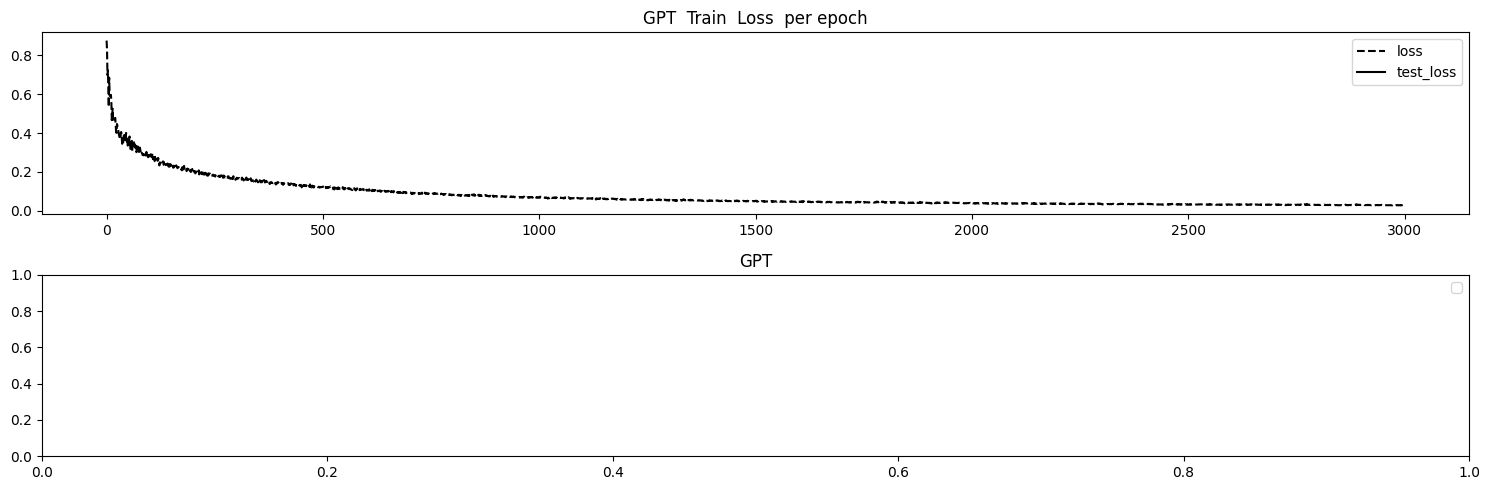

(15, 25)
(100, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

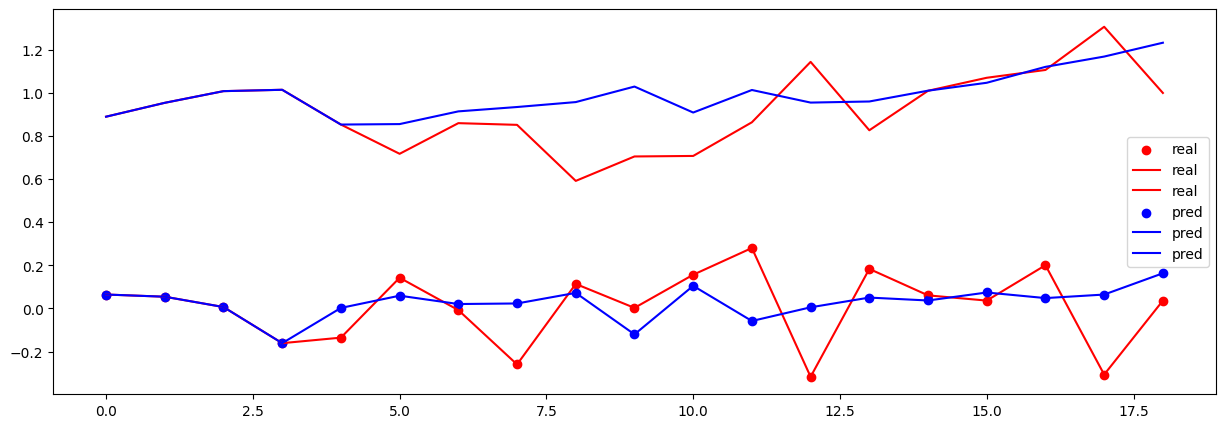

(100, 25)
119
19


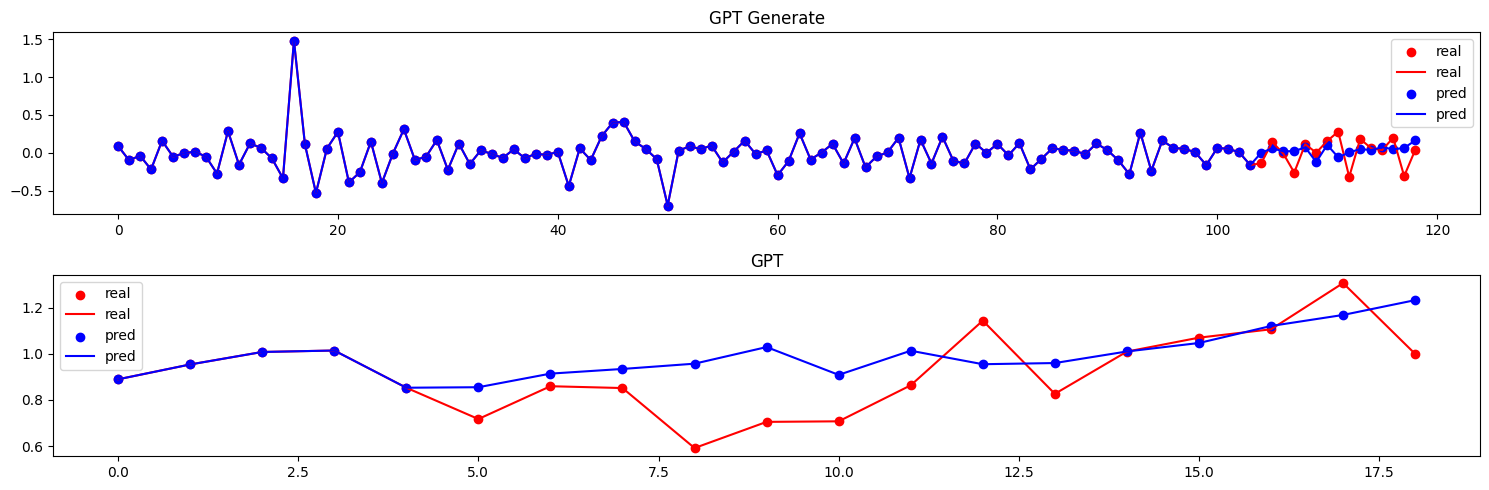

In [91]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk300to400_train )

function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([200, 25])
0 train loss =  0.8100369572639465
500 train loss =  0.18109990656375885
1000 train loss =  0.10852393507957458
1500 train loss =  0.07546520233154297
2000 train loss =  0.05544602870941162
2500 train loss =  0.046110350638628006


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


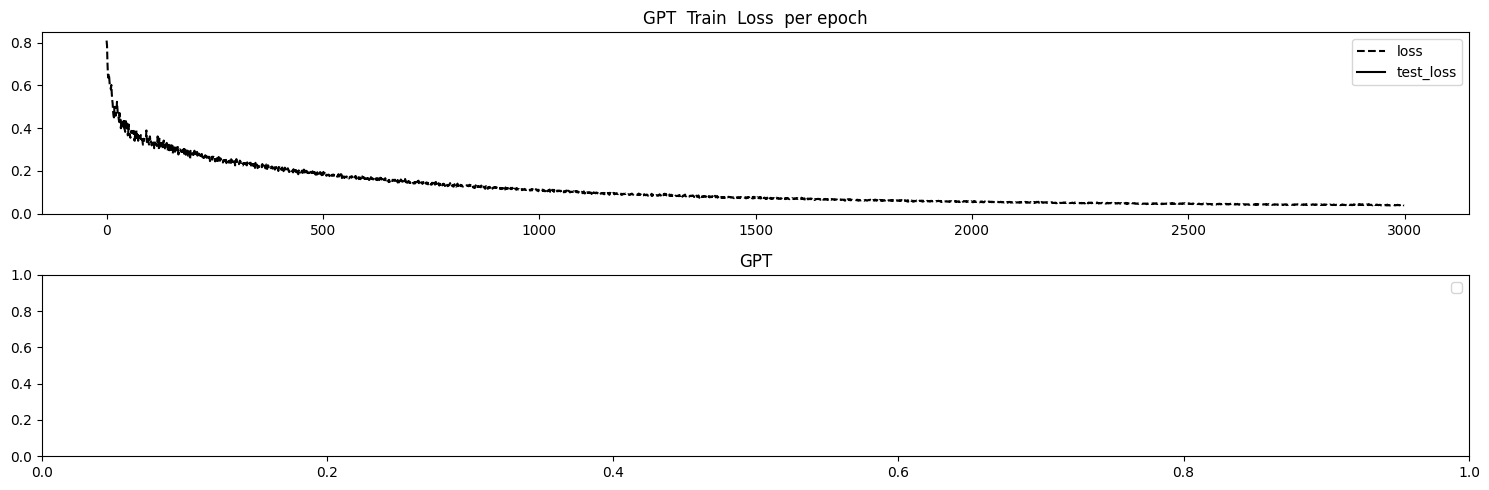

(15, 25)
(200, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

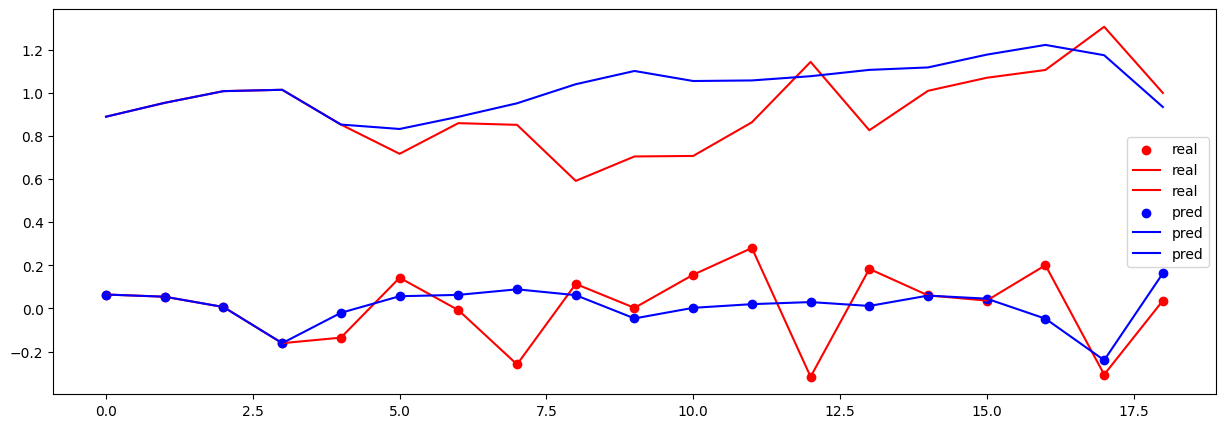

(200, 25)
219
19


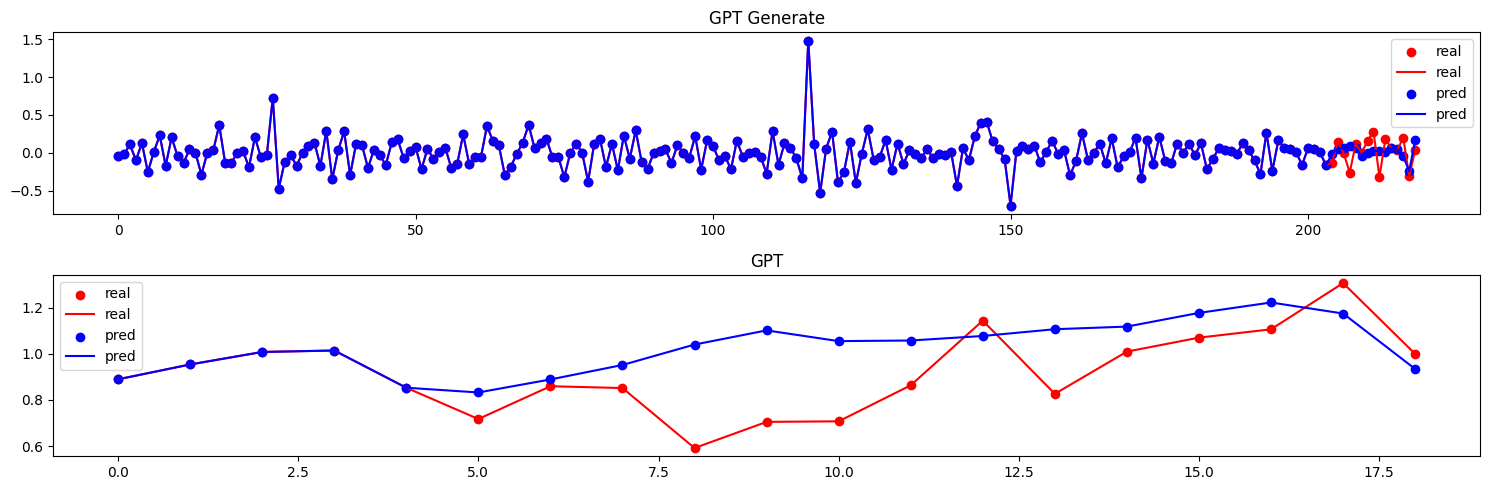

In [92]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk200to400_train )

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([300, 25])
0 train loss =  0.856367826461792
500 train loss =  0.21058404445648193
1000 train loss =  0.13665732741355896
1500 train loss =  0.09594278037548065
2000 train loss =  0.07357635349035263
2500 train loss =  0.05809944123029709


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


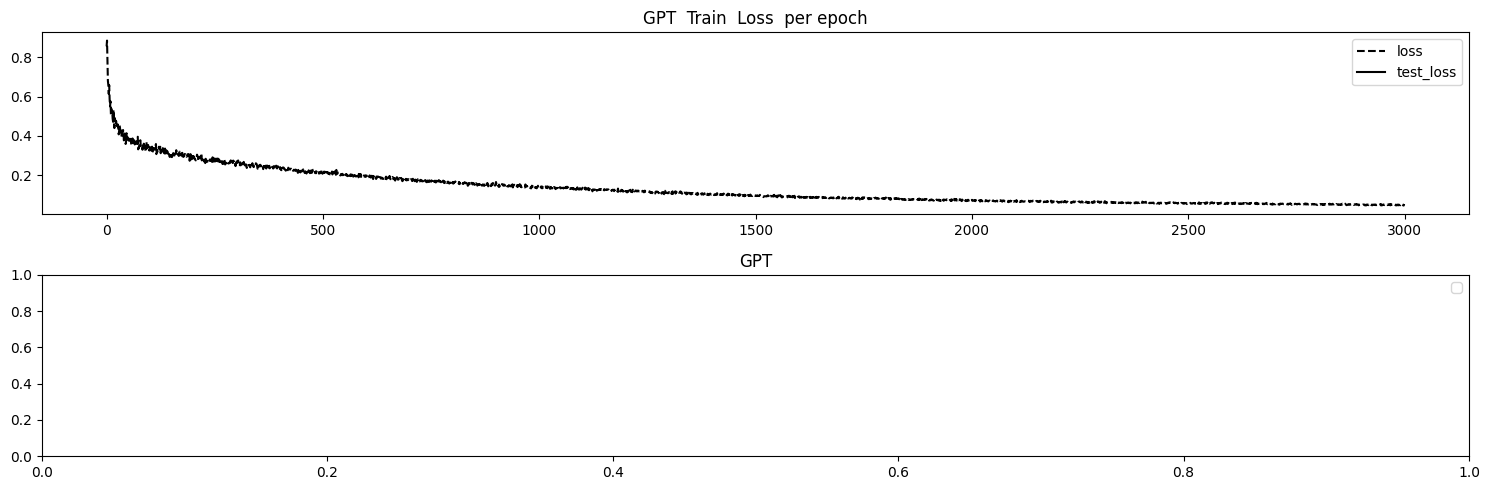

(15, 25)
(300, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

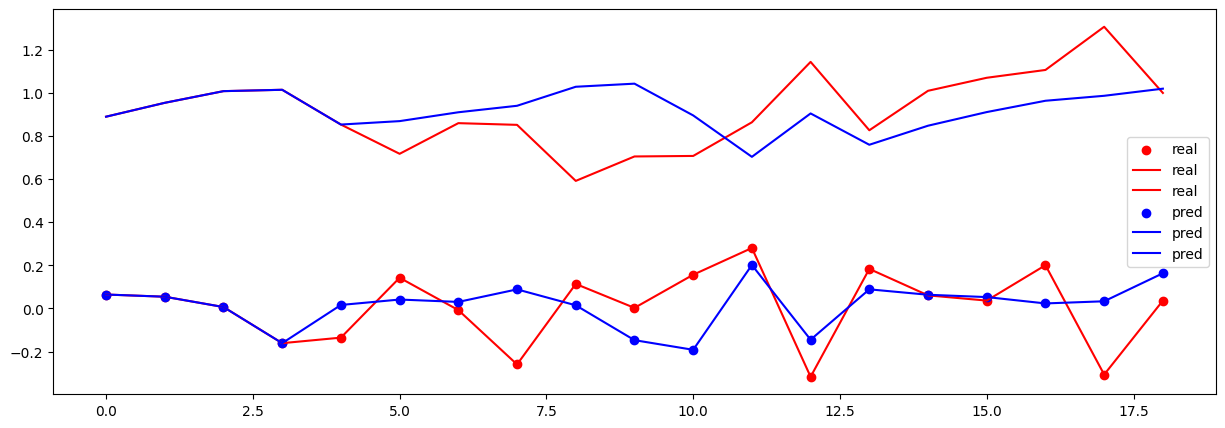

(300, 25)
319
19


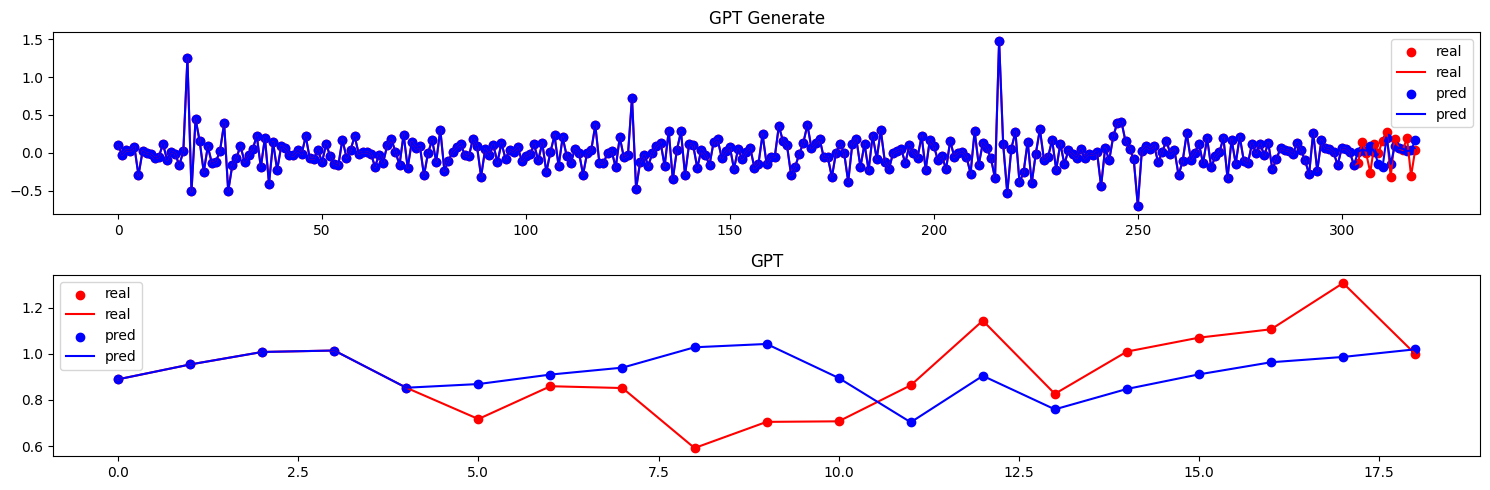

In [93]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk100to400_train  )

function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([400, 25])
0 train loss =  0.8087496757507324
500 train loss =  0.23439545929431915
1000 train loss =  0.1629173904657364
1500 train loss =  0.11151476949453354
2000 train loss =  0.0857536792755127
2500 train loss =  0.06961707770824432


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


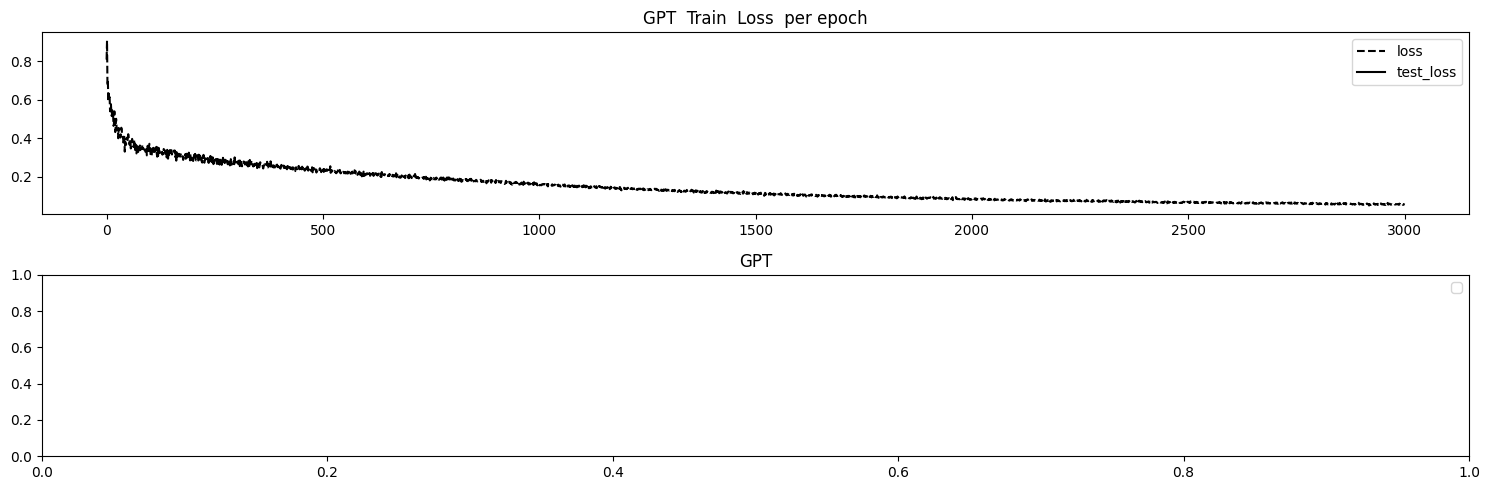

(15, 25)
(400, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

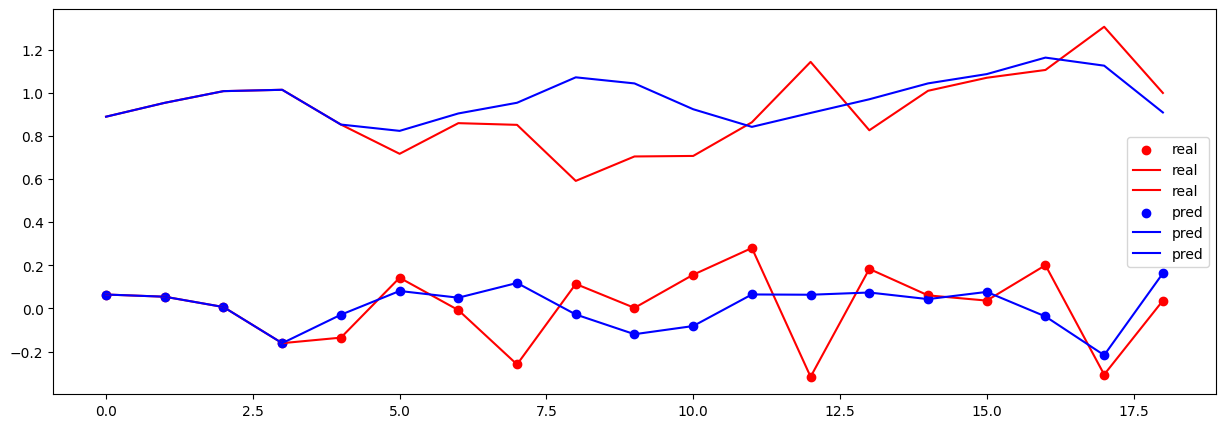

(400, 25)
419
19


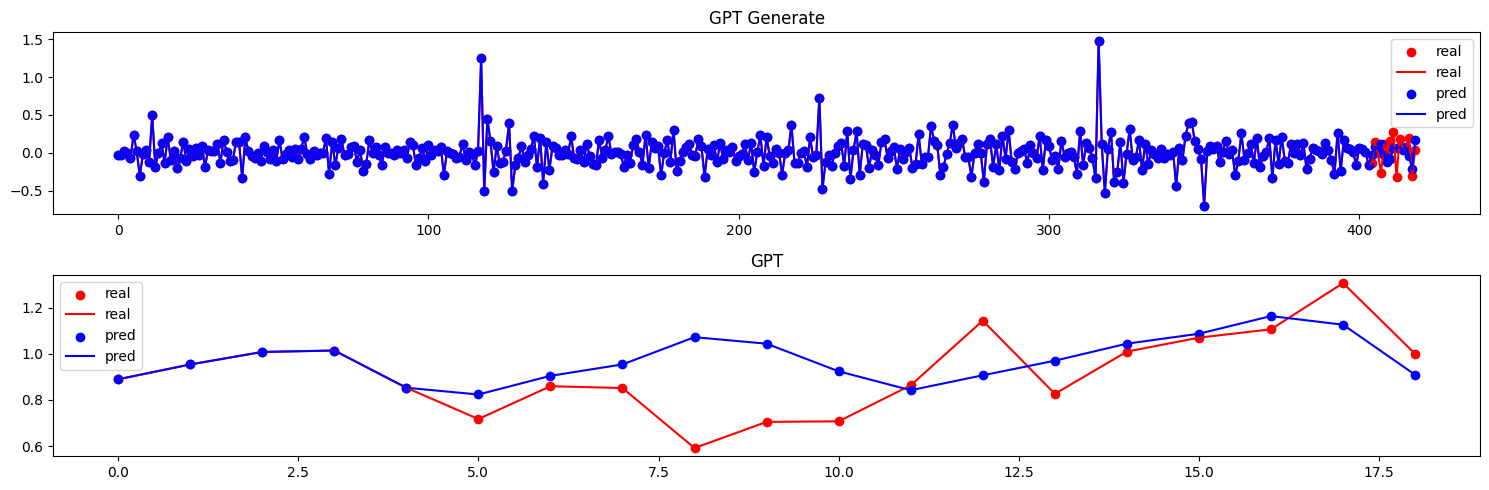

In [94]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk000to400_train )

function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



## Run 6


In [95]:

the_range = training_chunk + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice

print( for_RNN_data_CIVS.shape[0] )
print( index_to_slice )
print( index_to_slice + the_range )

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

n = block_size

print( n )

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

chunk300to400_train = train_CIVS[ 300  :  ] 
chunk200to400_train = train_CIVS[ 200  :  ]  
chunk100to400_train = train_CIVS[ 100  :  ] 
chunk000to400_train = train_CIVS[      :  ] 


print( chunk300to400_train.shape )
print( chunk200to400_train.shape )
print( chunk100to400_train.shape )
print( chunk000to400_train.shape )


1383
943
1358
15
(100, 25)
(200, 25)
(300, 25)
(400, 25)


torch.Size([100, 25])
0 train loss =  0.7799380421638489
500 train loss =  0.13106496632099152
1000 train loss =  0.06811987608671188
1500 train loss =  0.048945602029561996
2000 train loss =  0.04017540067434311
2500 train loss =  0.03519996255636215


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


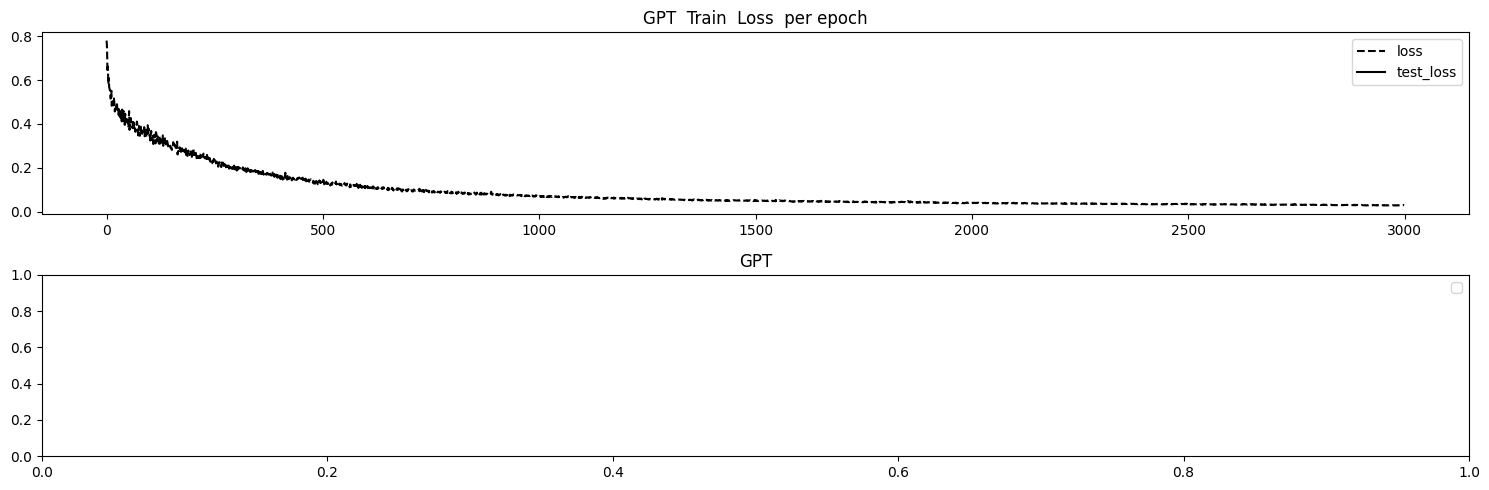

(15, 25)
(100, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

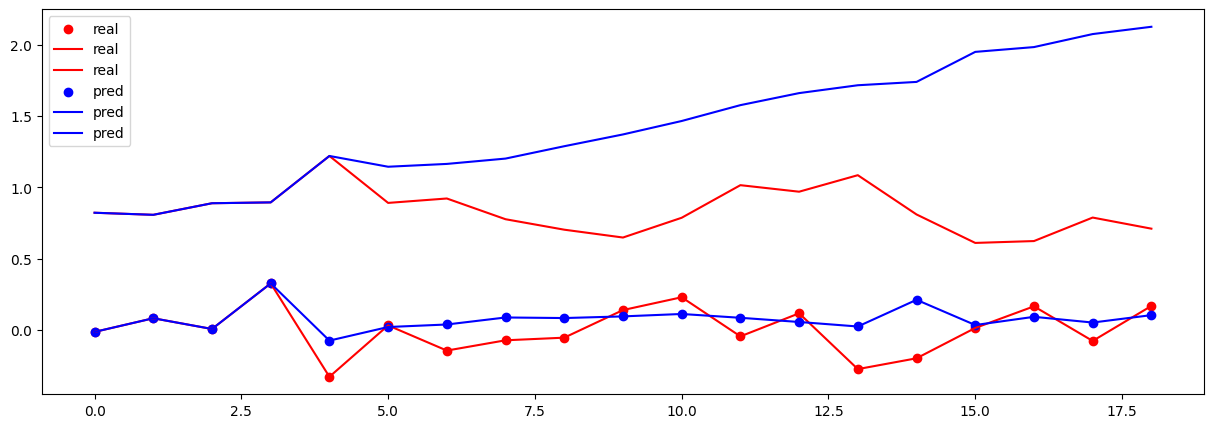

(100, 25)
119
19


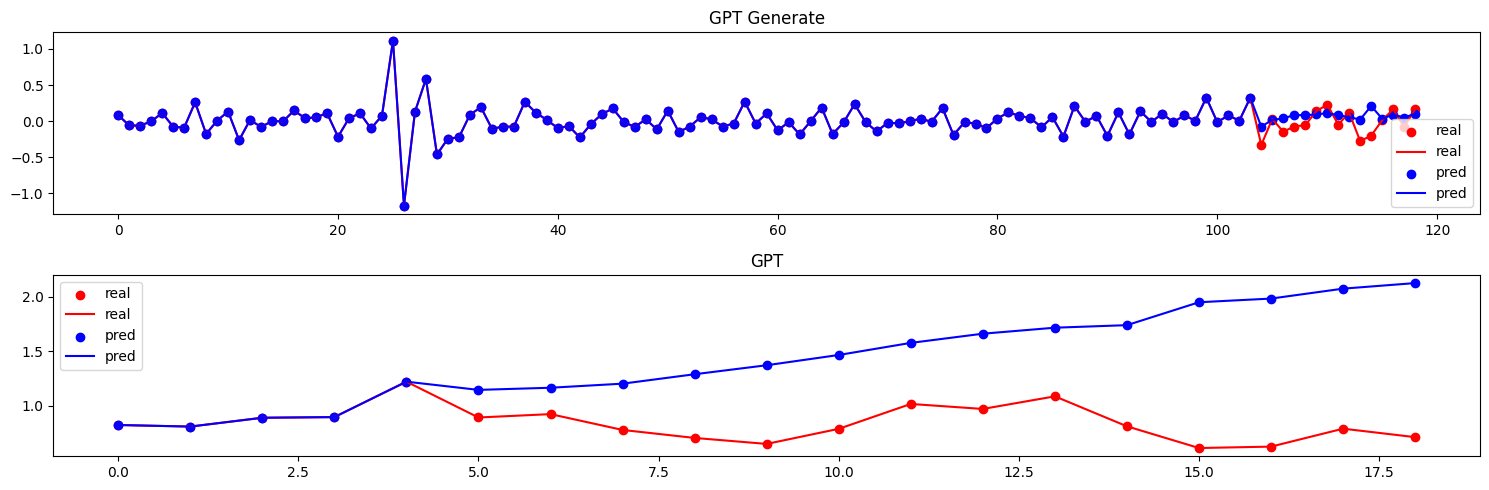

In [96]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk300to400_train )

function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([200, 25])
0 train loss =  0.7645129561424255
500 train loss =  0.18353582918643951
1000 train loss =  0.0993766188621521
1500 train loss =  0.07309401035308838
2000 train loss =  0.05594378709793091
2500 train loss =  0.043446898460388184


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


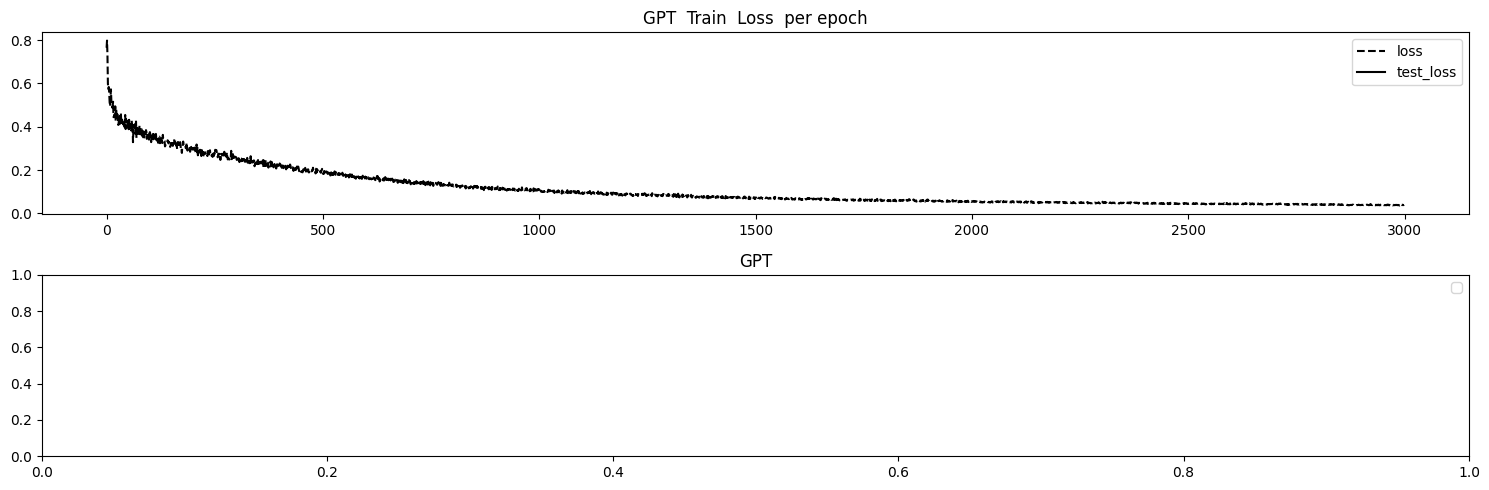

(15, 25)
(200, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

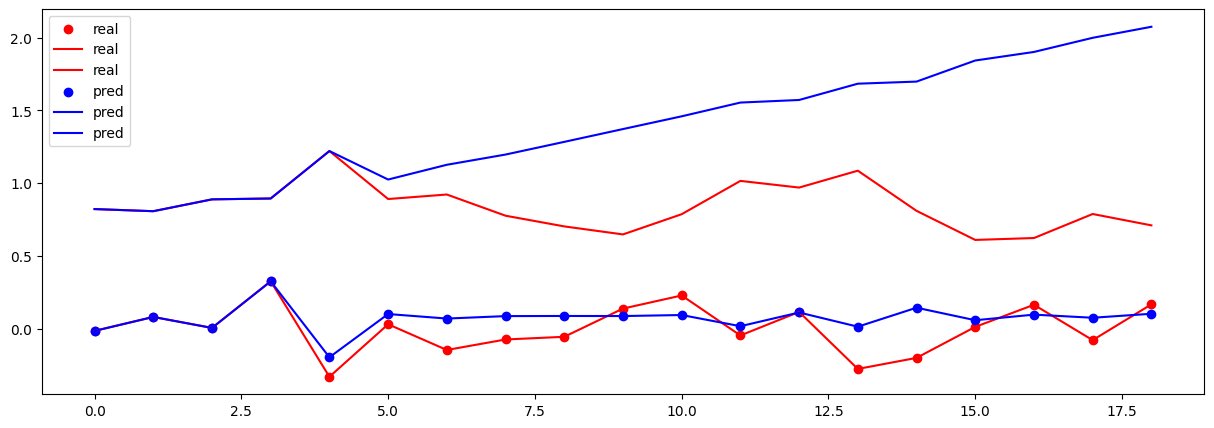

(200, 25)
219
19


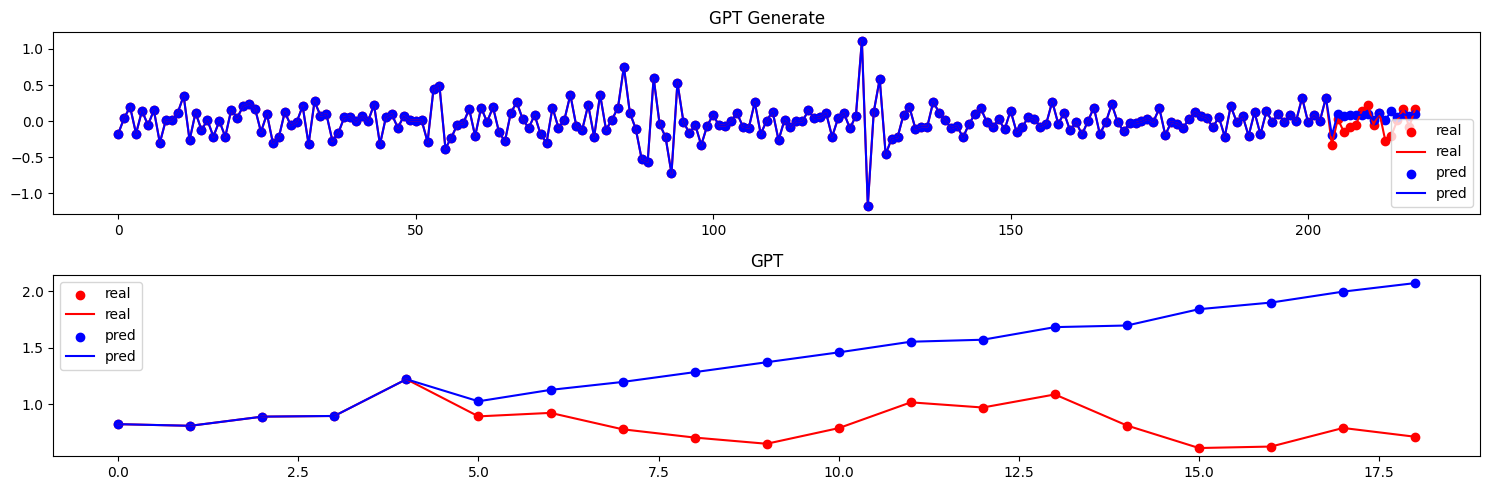

In [97]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk200to400_train )

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([300, 25])
0 train loss =  0.8176485896110535
500 train loss =  0.21171225607395172
1000 train loss =  0.13549113273620605
1500 train loss =  0.09636488556861877
2000 train loss =  0.06986551731824875
2500 train loss =  0.05627508834004402


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


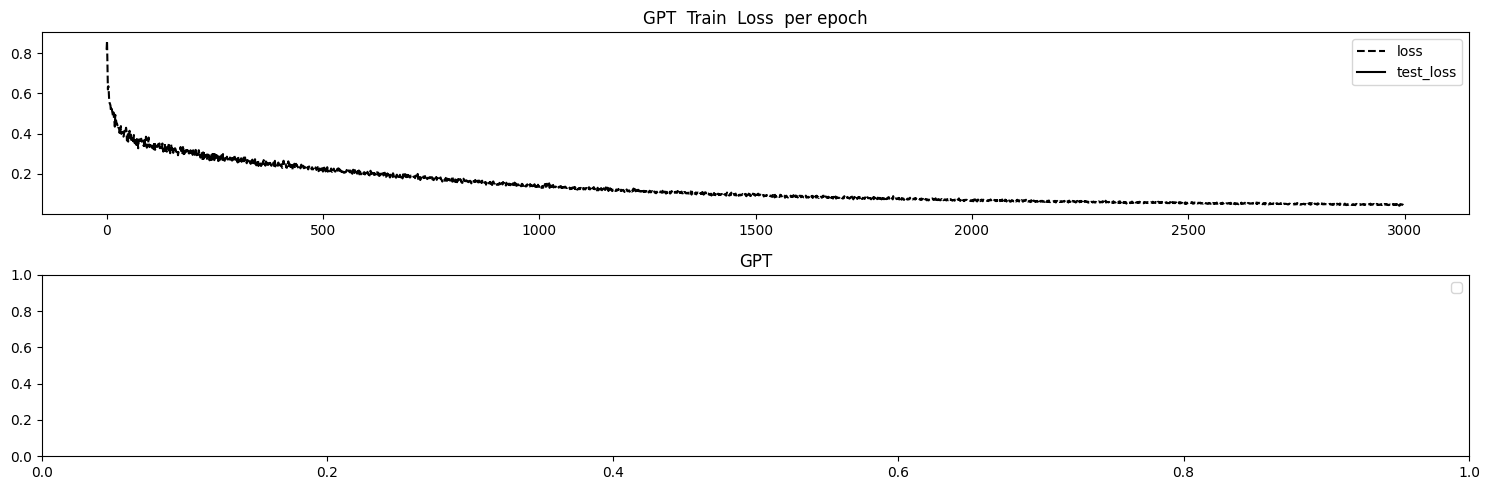

(15, 25)
(300, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

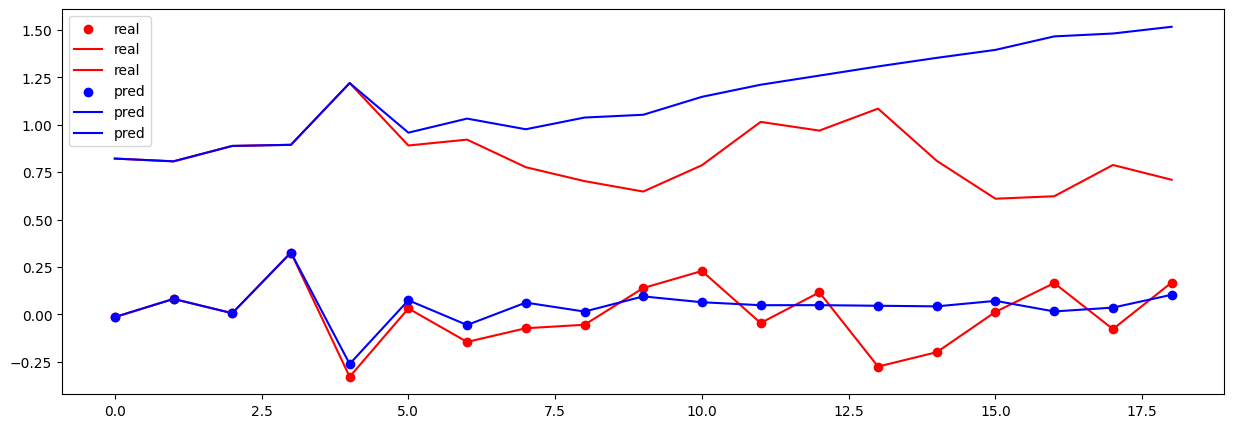

(300, 25)
319
19


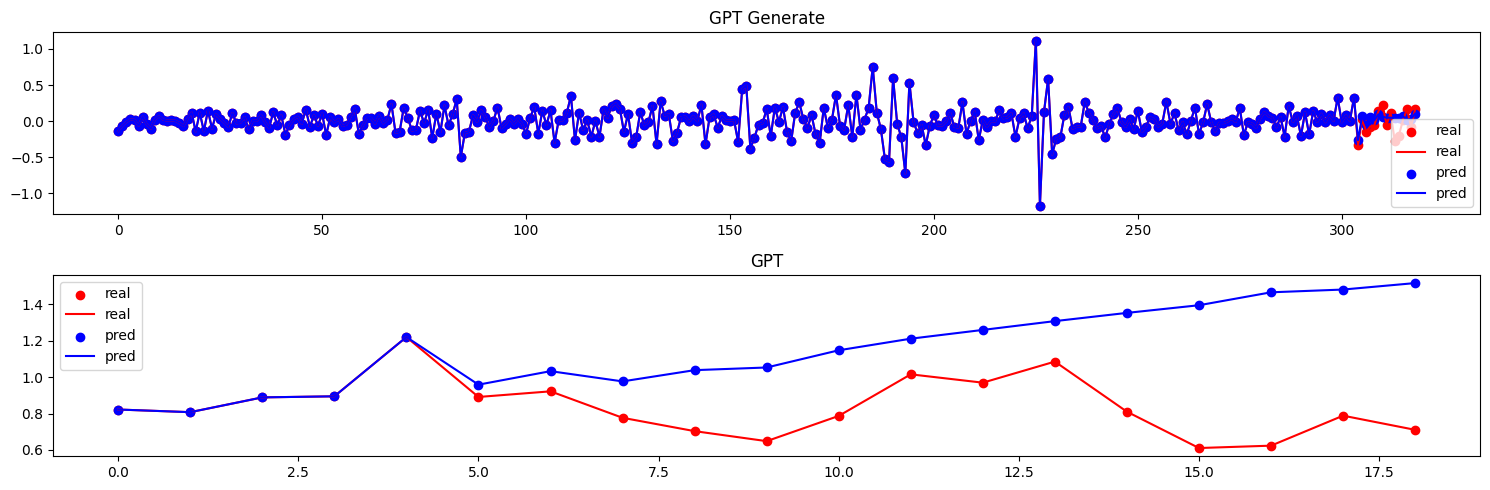

In [98]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk100to400_train  )

function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([400, 25])
0 train loss =  0.8686918616294861
500 train loss =  0.22434623539447784
1000 train loss =  0.15925581753253937
1500 train loss =  0.115996815264225
2000 train loss =  0.08183760195970535
2500 train loss =  0.06279363483190536


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


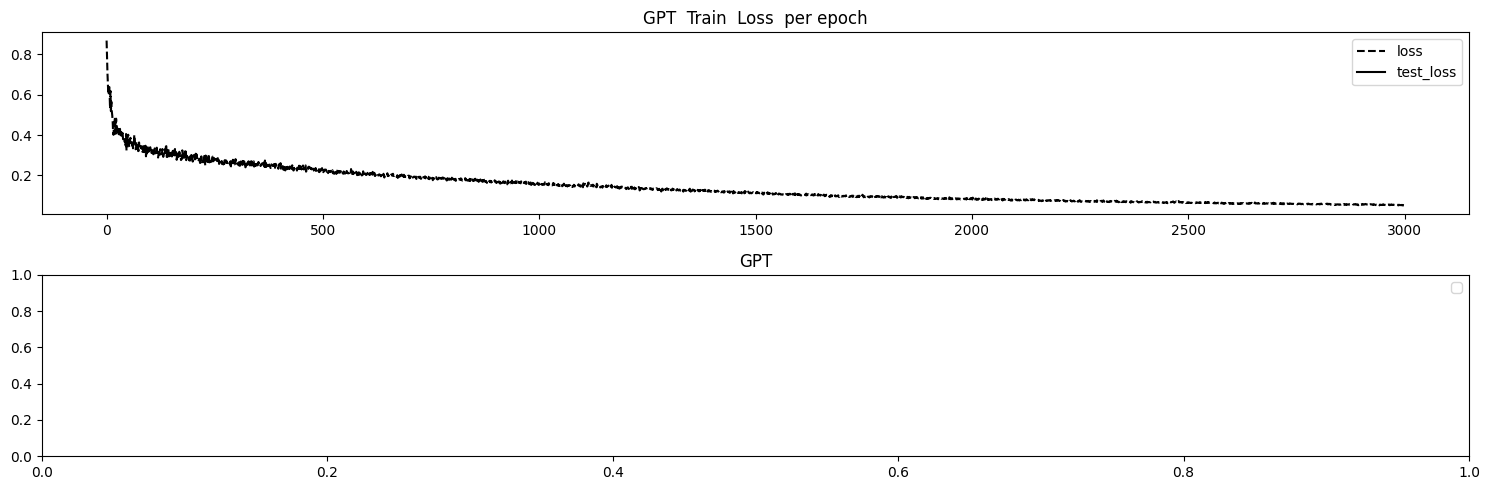

(15, 25)
(400, 25)
(20, 25)
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([20, 25])
torch.Size([1, 19, 25])
torch.Size([1, 19, 25])
input to m.generate
torch.Size([1, 5, 25])
torch.Size([1, 5, 25])
torch.Size([1, 1, 25])
torch.Size([1, 6, 25])
torch.Size([1, 6, 25])
torch.Size([1, 1, 25])
torch.Size([1, 7, 25])
torch.Size([1, 7, 25])
torch.Size([1, 1, 25])
torch.Size([1, 8, 25])
torch.Size([1, 8, 25])
torch.Size([1, 1, 25])
torch.Size([1, 9, 25])
torch.Size([1, 9, 25])
torch.Size([1, 1, 25])
torch.Size([1, 10, 25])
torch.Size([1, 10, 25])
torch.Size([1, 1, 25])
torch.Size([1, 11, 25])
torch.Size([1, 11, 25])
torch.Size([1, 1, 25])
torch.Size([1, 12, 25])
torch.Size([1, 12, 25])
torch.Size([1, 1, 25])
torch.Size([1, 13, 25])
torch.Size([1, 13, 25])
torch.Size([1, 1, 25])
torch.Size([1, 14, 25])
torch.Size([1, 14, 25])
torch.Size([1, 1, 25])
torch.Size([1, 15, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])
torch.Size([1, 16, 25])
torch.Size([1, 15, 25])
torch.Size([1, 1, 25])

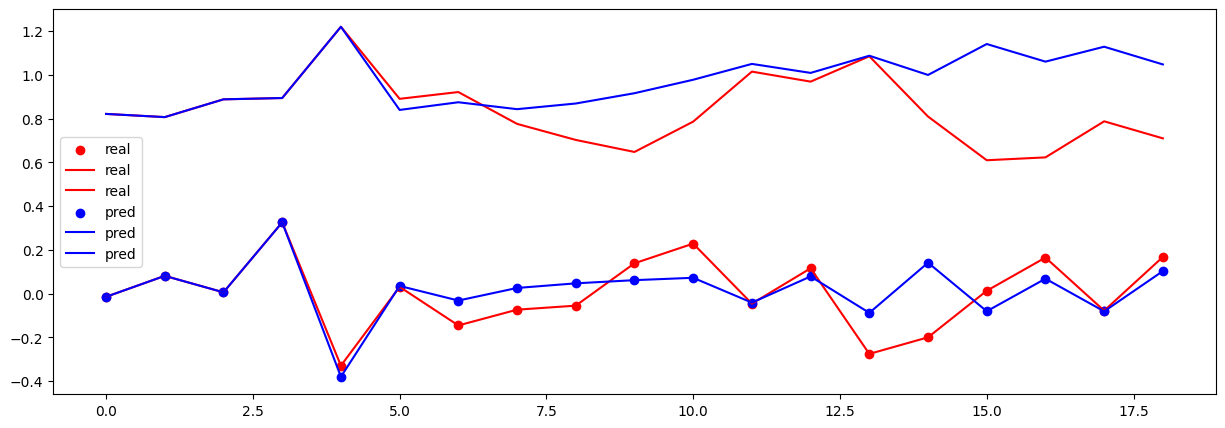

(400, 25)
419
19


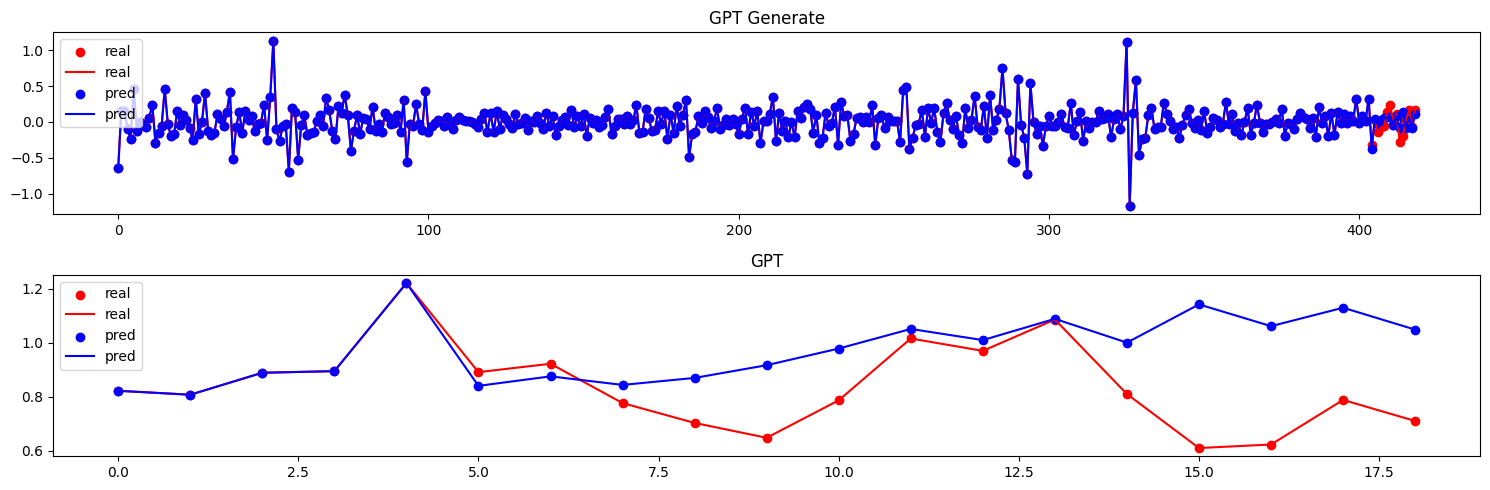

In [99]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk000to400_train )

function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )
